# ESTIMATION OF HOUSING PRICES OF 3 TYPES IN MELBOURNE UTILIZING REAL ESTATE AND NEAR BY VENUES DATA

# Introduction 
## Background
Melbourne is the capital and most populous city of the Australian state of Victoria. Today, it is a leading financial center in the Asia-Pacific region and ranks 15th in the Global Financial Centers Index with enormous employment and business opportunities. These recompenses have gained attention of several local Australians and international immigrants, aspiring them to settle and lead a good lifestyle in the city of Melbourne. But with all these amenities, there lies Melbourne’s real estate market hype. For the last few years, significant influx of locals from other provinces of Australia and immigrants from worldwide have outpaced housing demand in comparison to supply. This has lead prices inch steadily upward developing a bubble in Melbourne real estate market.. 
## Business Problem
Immigrants and locals moving into Melbourne city founds selection of house challenging for them and their families due to hot housing market. Affordability, accommodation features and nearby facilities always remain qualifying parameters for selection of an appropriate place to live for them.
Price variation with respect to housing attributes for different Melbourne neighborhoods in conjunction with nearby venues needs to be addressed to resolve the encounters faced by any individual during selection of a place. The project seeks to explore real estate data to get an insight of property price variation in combination with its traits and near services available based on location data along all the neighborhood’s to establish relationship between them, which can be used as a recommendation while selecting a place to live. In addition to above, another task is to identify the potential for building more houses or apartments and where would sellers be selling off their properties I order to maximize the profit.
 
## Audience & Stakeholders
The target audience for this report are:  
•	Locals planning to settle from other provinces of Australia to Melbourne city  
•	Immigrants across the globe planning to settle in the city of Melbourne  
•	Potential house sellers and buyers residing in Melbourne city who can optimize their advertisements & profits.  
•	Potential business investors setting up their businesses in different regions of Melbourne city and aims to accommodate their workforce  
•	City planning authorities to set up more amenities in neighborhoods with less venues

In [2]:
# import required libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy.stats import norm # for scientific Computing
from scipy import stats, integrate
import matplotlib.pyplot as plt
import matplotlib as plt
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge # Ridge regression
from sklearn.linear_model import LassoCV # Lasso Regression
from sklearn.preprocessing import MinMaxScaler # import MinMax Scalar
from sklearn.decomposition import PCA # import PCA
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Regressor

In [3]:
# Load the data
file = 'C:/Users/Lajpat Rai/Desktop/projects/Melbourne_housing_FULL.csv'
df = pd.read_csv(file)
df.head() # let' see first 5 rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# 1 Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# Convert objects to categorical variables
change_objects = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']
for colname in change_objects:
    df[colname] = df[colname].astype('category')  
    
# Convert numerical variable to categorical
change_numeric = ['Postcode']
for colname in change_numeric:
    df[colname] = df[colname].astype('category')
    
# cast date to datetime  
df['Date'] = pd.to_datetime(df['Date'])
# renaming the column names
df.rename(columns = {'Lattitude':'Latitude'}, inplace = True)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [7]:
# Drop the duplicate (Bedroom2)
df = df.drop(['Bedroom2'], axis=1)
# identify missing data
missing_data = df.isnull()
# Using a for loop in Python, the method ".value_counts()" counts the number of "True" values.
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Suburb
False    34857
Name: Suburb, dtype: int64

Address
False    34857
Name: Address, dtype: int64

Rooms
False    34857
Name: Rooms, dtype: int64

Type
False    34857
Name: Type, dtype: int64

Price
False    27247
True      7610
Name: Price, dtype: int64

Method
False    34857
Name: Method, dtype: int64

SellerG
False    34857
Name: SellerG, dtype: int64

Date
False    34857
Name: Date, dtype: int64

Distance
False    34856
True         1
Name: Distance, dtype: int64

Postcode
False    34856
True         1
Name: Postcode, dtype: int64

Bathroom
False    26631
True      8226
Name: Bathroom, dtype: int64

Car
False    26129
True      8728
Name: Car, dtype: int64

Landsize
False    23047
True     11810
Name: Landsize, dtype: int64

BuildingArea
True     21115
False    13742
Name: BuildingArea, dtype: int64

YearBuilt
True     19306
False    15551
Name: YearBuilt, dtype: int64

CouncilArea
False    34854
True         3
Name: CouncilArea, dtype: int64

Latitude
False    26881
True      7

In [8]:
# drop the BuildingArea column 
df = df.drop(["BuildingArea"], axis=1)
# Remove false YearBuilt (Melbourne was Founded in Aug 1835)
df = df[df['YearBuilt']> 1835]
# price is what we want to predict. Any data entry without price data cannot be used for prediction;  
# drop the rows of price column where there is no value
df.dropna(subset=["Price"], axis=0, inplace=True)
df.shape

(12081, 19)

In [9]:
# total number of remaining null values
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            1
Car               195
Landsize         1462
YearBuilt           0
CouncilArea         0
Latitude            8
Longtitude          8
Regionname          0
Propertycount       0
dtype: int64

In [10]:
# handling the missing values of car , bathroom & landsize
# check the most common type of car & bathroom
print("most common type of car spot:", df['Car'].value_counts().idxmax())
print("most common type of bathroom:", df['Bathroom'].value_counts().idxmax())
avg_land_size = df["Landsize"].astype("float").mean(axis=0) # calculate the average of land size
print("Average of Landsize:", avg_land_size)

most common type of car spot: 2.0
most common type of bathroom: 1.0
Average of Landsize: 523.7663621809963


In [11]:
# replace the missing data pf bathroom with most frequent value
df["Bathroom"].replace(np.nan, "1.0", inplace=True)
# replace the missing data of car spot with most frequent value
df["Car"].replace(np.nan, "2.0", inplace=True)
# replace the missing data of Land size with mean value
df["Landsize"].replace(np.nan, "523.76", inplace=True)
# total number of remaining null values
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Latitude         8
Longtitude       8
Regionname       0
Propertycount    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12081 entries, 2 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         12081 non-null  category      
 1   Address        12081 non-null  category      
 2   Rooms          12081 non-null  int64         
 3   Type           12081 non-null  category      
 4   Price          12081 non-null  float64       
 5   Method         12081 non-null  category      
 6   SellerG        12081 non-null  category      
 7   Date           12081 non-null  datetime64[ns]
 8   Distance       12081 non-null  float64       
 9   Postcode       12081 non-null  category      
 10  Bathroom       12081 non-null  object        
 11  Car            12081 non-null  object        
 12  Landsize       12081 non-null  object        
 13  YearBuilt      12081 non-null  float64       
 14  CouncilArea    12081 non-null  category      
 15  Latitude       1207

In [13]:
df[["Car","Bathroom","Landsize"]] = df[["Car","Bathroom","Landsize"]].astype("float")

In [14]:
# extract year from date
df["Year"] = df["Date"].dt.year

# 2. Exploratory Data Analysis

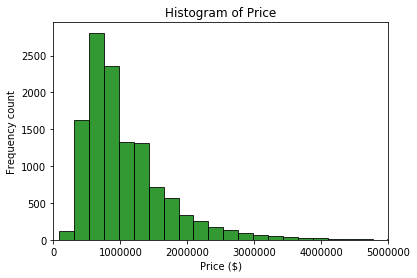

In [15]:
# plot the histogram of prices
import matplotlib as plt
import matplotlib.pyplot as plt
bins = 40
n, bins, patches = plt.hist(df.Price, bins, color='g', alpha=0.8, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency count')
plt.xlabel ('Price ($)')
plt.xlim([0, 5000000])
plt.title ('Histogram of Price')
plt.show()

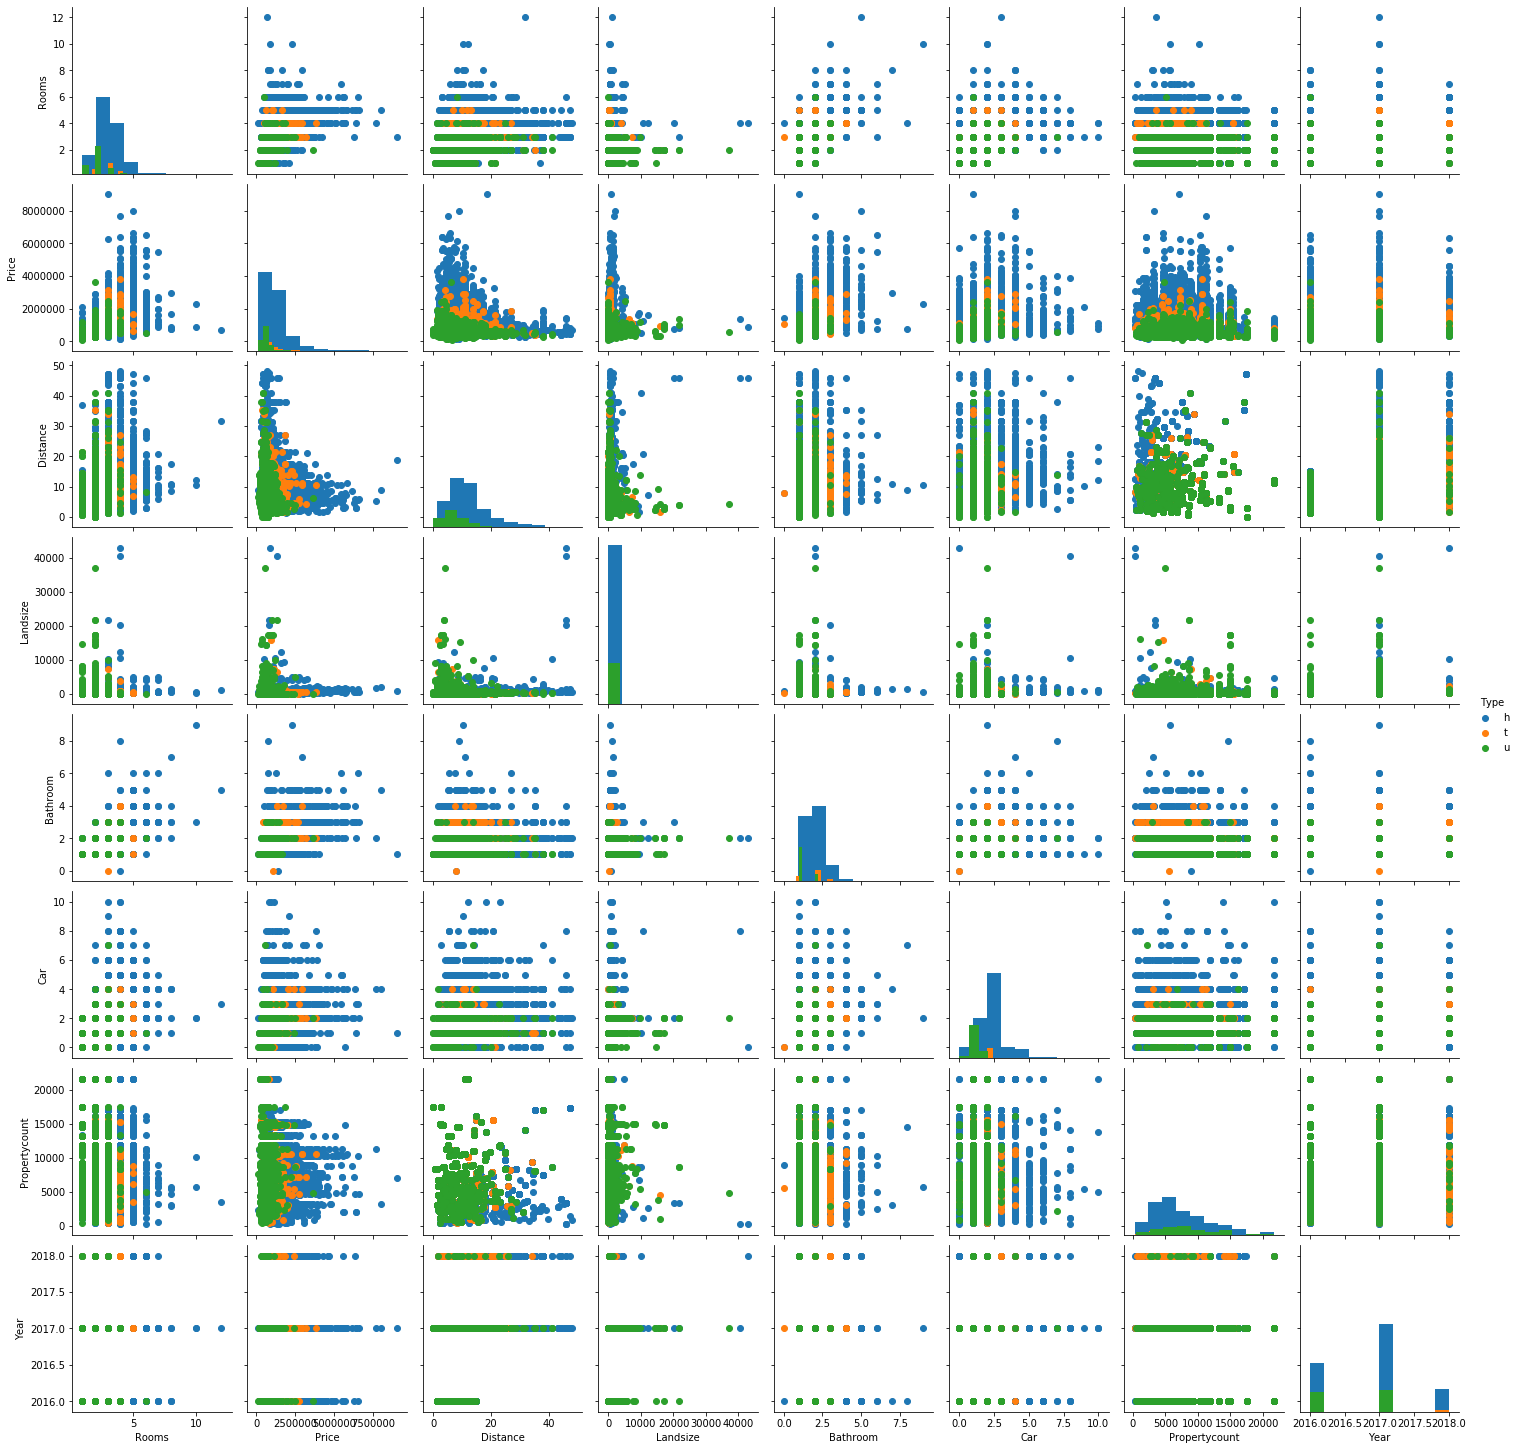

In [16]:
import seaborn
# Create the default pairplot
graph = seaborn.PairGrid(df[['Rooms','Price','Distance','Landsize','Bathroom','Car','Propertycount','Year','Type']],hue = 'Type')
graph = graph.map_diag(plt.hist) 
# type of graph for non-diagonal 
graph = graph.map_offdiag(plt.scatter) 
# to add legends 
graph = graph.add_legend() 
# to show 
plt.show()

In [17]:
df.corr() # calculate pearson coefficient betwen variables

,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Year
Rooms,1.000000,0.478740,0.281907,0.628798,0.406363,0.084377,-0.002502,0.025118,0.076926,-0.075908,0.179244
Price,0.478740,1.000000,-0.232253,0.466825,0.212924,0.056004,-0.339937,-0.215253,0.196847,-0.059157,0.001917
Distance,0.281907,-0.232253,1.000000,0.136258,0.250400,0.102676,0.320785,-0.069832,0.176682,-0.005618,0.294592
Bathroom,0.628798,0.466825,0.136258,1.000000,0.320331,0.075612,0.186999,-0.041151,0.101530,-0.050708,0.106599
Car,0.406363,0.212924,0.250400,0.320331,1.000000,0.108649,0.122816,0.020243,0.027145,-0.029089,0.152149
Landsize,0.084377,0.056004,0.102676,0.075612,0.108649,1.000000,0.040464,0.029254,-0.002727,-0.015644,0.073522
YearBuilt,-0.002502,-0.339937,0.320785,0.186999,0.122816,0.040464,1.000000,0.096171,-0.020240,0.025569,0.102700
Latitude,0.025118,-0.215253,-0.069832,-0.041151,0.020243,0.029254,0.096171,1.000000,-0.347246,0.027836,0.047464
Longtitude,0.076926,0.196847,0.176682,0.101530,0.027145,-0.002727,-0.020240,-0.347246,1.000000,0.025484,0.016703
Propertycount,-0.075908,-0.059157,-0.005618,-0.050708,-0.029089,-0.015644,0.025569,0.027836,0.025484,1.000000,0.013784


above corr() function suggests Price has a good relationship with Rooms, Distance, Bathroom, Car spots, Yierbuilt, Lat & long. 

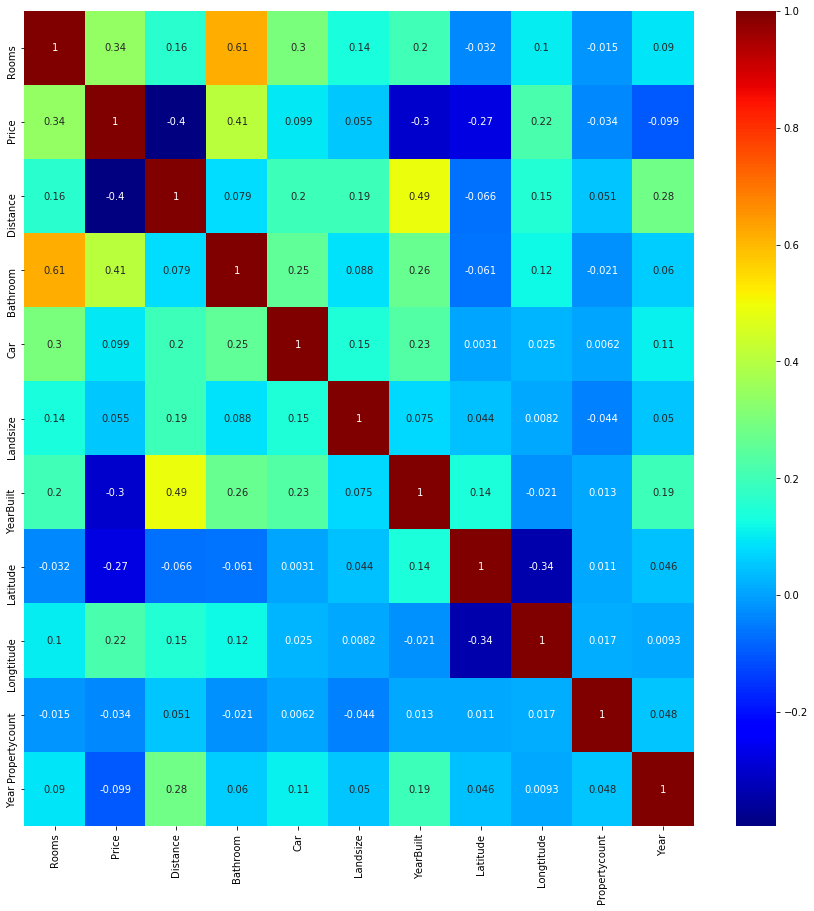

In [18]:
# let's visualize the correlation thru heatmap
fig, ax = plt.subplots(figsize=(15,15)) 
heat_map = sns.heatmap(df[df["Type"] == "h"].corr(), cmap = 'jet', annot=True)

In [19]:
# Abbreviated Region name categories 
df['Reg_abv'] = df['Regionname'].map({'Northern Metropolitan':'N M',
                                            'Western Metropolitan':'W M', 
                                            'Southern Metropolitan':'S M', 
                                            'Eastern Metropolitan':'E M', 
                                            'South-Eastern Metropolitan':'SE M', 
                                            'Northern Victoria':'N V',
                                            'Eastern Victoria':'E V',
                                            'Western Victoria':'W V'})

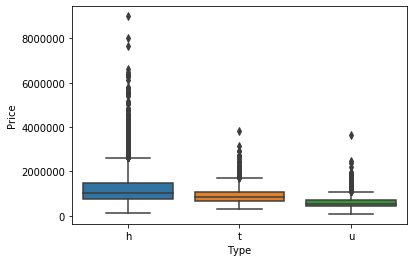

In [20]:
sns.boxplot(x="Type", y="Price", data=df) # box plot between Type (categorical variable) and Price

We see that the distributions of price between the different type of property have a significant overlap, and so Type would not be a good predictor of price.

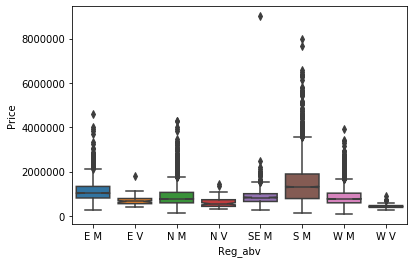

In [21]:
sns.boxplot(x=df['Reg_abv'], y="Price", data=df,notch='True')

Again we can see the significant overlap of prices for different regions.

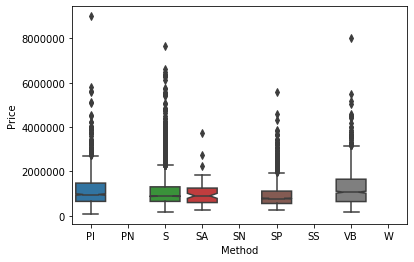

In [22]:
sns.boxplot(x="Method", y="Price", data=df,notch='True')

Box plot is inconclusive due to price overlap

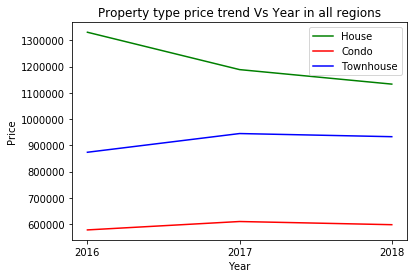

In [23]:
# plot of each type of property mean price vs year
df_house=df[df['Type']=='h'] # house price

df_unit=df[df['Type']=='u'] # unit duplex price

df_town=df[df['Type']=='t'] # town price
#house, duplex and town house price groupby year and mean
df_house_year=df_house.groupby('Year').mean()
df_unit_year=df_unit.groupby('Year').mean()
df_town_year=df_town.groupby('Year').mean()

#sns.lmplot(x="Year", y="Price", hue="Type", data=df,  x_estimator=np.mean);
df_house_year['Price'].plot(kind='line', color='g',label='House')
df_unit_year['Price'].plot(kind='line', color='r',label='Condo')
df_town_year['Price'].plot(kind='line', color='b',label='Townhouse')
year_xticks=[2016,2017,2018]
plt.ylabel('Price')
plt.xticks( year_xticks)
plt.title('Property type price trend Vs Year in all regions')
plt.legend()

Graph suggests that House price decreased by ~ $100,000/year,  Condo price climbed up slowly while Townhouse price remained almost same. It is time to built more condos in 2019 due to minimal change in price over 3 year period. Furthermore, it can be concluded that buyers should be interested in buying House in coming years due to dramatic change in price.

# Predicting prices for all types of property in all region of Melbourne

In [24]:
# linear regression between price & Rooms
lm = LinearRegression() # create linear regression object
X = df[['Rooms']]
Y = df[['Price']]
lm.fit(X,Y) # fit the model using Year
Yhat = lm.predict(X)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(X, Y))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat, Y))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat, Y))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat, Y)))
print("Predicted price for 2 bedroom is %.1f" % lm.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[331389.08527692]]
The intercept is:  [61648.8806148]
The R-square is 0.23
Mean Square Error is 347433911260.37
Mean absolute Error is 407808.56
Root Mean Squared Error is 589435.25
Predicted price for 2 bedroom is 724427.1


In [25]:
# linear regression between price & Year
lm = LinearRegression() # create linear regression object
X = df[['Year']]
Y = df[['Price']]
lm.fit(X,Y) # fit the model using Year
Yhat = lm.predict(X)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(X, Y))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat, Y))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat, Y))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat, Y)))
print("Predicted price for year 2019 is %.1f" % lm.predict([[2019]])) # predict the price for year 2019

The coefficient is:  [[2033.32995307]]
The intercept is:  [-3023516.65876254]
The R-square is 0.00
Mean Square Error is 450737947895.11
Mean absolute Error is 479036.19
Root Mean Squared Error is 671370.20
Predicted price for year 2019 is 1081776.5


 not a good relationship between year & price. Hence we will use it in MLR.

In [26]:
# linear regression between price & Distance
X = df[['Distance']]
lm.fit(X,Y) # fit the model using Year
Yhat = lm.predict(X)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(X, Y))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat, Y))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat, Y))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat, Y)))
print("Average Predicted price within 20 km from CBD is %.1f" % lm.predict([[20]])) # predict the price

The coefficient is:  [[-22361.13331199]]
The intercept is:  [1329612.06139636]
The R-square is 0.05
Mean Square Error is 426426056306.34
Mean absolute Error is 456927.23
Root Mean Squared Error is 653013.06
Average Predicted price within 20 km from CBD is 882389.4


 above analysis suggests that there is no good relationship between distance and price

In [27]:
# linear regression between price & Bathroom
X = df[['Bathroom']]
lm.fit(X,Y) # fit the model using Year
Yhat = lm.predict(X)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(X, Y))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat, Y))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat, Y))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat, Y)))
print("Average Predicted price for 2 bathroom is %.1f" % lm.predict([[2]])) # predict the price

The coefficient is:  [[442254.39093275]]
The intercept is:  [354315.86026488]
The R-square is 0.22
Mean Square Error is 352511737568.49
Mean absolute Error is 425552.29
Root Mean Squared Error is 593726.99
Average Predicted price for 2 bathroom is 1238824.6


In [28]:
# Multiple linear regression for all types of properties in Melbourne
Z = df[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm = LinearRegression() # create Multiple linear regression object
Y = df[['Price']]
lm.fit(Z,Y)
Yhat = lm.predict(Z)
# Model Evaluation
print('The coefficients are: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(Z, Y))
print('Mean Square Error is', mean_squared_error(Y, Yhat))
print('Mean absolute Error is', mean_absolute_error(Y, Yhat))
print('Root Mean Squared Error is', sqrt(mean_squared_error(Y, Yhat)))
print("Average Predicted price is %.1f" % lm.predict([[2,20,2,2019,2005,1,200]])) 
# predict the price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Lansize=200 

The coefficients are:  [[ 2.09079122e+05 -2.79027834e+04  3.27075286e+05  1.47093772e+04
  -6.03932335e+03  5.98294126e+04  2.43337170e+01]]
The intercept is:  [-17685438.94257416]
The R-square is 0.50
Mean Square Error is 223712123766.4442
Mean absolute Error is 316916.8244077395
Root Mean Squared Error is 472982.1600932156
Average Predicted price is 482899.7


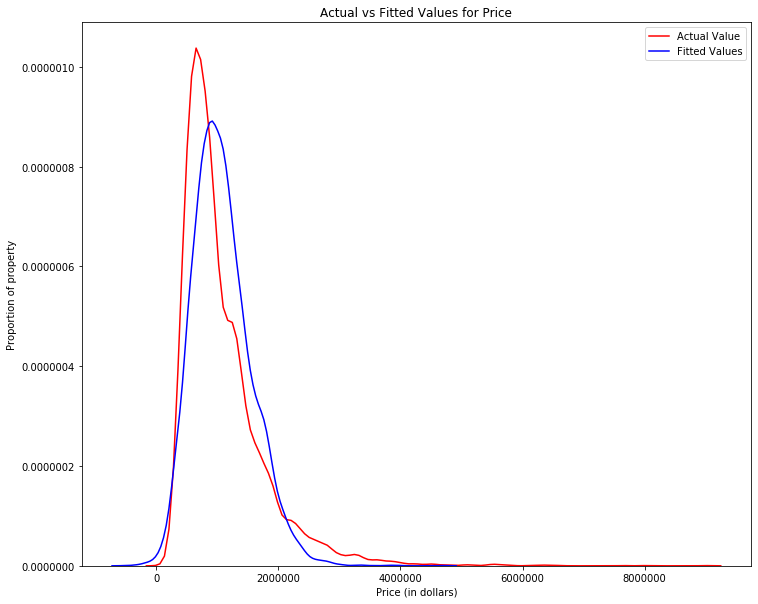

In [29]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [30]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
Z_pr=pr.fit_transform(Z) # transform
print('original data is of:', Z.shape)
print('after transformation:', Z_pr.shape)
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input) # input the list as an argument to the pipeline constructor

pipe.fit(Z,Y) # normalize the data, perform a transform and fit the model simultaneously.
Ypipe=pipe.predict(Z)
print("The R-square is %0.2f"% pipe.score(Z,Y))
print("Mean Square Error is %0.2f"% mean_squared_error(Y, Ypipe))
print("Mean absolute Error is %0.2f"% mean_absolute_error(Y, Ypipe))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(Y, Ypipe)))
print("Average Predicted price is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]])) 

original data is of: (12081, 7)
after transformation: (12081, 36)
The R-square is 0.57
Mean Square Error is 194879757040.13
Mean absolute Error is 290103.17
Root Mean Squared Error is 441451.87
Average Predicted price is 444519.5


In [31]:
# Ridge regression for all properties in Melbourne
pr=PolynomialFeatures(degree=2)
Z_train, Z_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=0) # train test split (20%/80%)
Z_train_pr=pr.fit_transform(Z_train) # fit the train data
Z_test_pr=pr.fit_transform(Z_test) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(Z_train_pr, y_train) # fit the model
Yhat = RigeModel.predict(Z_test_pr) # predict the value
print('predicted:', Yhat[0:2])
print('test set :', y_test[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(Z_test_pr, y_test))
print("Mean Square Error is %0.2f"% mean_squared_error(y_test, Yhat))
print("Mean absolute Error is %0.2f"% mean_absolute_error(y_test, Yhat))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(y_test, Yhat)))

predicted: [[ 815792.16471004]
 [1584403.14350724]]
test set : [[ 611000.]
 [1728000.]]
The R-square is 0.55
Mean Square Error is 185868404116.81
Mean absolute Error is 284587.08
Root Mean Squared Error is 431124.58


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.27889e-20): result may not be accurate.
  overwrite_a=True).T


In [32]:
#Initialise Lasso Regression model
lcv = LassoCV()
Z_train, Z_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=3) # train test split
lcv.fit(Z_train, y_train)
# Make Prediction
Y_pred = lcv.predict(Z_test)

# Return Results
print("The R-square is %0.2f"% lcv.score(Z_test, y_test))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test,Y_pred))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(y_test,Y_pred))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))
se_lcv = stats.sem(Y_pred)

The R-square is 0.52
Lasso Regression MAE: 308632.5
Lasso Regression MSE:213470186412.2
Lasso Regression RMSE:462028.3


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Principal Component Analysis for all properties in Melbourne

In [33]:
# define features 
Z = df[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
Y = df[['Price']]
scaler = MinMaxScaler() # Apply MinMaxScaler
Z_scalar = scaler.fit_transform(Z)
pca = PCA()
pca.fit(Z_scalar) # fit the PCA
Z_scalar = pca.transform(Z_scalar)

# Split the training data and test data
Z_train, Z_test, y_train, y_test = train_test_split(Z_scalar , Y , test_size = 0.2 , random_state = 0)

max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(Z_train, y_train)
    
    # Make prediction
    Y_pred = gbr.predict(Z_test)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(y_test,Y_pred))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test,Y_pred))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(y_test,Y_pred))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(y_test,Y_pred) > max_r2:
        max_r2 = metrics.explained_variance_score(y_test,Y_pred)
        max_i = i
        y_pred_gbr = Y_pred
        
        # Store Standard Error
        se_gbr = stats.sem(y_pred_gbr)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.62
Gradient Boosting Regression MAE: 270414.1
Gradient Boosting MSE:158294080005.5
Gradient Boosting RMSE:397861.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.62
Gradient Boosting Regression MAE: 270395.3
Gradient Boosting MSE:159063544171.8
Gradient Boosting RMSE:398827.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.62
Gradient Boosting Regression MAE: 269640.5
Gradient Boosting MSE:158665994495.9
Gradient Boosting RMSE:398329.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.61
Gradient Boosting Regression MAE: 270284.4
Gradient Boosting MSE:159337212066.8
Gradient Boosting RMSE:399170.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.60
Gradient Boosting Regression MAE: 271981.1
Gradient Boosting MSE:163479855044.4
Gradient Boosting RMSE:404326.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.60
Gradient Boosting Regression MAE: 273502.5
Gradient Boosting MSE:166462312160.1
Gradient Boosting RMSE:407997.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.59
Gradient Boosting Regression MAE: 274576.9
Gradient Boosting MSE:168892519805.6
Gradient Boosting RMSE:410965.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.58
Gradient Boosting Regression MAE: 278697.3
Gradient Boosting MSE:174806631602.4
Gradient Boosting RMSE:418098.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.59
Gradient Boosting Regression MAE: 275615.3
Gradient Boosting MSE:169654930379.6
Gradient Boosting RMSE:411891.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 278202.1
Gradient Boosting MSE:178705027782.4
Gradient Boosting RMSE:422735.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.55
Gradient Boosting Regression MAE: 288301.0
Gradient Boosting MSE:187754709233.8
Gradient Boosting RMSE:433306.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.56
Gradient Boosting Regression MAE: 284682.6
Gradient Boosting MSE:183777487760.2
Gradient Boosting RMSE:428692.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.54
Gradient Boosting Regression MAE: 287436.3
Gradient Boosting MSE:191311218655.0
Gradient Boosting RMSE:437391.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.52
Gradient Boosting Regression MAE: 290293.5
Gradient Boosting MSE:199671192392.8
Gradient Boosting RMSE:446845.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.54
Gradient Boosting Regression MAE: 290644.5
Gradient Boosting MSE:189976484267.5
Gradient Boosting RMSE:435862.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.53
Gradient Boosting Regression MAE: 297348.2
Gradient Boosting MSE:195546343882.4
Gradient Boosting RMSE:442206.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.49
Gradient Boosting Regression MAE: 300875.7
Gradient Boosting MSE:209308616702.2
Gradient Boosting RMSE:457502.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.46
Gradient Boosting Regression MAE: 310635.1
Gradient Boosting MSE:222132502713.3
Gradient Boosting RMSE:471309.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.42
Gradient Boosting Regression MAE: 309536.8
Gradient Boosting MSE:238343589854.9
Gradient Boosting RMSE:488204.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.49
Gradient Boosting Regression MAE: 303896.9
Gradient Boosting MSE:210637081048.6
Gradient Boosting RMSE:458952.2
---------------------------------
Max R^2 is: 0.62 with learning rate: 0.10


Text(0.5, 1.0, 'GBR Residual Plot')

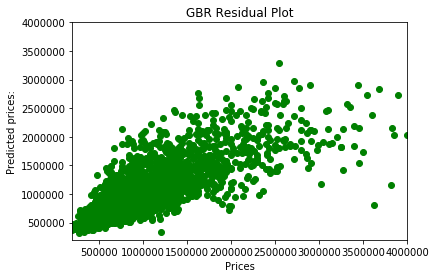

In [34]:
# Plot residual Plot of the GBR
plt.scatter(y_test, y_pred_gbr, c = 'green')
plt.ylim([200000, 4000000])
plt.xlim([200000, 4000000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot")

# Predicting price of each type of property separately in Melbourne 

## Modeling & Prediction of prices for type = house

In [35]:
# linear regression between price & Rooms
lm1 = LinearRegression() # create linear regression object
X1 = df_house[['Rooms']]
Y1 = df_house[['Price']]
lm1.fit(X1,Y1) # fit the model using Year
Yhat1 = lm1.predict(X1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(X1, Y1))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat1, Y1))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat1, Y1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat1, Y1)))
print("Predicted price for 2 bedroom house is %.1f" % lm1.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[285700.40979556]]
The intercept is:  [258540.04605539]
The R-square is 0.12
Mean Square Error is 444353999402.58
Mean absolute Error is 482321.92
Root Mean Squared Error is 666598.83
Predicted price for 2 bedroom house is 829940.9


In [36]:
# linear regression between price & Year
X1 = df_house[['Year']]
Y1 = df_house[['Price']]
lm1.fit(X1,Y1) # fit the model using Year
Yhat1 = lm1.predict(X1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(X1, Y1))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat1, Y1))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat1, Y1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat1, Y1)))
print("Predicted price of house for year 2019 is %.1f" % lm1.predict([[2019]])) # predict the price for year 2019

The coefficient is:  [[-107978.59818364]]
The intercept is:  [2.18999372e+08]
The R-square is 0.01
Mean Square Error is 498461412848.93
Mean absolute Error is 504354.47
Root Mean Squared Error is 706018.00
Predicted price of house for year 2019 is 990582.4


In [37]:
# linear regression between price & Distance
X1 = df_house[['Distance']]
lm1.fit(X1,Y1) # fit the model using Year
Yhat1 = lm1.predict(X1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(X1, Y1))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat1, Y1))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat1, Y1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat1, Y1)))
print("Predicted price of house within 20 km from CBD is %.1f" % lm1.predict([[20]])) # predict the price

The coefficient is:  [[-38243.9066262]]
The intercept is:  [1694816.56119382]
The R-square is 0.16
Mean Square Error is 424572342505.70
Mean absolute Error is 457295.49
Root Mean Squared Error is 651592.16
Predicted price of house within 20 km from CBD is 929938.4


In [38]:
# linear regression between price & Bathroom
X1 = df_house[['Bathroom']]
lm1.fit(X1,Y1) # fit the model using Year
Yhat1 = lm1.predict(X1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(X1, Y1))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat1, Y1))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat1, Y1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat1, Y1)))
print("Predicted price of house with 2 bathrooms is %.1f" % lm1.predict([[2]])) # predict the price

The coefficient is:  [[396396.15810976]]
The intercept is:  [537903.24796942]
The R-square is 0.17
Mean Square Error is 418309128154.21
Mean absolute Error is 468515.64
Root Mean Squared Error is 646768.22
Predicted price of house with 2 bathrooms is 1330695.6


In [39]:
# Multiple linear regression for all types of properties in Melbourne
Z1 = df_house[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm1 = LinearRegression() # create Multiple linear regression object
Y1 = df_house[['Price']]
lm1.fit(Z1,Y1)
Yhat1 = lm1.predict(Z1)
# Model Evaluation
print('The coefficients are: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(Z1, Y1))
print('Mean Square Error is', mean_squared_error(Y1, Yhat1))
print('Mean absolute Error is', mean_absolute_error(Y1, Yhat1))
print('Root Mean Squared Error is', sqrt(mean_squared_error(Y1, Yhat1)))
print("Predicted price of house is %.1f" % lm1.predict([[2,20,2,2019,2005,1,200]])) 
# predict the house price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Lansize=200 

The coefficients are:  [[ 1.67273316e+05 -3.30283223e+04  3.55076283e+05  2.65065748e+03
  -5.65053447e+03  4.83513055e+04  6.50903942e+01]]
The intercept is:  [6049295.4150817]
The R-square is 0.45
Mean Square Error is 274836277373.28894
Mean absolute Error is 359884.2987597999
Root Mean Squared Error is 524248.2974443398
Predicted price of house is 517153.4


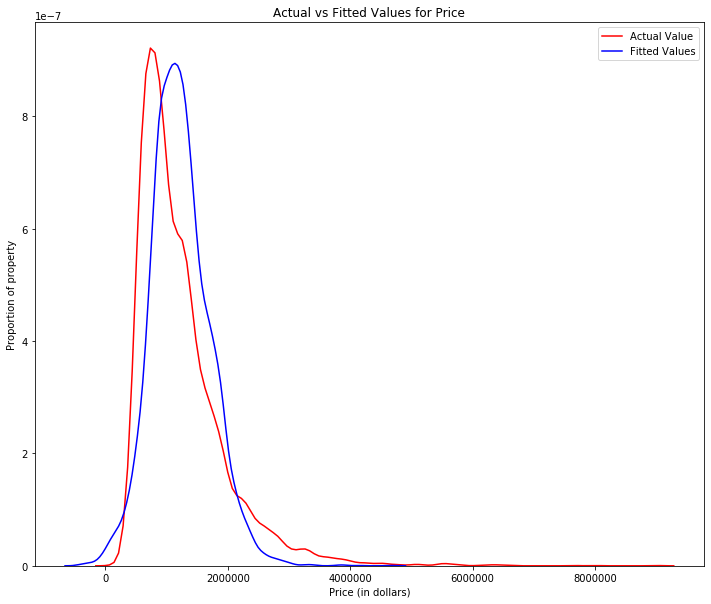

In [40]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_house['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are not reasonably close to the actual values, since the two distributions do not overlap a bit. However, there is definitely some room for improvement.

In [41]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
Z_pr1=pr.fit_transform(Z1) # transform
print('original data is of:', Z1.shape)
print('after transformation:', Z_pr1.shape)
Input1=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input1) # input the list as an argument to the pipeline constructor

pipe.fit(Z1,Y1) # normalize the data, perform a transform and fit the model simultaneously.
Ypipe1=pipe.predict(Z1)
print("The R-square is %0.2f"% pipe.score(Z1,Y1))
print("Mean Square Error is %0.2f"% mean_squared_error(Y1, Ypipe1))
print("Mean absolute Error is %0.2f"% mean_absolute_error(Y1, Ypipe1))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(Y1, Ypipe1)))
print("Predicted house price is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]])) 

original data is of: (8735, 7)
after transformation: (8735, 36)
The R-square is 0.53
Mean Square Error is 236314907931.78
Mean absolute Error is 327849.54
Root Mean Squared Error is 486122.32
Predicted house price is 350900.1


In [42]:
# Ridge regression for type = house in Melbourne
pr=PolynomialFeatures(degree=2)
Z_train1, Z_test1, y_train1, y_test1 = train_test_split(Z1, Y1, test_size=0.2, random_state=2) # train test split (20%/80%)
Z_train_pr1=pr.fit_transform(Z_train1) # fit the train data
Z_test_pr1=pr.fit_transform(Z_test1) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(Z_train_pr1, y_train1) # fit the model
Yhat1 = RigeModel.predict(Z_test_pr1) # predict the value
print('predicted:', Yhat1[0:2])
print('test set :', y_test1[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(Z_test_pr1, y_test1))
print("Mean Square Error is %0.2f"% mean_squared_error(y_test1, Yhat1))
print("Mean absolute Error is %0.2f"% mean_absolute_error(y_test1, Yhat1))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(y_test1, Yhat1)))

predicted: [[681849.57901096]
 [919980.3145566 ]]
test set : [[518500.]
 [632000.]]
The R-square is 0.54
Mean Square Error is 242892543041.20
Mean absolute Error is 323986.35
Root Mean Squared Error is 492841.30


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.39444e-20): result may not be accurate.
  overwrite_a=True).T


In [43]:
#Initialise Lasso Regression model
lcv = LassoCV()
Z_train1, Z_test1, y_train1, y_test1 = train_test_split(Z1, Y1, test_size=0.2, random_state=2) # train test split
lcv.fit(Z_train1, y_train1)
# Make Prediction
Y_pred1 = lcv.predict(Z_test1)

# Return Results
print("The R-square is %0.2f"% lcv.score(Z_test1, y_test1))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test1,Y_pred1))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(y_test1,Y_pred1))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test1,Y_pred1)))
se_lcv = stats.sem(Y_pred1)

The R-square is 0.46
Lasso Regression MAE: 358092.7
Lasso Regression MSE:284759354701.3
Lasso Regression RMSE:533628.5


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
# PCA for type = house in Melbourne
# define features 
Z1 = df_house[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
Y1 = df_house[['Price']]
scaler = MinMaxScaler() # Apply MinMaxScaler
Z_scalar1 = scaler.fit_transform(Z1)
pca = PCA()
pca.fit(Z_scalar1) # fit the PCA
Z_scalar1 = pca.transform(Z_scalar1)

# Split the training data and test data
Z_train1, Z_test1, y_train1, y_test1 = train_test_split(Z_scalar1 , Y1 , test_size = 0.2 , random_state = 2)

max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(Z_train1, y_train1)
    
    # Make prediction
    Y_pred1 = gbr.predict(Z_test1)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(y_test1,Y_pred1))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test1,Y_pred1))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(y_test1,Y_pred1))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test1,Y_pred1)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(y_test1,Y_pred1) > max_r2:
        max_r2 = metrics.explained_variance_score(y_test1,Y_pred1)
        max_i = i
        y_pred_gbr1 = Y_pred1
        
        # Store Standard Error
        se_gbr1 = stats.sem(y_pred_gbr1)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.58
Gradient Boosting Regression MAE: 310182.2
Gradient Boosting MSE:221143121373.1
Gradient Boosting RMSE:470258.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.58
Gradient Boosting Regression MAE: 307738.9
Gradient Boosting MSE:219940053472.9
Gradient Boosting RMSE:468977.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.59
Gradient Boosting Regression MAE: 308048.1
Gradient Boosting MSE:216039042656.3
Gradient Boosting RMSE:464800.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.59
Gradient Boosting Regression MAE: 308353.6
Gradient Boosting MSE:219104603071.5
Gradient Boosting RMSE:468086.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 312550.5
Gradient Boosting MSE:228461582641.5
Gradient Boosting RMSE:477976.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 311543.5
Gradient Boosting MSE:225155631203.1
Gradient Boosting RMSE:474505.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.58
Gradient Boosting Regression MAE: 314681.1
Gradient Boosting MSE:224296709435.1
Gradient Boosting RMSE:473599.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.58
Gradient Boosting Regression MAE: 311436.6
Gradient Boosting MSE:221057811268.2
Gradient Boosting RMSE:470167.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 317579.5
Gradient Boosting MSE:227715424298.9
Gradient Boosting RMSE:477195.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.54
Gradient Boosting Regression MAE: 324174.4
Gradient Boosting MSE:242425309239.8
Gradient Boosting RMSE:492367.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.52
Gradient Boosting Regression MAE: 324762.4
Gradient Boosting MSE:255408812711.9
Gradient Boosting RMSE:505379.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.53
Gradient Boosting Regression MAE: 330016.6
Gradient Boosting MSE:246119307489.6
Gradient Boosting RMSE:496104.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 320891.7
Gradient Boosting MSE:229951063792.8
Gradient Boosting RMSE:479532.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.52
Gradient Boosting Regression MAE: 333463.4
Gradient Boosting MSE:254660238886.4
Gradient Boosting RMSE:504638.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.54
Gradient Boosting Regression MAE: 330398.8
Gradient Boosting MSE:245809880738.3
Gradient Boosting RMSE:495792.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.51
Gradient Boosting Regression MAE: 333519.6
Gradient Boosting MSE:258899577491.0
Gradient Boosting RMSE:508821.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.50
Gradient Boosting Regression MAE: 334595.8
Gradient Boosting MSE:265130345494.0
Gradient Boosting RMSE:514908.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.48
Gradient Boosting Regression MAE: 343258.6
Gradient Boosting MSE:276342902668.9
Gradient Boosting RMSE:525683.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.48
Gradient Boosting Regression MAE: 342870.9
Gradient Boosting MSE:274928203590.6
Gradient Boosting RMSE:524336.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.43
Gradient Boosting Regression MAE: 353391.5
Gradient Boosting MSE:302615103079.0
Gradient Boosting RMSE:550104.6
---------------------------------
Max R^2 is: 0.59 with learning rate: 0.19


Text(0.5, 1.0, 'GBR Residual Plot')

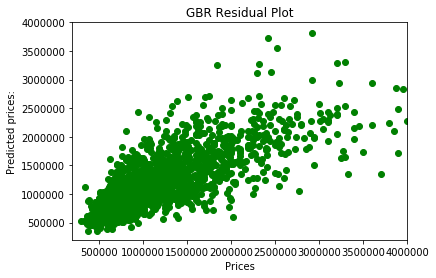

In [45]:
# Plot residual Plot of the GBR
plt.scatter(y_test1, y_pred_gbr1, c = 'green')
plt.ylim([200000, 4000000])
plt.xlim([200000, 4000000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot")

## Modeling & prediction of price for type = unit

In [46]:
# linear regression between price & Rooms
lm2 = LinearRegression() # create linear regression object
X2 = df_unit[['Rooms']]
Y2 = df_unit[['Price']]
lm2.fit(X2,Y2) # fit the model using Year
Yhat2 = lm2.predict(X2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(X2, Y2))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat2, Y2))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat2, Y2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat2, Y2)))
print("Predicted price for 2 bedroom unit is %.1f" % lm2.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[206365.45913208]]
The intercept is:  [188982.45900223]
The R-square is 0.27
Mean Square Error is 44265620268.72
Mean absolute Error is 139612.96
Root Mean Squared Error is 210393.96
Predicted price for 2 bedroom unit is 601713.4


In [47]:
# linear regression between price & Year
X2 = df_unit[['Year']]
lm2.fit(X2,Y2) # fit the model using Year
Yhat2 = lm2.predict(X2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(X2, Y2))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat2, Y2))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat2, Y2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat2, Y2)))
print("Predicted price of unit for year 2019 is %.1f" % lm2.predict([[2019]])) # predict the price for year 2019

The coefficient is:  [[30623.32572078]]
The intercept is:  [-61158648.19225721]
The R-square is 0.00
Mean Square Error is 60001290480.87
Mean absolute Error is 172374.49
Root Mean Squared Error is 244951.61
Predicted price of unit for year 2019 is 669846.4


In [48]:
# linear regression between price & Distance
X2 = df_unit[['Distance']]
Y2 = df_unit[['Price']]
lm2.fit(X2,Y2) # fit the model using Year
Yhat2 = lm2.predict(X2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(X2, Y2))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat2, Y2))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat2, Y2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat2, Y2)))
print("Predicted price of unit within 20 km from CBD is %.1f" % lm2.predict([[20]])) # predict the price

The coefficient is:  [[-2900.6478506]]
The intercept is:  [616892.38405053]
The R-square is 0.00
Mean Square Error is 60042133270.75
Mean absolute Error is 173580.21
Root Mean Squared Error is 245034.96
Predicted price of unit within 20 km from CBD is 558879.4


In [49]:
# linear regression between price & Bathroom
X2 = df_unit[['Bathroom']]
lm2.fit(X2,Y2) # fit the model using Year
Yhat2 = lm2.predict(X2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(X2, Y2))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat2, Y2))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat2, Y2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat2, Y2)))
print("Predicted price of unit with 2 bathrooms is %.1f" % lm2.predict([[2]])) # predict the price

The coefficient is:  [[290441.39353019]]
The intercept is:  [249147.06906783]
The R-square is 0.22
Mean Square Error is 46813169058.84
Mean absolute Error is 154869.44
Root Mean Squared Error is 216363.51
Predicted price of unit with 2 bathrooms is 830029.9


In [50]:
# Multiple linear regression for type=unit in Melbourne
Z2 = df_unit[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm2 = LinearRegression() # create Multiple linear regression object
Y2 = df_unit[['Price']]
lm2.fit(Z2,Y2)
Yhat2 = lm2.predict(Z2)
# Model Evaluation
print('The coefficients are: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(Z2, Y2))
print('Mean Square Error is', mean_squared_error(Y2, Yhat2))
print('Mean absolute Error is', mean_absolute_error(Y2, Yhat2))
print('Root Mean Squared Error is', sqrt(mean_squared_error(Y2, Yhat2)))
print("Predicted price of unit is %.1f" % lm2.predict([[2,20,2,2019,2005,1,200]])) 
# predict the house price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Lansize=200 

The coefficients are:  [[ 1.57941015e+05 -9.56677170e+03  1.85252576e+05  3.36392255e+04
  -1.60069009e+03  8.42241637e+04  2.08775488e+00]]
The intercept is:  [-64621444.26708247]
The R-square is 0.42
Mean Square Error is 34983812897.81859
Mean absolute Error is 128069.6310961709
Root Mean Squared Error is 187039.60248519186
Predicted price of unit is 666461.9


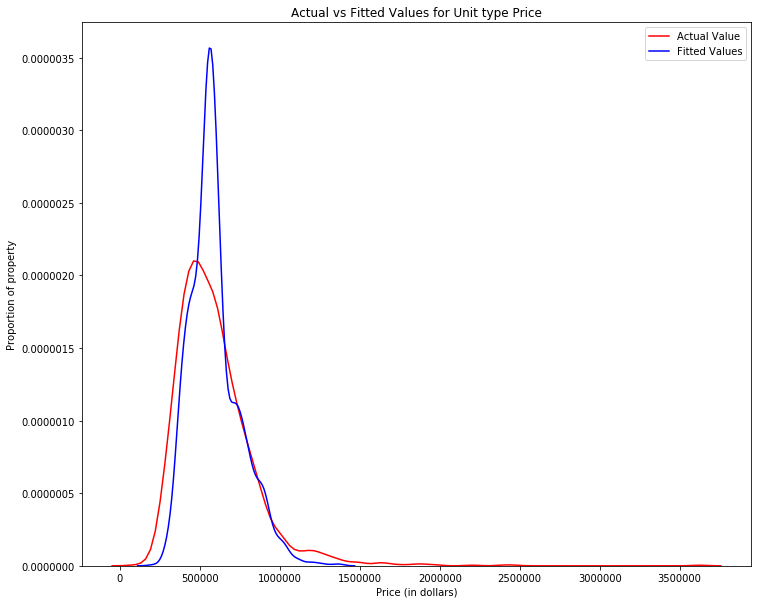

In [51]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_unit['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Unit type Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are not reasonably close to the actual values, since the two distributions do not overlap a bit. However, there is definitely some room for improvement.

In [52]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
Z_pr2=pr.fit_transform(Z2) # transform
print('original data is of:', Z2.shape)
print('after transformation:', Z_pr2.shape)
Input2=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input2) # input the list as an argument to the pipeline constructor

pipe.fit(Z2,Y2) # normalize the data, perform a transform and fit the model simultaneously.
Ypipe2=pipe.predict(Z2)
print("The R-square is %0.2f"% pipe.score(Z2,Y2))
print("Mean Square Error is %0.2f"% mean_squared_error(Y2, Ypipe2))
print("Mean absolute Error is %0.2f"% mean_absolute_error(Y2, Ypipe2))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(Y2, Ypipe2)))
print("Predicted unit price is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]])) 

original data is of: (2310, 7)
after transformation: (2310, 36)
The R-square is 0.48
Mean Square Error is 31331005903.05
Mean absolute Error is 123458.67
Root Mean Squared Error is 177005.67
Predicted unit price is 616668.2


In [53]:
# Ridge regression for type = unit in Melbourne
pr=PolynomialFeatures(degree=2)
Z_train2, Z_test2, y_train2, y_test2 = train_test_split(Z2, Y2, test_size=0.2, random_state=2) # train test split (20%/80%)
Z_train_pr2=pr.fit_transform(Z_train2) # fit the train data
Z_test_pr2=pr.fit_transform(Z_test2) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(Z_train_pr2, y_train2) # fit the model
Yhat2 = RigeModel.predict(Z_test_pr2) # predict the value
print('predicted:', Yhat2[0:2])
print('test set :', y_test2[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(Z_test_pr2, y_test2))
print("Mean Square Error is %0.2f"% mean_squared_error(y_test2, Yhat2))
print("Mean absolute Error is %0.2f"% mean_absolute_error(y_test2, Yhat2))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(y_test2, Yhat2)))

predicted: [[545813.94145709]
 [601290.89143223]]
test set : [[651000.]
 [840000.]]
The R-square is 0.53
Mean Square Error is 27114439582.58
Mean absolute Error is 123549.57
Root Mean Squared Error is 164664.63


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.94494e-20): result may not be accurate.
  overwrite_a=True).T


In [54]:
#Initialise Lasso Regression model
lcv = LassoCV()
Z_train2, Z_test2, y_train2, y_test2 = train_test_split(Z2, Y2, test_size=0.2, random_state=1) # train test split
lcv.fit(Z_train2, y_train2)
# Make Prediction
Y_pred2 = lcv.predict(Z_test2)

# Return Results
print("The R-square is %0.2f"% lcv.score(Z_test2, y_test2))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test2,Y_pred2))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(y_test2,Y_pred2))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test2,Y_pred2)))
se_lcv = stats.sem(Y_pred2)

The R-square is 0.39
Lasso Regression MAE: 134973.0
Lasso Regression MSE:36611966771.8
Lasso Regression RMSE:191342.5


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# PCA for type = house in Melbourne
# define features 
Z2 = df_unit[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
Y2 = df_unit[['Price']]
scaler = MinMaxScaler() # Apply MinMaxScaler
Z_scalar2 = scaler.fit_transform(Z2)
pca = PCA()
pca.fit(Z_scalar2) # fit the PCA
Z_scalar2 = pca.transform(Z_scalar2)

# Split the training data and test data
Z_train2, Z_test2, y_train2, y_test2 = train_test_split(Z_scalar2 , Y2 , test_size = 0.2 , random_state = 1)

max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(Z_train2, y_train2)
    
    # Make prediction
    Y_pred2 = gbr.predict(Z_test2)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(y_test2,Y_pred2))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test2,Y_pred2))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(y_test2,Y_pred2))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test2,Y_pred2)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(y_test2,Y_pred2) > max_r2:
        max_r2 = metrics.explained_variance_score(y_test2,Y_pred2)
        max_i = i
        y_pred_gbr2 = Y_pred2
        
        # Store Standard Error
        se_gbr2 = stats.sem(y_pred_gbr2)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.47
Gradient Boosting Regression MAE: 126731.0
Gradient Boosting MSE:31572710227.7
Gradient Boosting RMSE:177687.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.49
Gradient Boosting Regression MAE: 126578.5
Gradient Boosting MSE:30739045558.8
Gradient Boosting RMSE:175325.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.46
Gradient Boosting Regression MAE: 127279.8
Gradient Boosting MSE:32498464058.1
Gradient Boosting RMSE:180273.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.46
Gradient Boosting Regression MAE: 127167.6
Gradient Boosting MSE:32338590499.2
Gradient Boosting RMSE:179829.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.45
Gradient Boosting Regression MAE: 128698.2
Gradient Boosting MSE:33153737791.0
Gradient Boosting RMSE:182081.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.47
Gradient Boosting Regression MAE: 125869.1
Gradient Boosting MSE:31833291424.7
Gradient Boosting RMSE:178418.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.45
Gradient Boosting Regression MAE: 126205.8
Gradient Boosting MSE:33189165240.8
Gradient Boosting RMSE:182178.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.44
Gradient Boosting Regression MAE: 127336.2
Gradient Boosting MSE:33843557430.3
Gradient Boosting RMSE:183966.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.42
Gradient Boosting Regression MAE: 132134.2
Gradient Boosting MSE:34909294023.9
Gradient Boosting RMSE:186840.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.42
Gradient Boosting Regression MAE: 132302.1
Gradient Boosting MSE:34722682735.9
Gradient Boosting RMSE:186340.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.42
Gradient Boosting Regression MAE: 132643.9
Gradient Boosting MSE:34678775358.2
Gradient Boosting RMSE:186222.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.36
Gradient Boosting Regression MAE: 136542.3
Gradient Boosting MSE:38598065910.3
Gradient Boosting RMSE:196463.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.32
Gradient Boosting Regression MAE: 141120.5
Gradient Boosting MSE:41072486715.8
Gradient Boosting RMSE:202663.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.27
Gradient Boosting Regression MAE: 138965.8
Gradient Boosting MSE:43678535739.4
Gradient Boosting RMSE:208994.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.28
Gradient Boosting Regression MAE: 140929.9
Gradient Boosting MSE:43264943166.3
Gradient Boosting RMSE:208002.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.17
Gradient Boosting Regression MAE: 147585.0
Gradient Boosting MSE:49918322590.0
Gradient Boosting RMSE:223424.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.19
Gradient Boosting Regression MAE: 146923.8
Gradient Boosting MSE:48622065966.6
Gradient Boosting RMSE:220504.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: -0.00
Gradient Boosting Regression MAE: 161927.3
Gradient Boosting MSE:59931029539.2
Gradient Boosting RMSE:244808.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.26
Gradient Boosting Regression MAE: 152212.2
Gradient Boosting MSE:44304554113.6
Gradient Boosting RMSE:210486.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: -0.13
Gradient Boosting Regression MAE: 169190.5
Gradient Boosting MSE:68066972509.8
Gradient Boosting RMSE:260896.5
---------------------------------
Max R^2 is: 0.49 with learning rate: 0.15


Text(0.5, 1.0, 'GBR Residual Plot')

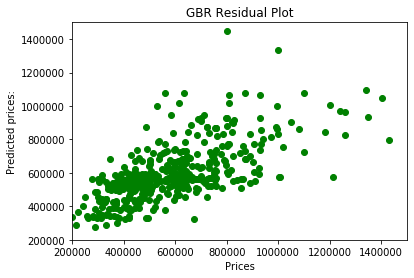

In [56]:
# Plot residual Plot of the GBR
plt.scatter(y_test2, y_pred_gbr2, c = 'green')
plt.ylim([200000, 1500000])
plt.xlim([200000, 1500000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot")

## Modeling & Prediction of price for type = townhouse

In [57]:
# linear regression between price & Rooms
lm3 = LinearRegression() # create linear regression object
X3 = df_town[['Rooms']]
Y3 = df_town[['Price']]
lm3.fit(X3,Y3) # fit the model using Year
Yhat3 = lm3.predict(X3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(X3, Y3))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat3, Y3))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat3, Y3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat3, Y3)))
print("Predicted price for 2 bedroom townhouse is %.1f" % lm3.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[249054.36445333]]
The intercept is:  [202919.07566303]
The R-square is 0.19
Mean Square Error is 121931220154.25
Mean absolute Error is 244730.91
Root Mean Squared Error is 349186.51
Predicted price for 2 bedroom townhouse is 701027.8


In [58]:
# linear regression between price & Year
X3 = df_town[['Year']]
lm3.fit(X3,Y3) # fit the model using Year
Yhat3 = lm3.predict(X3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(X3, Y3))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat3, Y3))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat3, Y3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat3, Y3)))
print("Predicted price of townhouse for year 2019 is %.1f" % lm3.predict([[2019]])) # predict the price for year 2019

The coefficient is:  [[48740.52824524]]
The intercept is:  [-97377464.32556154]
The R-square is 0.01
Mean Square Error is 149545613406.88
Mean absolute Error is 279083.69
Root Mean Squared Error is 386711.28
Predicted price of townhouse for year 2019 is 1029662.2


In [59]:
# linear regression between price & Distance
X3 = df_town[['Distance']]
lm3.fit(X3,Y3) # fit the model using Year
Yhat3 = lm3.predict(X3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(X3, Y3))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat3, Y3))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat3, Y3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat3, Y3)))
print("Predicted price of town within 20 km from CBD is %.1f" % lm3.predict([[20]])) # predict the price

The coefficient is:  [[-11269.01076865]]
The intercept is:  [1033399.88214291]
The R-square is 0.02
Mean Square Error is 147485947468.09
Mean absolute Error is 279363.71
Root Mean Squared Error is 384038.99
Predicted price of town within 20 km from CBD is 808019.7


In [60]:
# linear regression between price & Bathroom
X3 = df_town[['Bathroom']]
lm3.fit(X3,Y3) # fit the model using Year
Yhat3 = lm3.predict(X3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(X3, Y3))
print("Mean Square Error is %.2f" % mean_squared_error(Yhat3, Y3))
print("Mean absolute Error is %.2f" % mean_absolute_error(Yhat3, Y3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(Yhat3, Y3)))
print("Predicted price of townhouse with 2 bathrooms is %.1f" % lm3.predict([[2]])) # predict the price

The coefficient is:  [[283480.17520674]]
The intercept is:  [401463.2239715]
The R-square is 0.20
Mean Square Error is 120077531126.98
Mean absolute Error is 245754.89
Root Mean Squared Error is 346522.05
Predicted price of townhouse with 2 bathrooms is 968423.6


In [61]:
# Multiple linear regression for type=townhouse in Melbourne
Z3 = df_town[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm3 = LinearRegression() # create Multiple linear regression object
Y3 = df_town[['Price']]
lm3.fit(Z3,Y3)
Yhat3 = lm3.predict(Z3)
# Model Evaluation
print('The coefficients are: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(Z3, Y3))
print('Mean Square Error is', mean_squared_error(Y3, Yhat3))
print('Mean absolute Error is', mean_absolute_error(Y3, Yhat3))
print('Root Mean Squared Error is', sqrt(mean_squared_error(Y3, Yhat3)))
print("Predicted price of townhouse is %.1f" % lm3.predict([[2,20,2,2019,2005,1,200]])) 
# predict the townhouse price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Lansize=200 

The coefficients are:  [[ 1.37724889e+05 -1.84592378e+04  1.68155028e+05  4.08134229e+04
  -2.52753594e+03  1.40801100e+05  1.23402994e+01]]
The intercept is:  [-77079338.94445302]
The R-square is 0.34
Mean Square Error is 98566757721.45303
Mean absolute Error is 221245.38982002248
Root Mean Squared Error is 313953.43240909633
Predicted price of townhouse is 641096.6


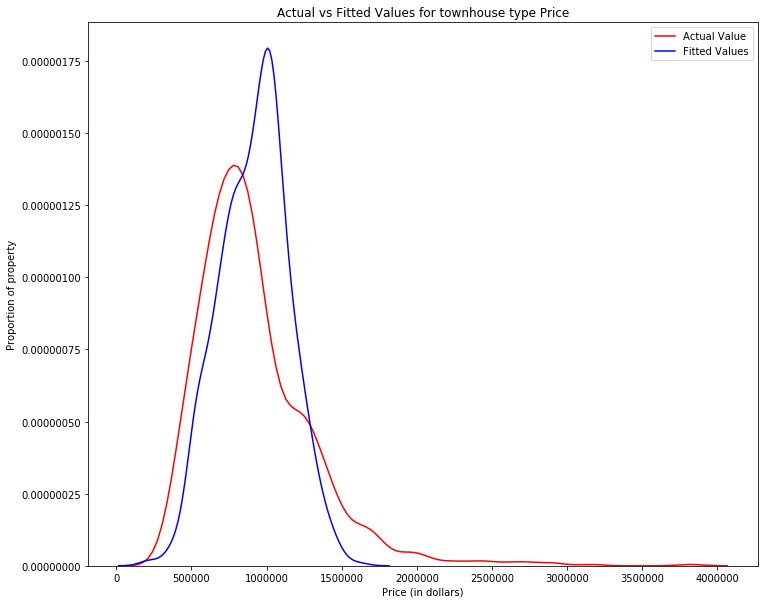

In [62]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_town['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for townhouse type Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are not reasonably close to the actual values, since the two distributions do not overlap a bit. However, there is definitely some room for improvement.

In [63]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
Z_pr3=pr.fit_transform(Z3) # transform
print('original data is of:', Z3.shape)
print('after transformation:', Z_pr3.shape)
Input3=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input3) # input the list as an argument to the pipeline constructor

pipe.fit(Z3,Y3) # normalize the data, perform a transform and fit the model simultaneously.
Ypipe3=pipe.predict(Z3)
print("The R-square is %0.2f"% pipe.score(Z3,Y3))
print("Mean Square Error is %0.2f"% mean_squared_error(Y3, Ypipe3))
print("Mean absolute Error is %0.2f"% mean_absolute_error(Y3, Ypipe3))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(Y3, Ypipe3)))
print("Predicted townhouse price is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]]))

original data is of: (1036, 7)
after transformation: (1036, 36)
The R-square is 0.40
Mean Square Error is 89632297535.02
Mean absolute Error is 209798.64
Root Mean Squared Error is 299386.54
Predicted townhouse price is 558819.6


In [64]:
# Ridge regression for type = unit in Melbourne
pr=PolynomialFeatures(degree=2)
Z_train3, Z_test3, y_train3, y_test3 = train_test_split(Z3, Y3, test_size=0.2, random_state=2) # train test split (20%/80%)
Z_train_pr3=pr.fit_transform(Z_train3) # fit the train data
Z_test_pr3=pr.fit_transform(Z_test3) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(Z_train_pr3, y_train3) # fit the model
Yhat3 = RigeModel.predict(Z_test_pr3) # predict the value
print('predicted:', Yhat3[0:2])
print('test set :', y_test3[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(Z_test_pr3, y_test3))
print("Mean Square Error is %0.2f"% mean_squared_error(y_test3, Yhat3))
print("Mean absolute Error is %0.2f"% mean_absolute_error(y_test3, Yhat3))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(y_test3, Yhat3)))

predicted: [[856237.31918466]
 [996686.23838222]]
test set : [[ 720000.]
 [1320000.]]
The R-square is 0.39
Mean Square Error is 95873220545.23
Mean absolute Error is 223910.20
Root Mean Squared Error is 309634.01


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.14387e-18): result may not be accurate.
  overwrite_a=True).T


In [65]:
#Initialise Lasso Regression model
lcv = LassoCV()
Z_train3, Z_test3, y_train3, y_test3 = train_test_split(Z3, Y3, test_size=0.2, random_state=2) # train test split
lcv.fit(Z_train3, y_train3)
# Make Prediction
Y_pred3 = lcv.predict(Z_test3)

# Return Results
print("The R-square is %0.2f"% lcv.score(Z_test3, y_test3))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test3,Y_pred3))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(y_test3,Y_pred3))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test3,Y_pred3)))
se_lcv = stats.sem(Y_pred3)

The R-square is 0.35
Lasso Regression MAE: 234859.0
Lasso Regression MSE:101891709698.2
Lasso Regression RMSE:319204.8


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
# PCA for type = townhouse in Melbourne
# define features 
Z3 = df_town[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
Y3 = df_town[['Price']]
scaler = MinMaxScaler() # Apply MinMaxScaler
Z_scalar3 = scaler.fit_transform(Z3)
pca = PCA()
pca.fit(Z_scalar3) # fit the PCA
Z_scalar3 = pca.transform(Z_scalar3)

# Split the training data and test data
Z_train3, Z_test3, y_train3, y_test3 = train_test_split(Z_scalar3 , Y3 , test_size = 0.2 , random_state = 2)

max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(Z_train3, y_train3)
    
    # Make prediction
    Y_pred3 = gbr.predict(Z_test3)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(y_test3,Y_pred3))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(y_test3,Y_pred3))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(y_test3,Y_pred3))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(y_test3,Y_pred3)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(y_test3,Y_pred3) > max_r2:
        max_r2 = metrics.explained_variance_score(y_test3,Y_pred3)
        max_i = i
        y_pred_gbr3 = Y_pred3
        
        # Store Standard Error
        se_gbr3 = stats.sem(y_pred_gbr3)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.43
Gradient Boosting Regression MAE: 216248.1
Gradient Boosting MSE:91151365074.4
Gradient Boosting RMSE:301912.8
---------------------------------
For learning rate i: 0.1
Gradient Boosting R^2: 0.45
Gradient Boosting Regression MAE: 210811.8
Gradient Boosting MSE:87952664755.4
Gradient Boosting RMSE:296568.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.42
Gradient Boosting Regression MAE: 218581.7
Gradient Boosting MSE:91649056251.2
Gradient Boosting RMSE:302736.0
---------------------------------
For learning rate i: 0.2
Gradient Boosting R^2: 0.41
Gradient Boosting Regression MAE: 216068.4
Gradient Boosting MSE:94245755609.7
Gradient Boosting RMSE:306994.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.39
Gradient Boosting Regression MAE: 218794.5
Gradient Boosting MSE:97486945146.9
Gradient Boosting RMSE:312229.0
---------------------------------
For learning rate i: 0.3
Gradient Boosting R^2: 0.37
Gradient Boosting Regression MAE: 225462.1
Gradient Boosting MSE:99346562527.7
Gradient Boosting RMSE:315192.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.35
Gradient Boosting Regression MAE: 229780.3
Gradient Boosting MSE:102548809425.6
Gradient Boosting RMSE:320232.4
---------------------------------
For learning rate i: 0.4
Gradient Boosting R^2: 0.32
Gradient Boosting Regression MAE: 236396.1
Gradient Boosting MSE:107682186807.4
Gradient Boosting RMSE:328149.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.32
Gradient Boosting Regression MAE: 237839.7
Gradient Boosting MSE:107590884817.2
Gradient Boosting RMSE:328010.5
---------------------------------
For learning rate i: 0.5
Gradient Boosting R^2: 0.31
Gradient Boosting Regression MAE: 240411.3
Gradient Boosting MSE:109702225933.6
Gradient Boosting RMSE:331213.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.29
Gradient Boosting Regression MAE: 234036.4
Gradient Boosting MSE:112275501470.4
Gradient Boosting RMSE:335075.4
---------------------------------
For learning rate i: 0.6
Gradient Boosting R^2: 0.20
Gradient Boosting Regression MAE: 258331.7
Gradient Boosting MSE:125894496157.2
Gradient Boosting RMSE:354816.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.29
Gradient Boosting Regression MAE: 246764.9
Gradient Boosting MSE:114538978371.7
Gradient Boosting RMSE:338436.1
---------------------------------
For learning rate i: 0.7
Gradient Boosting R^2: 0.13
Gradient Boosting Regression MAE: 262737.7
Gradient Boosting MSE:137758497737.7
Gradient Boosting RMSE:371158.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: -0.01
Gradient Boosting Regression MAE: 261060.0
Gradient Boosting MSE:157932744403.3
Gradient Boosting RMSE:397407.5
---------------------------------
For learning rate i: 0.8
Gradient Boosting R^2: 0.21
Gradient Boosting Regression MAE: 255483.5
Gradient Boosting MSE:125938899870.6
Gradient Boosting RMSE:354878.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.29
Gradient Boosting Regression MAE: 242711.9
Gradient Boosting MSE:113946647159.8
Gradient Boosting RMSE:337559.8
---------------------------------
For learning rate i: 0.9
Gradient Boosting R^2: -0.05
Gradient Boosting Regression MAE: 282257.6
Gradient Boosting MSE:164067902489.9
Gradient Boosting RMSE:405053.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.24
Gradient Boosting Regression MAE: 256897.6
Gradient Boosting MSE:122636032284.1
Gradient Boosting RMSE:350194.3
---------------------------------
For learning rate i: 1.0
Gradient Boosting R^2: 0.10
Gradient Boosting Regression MAE: 283781.4
Gradient Boosting MSE:141057861301.8
Gradient Boosting RMSE:375576.7
---------------------------------
Max R^2 is: 0.45 with learning rate: 0.15


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'GBR Residual Plot for Townhouse')

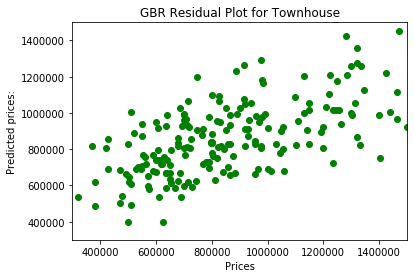

In [67]:
# Plot residual Plot of the GBR
plt.scatter(y_test3, y_pred_gbr3, c = 'green')
plt.ylim([300000, 1500000])
plt.xlim([300000, 1500000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot for Townhouse")

# Modeling & prediction of prices in Southern Metropolitan (SM) Region

In [68]:
df_S_M=df[df['Reg_abv']=='S M'] # create dataframe for SM region
df_S_M.shape

(3740, 21)

In [69]:
# linear regression between price & Rooms
lm = LinearRegression() # create linear regression object
u = df_S_M[['Rooms']]
v = df_S_M[['Price']]
lm.fit(u,v) # fit the model using Year
vhat = lm.predict(u)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(u, v))
print("Mean Square Error is %.2f" % mean_squared_error(vhat, v))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat, v))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat, v)))
print("Predicted price for 2 bedroom in SM region is %.1f" % lm.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[577342.41928174]]
The intercept is:  [-267810.12949519]
The R-square is 0.49
Mean Square Error is 405801216803.82
Mean absolute Error is 438260.18
Root Mean Squared Error is 637025.29
Predicted price for 2 bedroom in SM region is 886874.7


In [70]:
# linear regression between price & Year
u = df_S_M[['Year']]
lm.fit(u,v) # fit the model using Year
vhat = lm.predict(u)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(u, v))
print("Mean Square Error is %.2f" % mean_squared_error(vhat, v))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat, v))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat, v)))
print("Predicted price in SM region for year 2019 is %.1f" % lm.predict([[2019]])) # predict the price for year 2019

The coefficient is:  [[211525.63001613]]
The intercept is:  [-4.25109192e+08]
The R-square is 0.02
Mean Square Error is 778732270313.44
Mean absolute Error is 662206.18
Root Mean Squared Error is 882458.08
Predicted price in SM region for year 2019 is 1961055.5


In [71]:
# linear regression between price & Distance
u = df_S_M[['Distance']]
lm.fit(u,v) # fit the model using Year
vhat = lm.predict(u)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(u, v))
print("Mean Square Error is %.2f" % mean_squared_error(vhat, v))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat, v))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat, v)))
print("Average Predicted price within 20 km from CBD is %.1f" % lm.predict([[20]])) # predict the price

The coefficient is:  [[-8254.17359417]]
The intercept is:  [1530181.75337983]
The R-square is 0.00
Mean Square Error is 794503407776.87
Mean absolute Error is 669042.24
Root Mean Squared Error is 891349.21
Average Predicted price within 20 km from CBD is 1365098.3


In [72]:
# linear regression between price & Bathroom
u = df_S_M[['Bathroom']]
lm.fit(u,v) # fit the model 
vhat = lm.predict(u)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(u, v))
print("Mean Square Error is %.2f" % mean_squared_error(vhat, v))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat, v))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat, v)))
print("Average Predicted price for 2 bathroom is %.1f" % lm.predict([[2]])) # predict the price

The coefficient is:  [[701922.10419943]]
The intercept is:  [247232.80374809]
The R-square is 0.39
Mean Square Error is 487129988495.96
Mean absolute Error is 517633.16
Root Mean Squared Error is 697946.98
Average Predicted price for 2 bathroom is 1651077.0


In [73]:
# Multiple linear regression for all types of properties in SM region
w = df_S_M[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm = LinearRegression() # create Multiple linear regression object
v = df_S_M[['Price']]
lm.fit(w,v)
vhat = lm.predict(w)
# Model Evaluation
print('The coefficients are: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(w, v))
print('Mean Square Error is', mean_squared_error(v, vhat))
print('Mean absolute Error is', mean_absolute_error(v, vhat))
print('Root Mean Squared Error is', sqrt(mean_squared_error(v, vhat)))
print("Average Predicted price is %.1f" % lm.predict([[2,20,2,2019,2005,1,200]])) 
# predict the price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Lansize=200

The coefficients are:  [[ 3.49731682e+05 -4.28238942e+04  3.37473592e+05  6.60298714e+04
  -5.58487335e+03  1.60949997e+05  1.62975088e+01]]
The intercept is:  [-1.22275874e+08]
The R-square is 0.63
Mean Square Error is 292405613009.6028
Mean absolute Error is 365962.16094872507
Root Mean Squared Error is 540745.4234754121
Average Predicted price is 522907.0


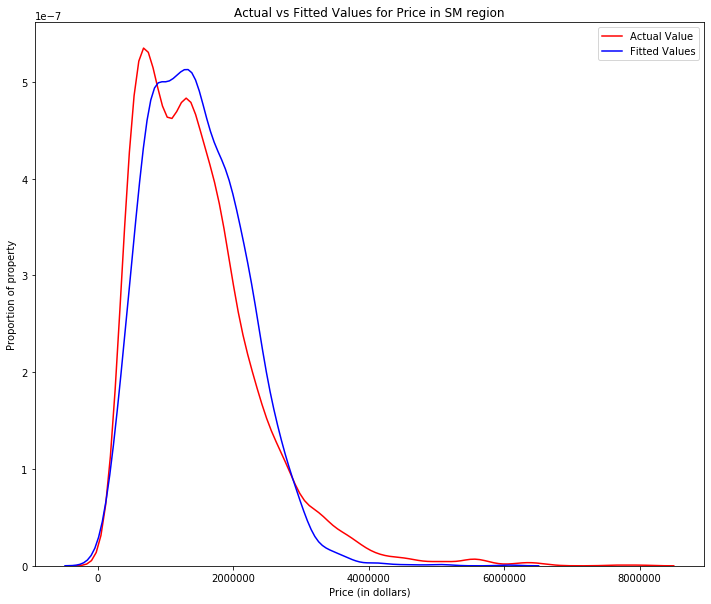

In [74]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_S_M['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(vhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price in SM region')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement

In [75]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
w_pr=pr.fit_transform(w) # transform
print('original data is of:', w.shape)
print('after transformation:', w_pr.shape)
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input) # input the list as an argument to the pipeline constructor

pipe.fit(w,v) # normalize the data, perform a transform and fit the model simultaneously.
vpipe=pipe.predict(w)
print("The R-square is %0.2f"% pipe.score(w,v))
print("Mean Square Error is %0.2f"% mean_squared_error(v, vpipe))
print("Mean absolute Error is %0.2f"% mean_absolute_error(v, vpipe))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(v, vpipe)))
print("Average Predicted price is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]])) 

original data is of: (3740, 7)
after transformation: (3740, 36)
The R-square is 0.68
Mean Square Error is 250889974244.40
Mean absolute Error is 338543.43
Root Mean Squared Error is 500889.18
Average Predicted price is 627889.1


In [76]:
# Ridge regression for all properties in SM region
pr=PolynomialFeatures(degree=2)
w_train, w_test, v_train, v_test = train_test_split(w, v, test_size=0.2, random_state=2) # train test split (20%/80%)
w_train_pr=pr.fit_transform(w_train) # fit the train data
w_test_pr=pr.fit_transform(w_test) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(w_train_pr, v_train) # fit the model
vhat = RigeModel.predict(w_test_pr) # predict the value
print('predicted:', vhat[0:2])
print('test set :', v_test[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(w_test_pr, v_test))
print("Mean Square Error is %0.2f"% mean_squared_error(v_test, vhat))
print("Mean absolute Error is %0.2f"% mean_absolute_error(v_test, vhat))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(v_test, vhat)))

predicted: [[1409518.16605242]
 [1357612.36604749]]
test set : [[1024000.]
 [1070000.]]
The R-square is 0.69
Mean Square Error is 280668505867.98
Mean absolute Error is 353303.31
Root Mean Squared Error is 529781.56


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.37501e-20): result may not be accurate.
  overwrite_a=True).T


In [77]:
#Initialise Lasso Regression model
lcv = LassoCV()
w_train, w_test, v_train, v_test = train_test_split(w, v, test_size=0.2, random_state=0) # train test split
lcv.fit(w_train, v_train)
# Make Prediction
v_pred = lcv.predict(w_test)

# Return Results
print("The R-square is %0.2f"% lcv.score(w_test, v_test))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(v_test,v_pred))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(v_test,v_pred))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(v_test,v_pred)))
se_lcv = stats.sem(v_pred)

The R-square is 0.63
Lasso Regression MAE: 362870.9
Lasso Regression MSE:289331683169.9
Lasso Regression RMSE:537895.6


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
# PCA for all type in SM Region
scaler = MinMaxScaler() # Apply MinMaxScaler
w_scalar = scaler.fit_transform(w)
pca = PCA()
pca.fit(w_scalar) # fit the PCA
w_scalar = pca.transform(w_scalar)

# Split the training data and test data
w_train, w_test, v_train, v_test = train_test_split(w_scalar , v , test_size = 0.2 , random_state = 2)

max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(w_train, v_train)
    
    # Make prediction
    v_pred = gbr.predict(w_test)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(v_test,v_pred))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(v_test,v_pred))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(v_test,v_pred))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(v_test,v_pred)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(v_test,v_pred) > max_r2:
        max_r2 = metrics.explained_variance_score(v_test,v_pred)
        max_i = i
        v_pred_gbr = v_pred
        
        # Store Standard Error
        se_gbr = stats.sem(v_pred_gbr)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.74
Gradient Boosting Regression MAE: 318966.7
Gradient Boosting MSE:240577219260.7
Gradient Boosting RMSE:490486.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.75
Gradient Boosting Regression MAE: 311360.9
Gradient Boosting MSE:229422245329.4
Gradient Boosting RMSE:478980.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.75
Gradient Boosting Regression MAE: 314384.3
Gradient Boosting MSE:231441647600.5
Gradient Boosting RMSE:481083.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.74
Gradient Boosting Regression MAE: 314942.6
Gradient Boosting MSE:240159166858.8
Gradient Boosting RMSE:490060.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.73
Gradient Boosting Regression MAE: 315798.8
Gradient Boosting MSE:247064639325.7
Gradient Boosting RMSE:497056.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.74
Gradient Boosting Regression MAE: 313095.6
Gradient Boosting MSE:239993857042.0
Gradient Boosting RMSE:489891.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.73
Gradient Boosting Regression MAE: 319480.7
Gradient Boosting MSE:250009966969.8
Gradient Boosting RMSE:500010.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.73
Gradient Boosting Regression MAE: 325621.1
Gradient Boosting MSE:243979287653.2
Gradient Boosting RMSE:493942.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.73
Gradient Boosting Regression MAE: 323053.4
Gradient Boosting MSE:244755971845.2
Gradient Boosting RMSE:494728.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.68
Gradient Boosting Regression MAE: 343236.0
Gradient Boosting MSE:296227459105.4
Gradient Boosting RMSE:544267.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.71
Gradient Boosting Regression MAE: 330269.1
Gradient Boosting MSE:261431954998.1
Gradient Boosting RMSE:511304.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.68
Gradient Boosting Regression MAE: 353211.2
Gradient Boosting MSE:293714308064.7
Gradient Boosting RMSE:541954.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.69
Gradient Boosting Regression MAE: 355998.2
Gradient Boosting MSE:287217450037.3
Gradient Boosting RMSE:535926.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.66
Gradient Boosting Regression MAE: 360219.3
Gradient Boosting MSE:308694160643.6
Gradient Boosting RMSE:555602.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.66
Gradient Boosting Regression MAE: 355607.8
Gradient Boosting MSE:309495370104.5
Gradient Boosting RMSE:556323.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.61
Gradient Boosting Regression MAE: 377773.1
Gradient Boosting MSE:355392454302.1
Gradient Boosting RMSE:596148.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.67
Gradient Boosting Regression MAE: 355303.9
Gradient Boosting MSE:302271837219.5
Gradient Boosting RMSE:549792.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.59
Gradient Boosting Regression MAE: 396116.8
Gradient Boosting MSE:371162616901.8
Gradient Boosting RMSE:609231.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.59
Gradient Boosting Regression MAE: 383788.2
Gradient Boosting MSE:379126164734.5
Gradient Boosting RMSE:615732.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.62
Gradient Boosting Regression MAE: 383620.2
Gradient Boosting MSE:343482900413.4
Gradient Boosting RMSE:586074.1
---------------------------------
Max R^2 is: 0.75 with learning rate: 0.15


Text(0.5, 1.0, 'GBR Residual Plot for all types in SM Region')

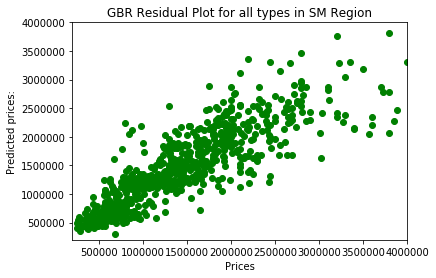

In [79]:
# Plot residual Plot of the GBR
plt.scatter(v_test, v_pred_gbr, c = 'green')
plt.ylim([200000, 4000000])
plt.xlim([200000, 4000000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot for all types in SM Region")

# Modeling & Prediction of prices for each type in SM Region

## Modeling & Prediction of price for type = house in SM Region

In [80]:
# linear regression between price & Rooms
df_S_M_h = df_S_M[(df_S_M['Type']=='h')] # create dataframe
lm1 = LinearRegression() # create linear regression object
u1 = df_S_M_h[['Rooms']]
v1 = df_S_M_h[['Price']]
lm1.fit(u1,v1) # fit the model using Year
vhat1 = lm1.predict(u1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(u1, v1))
print("Mean Square Error is %.2f" % mean_squared_error(vhat1, v1))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat1, v1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat1, v1)))
print("Predicted price for 2 bedroom house is %.1f" % lm1.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[466592.94053803]]
The intercept is:  [264081.84181556]
The R-square is 0.26
Mean Square Error is 537600388433.75
Mean absolute Error is 513922.68
Root Mean Squared Error is 733212.38
Predicted price for 2 bedroom house is 1197267.7


In [81]:
# linear regression between price & year
u1 = df_S_M_h[['Year']]
v1 = df_S_M_h[['Price']]
lm1.fit(u1,v1) # fit the model using Year
vhat1 = lm1.predict(u1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(u1, v1))
print("Mean Square Error is %.2f" % mean_squared_error(vhat1, v1))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat1, v1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat1, v1)))
print("Predicted price for 2019 is %.1f" % lm1.predict([[2019]])) # predict the price 

The coefficient is:  [[116720.67512491]]
The intercept is:  [-2.33488883e+08]
The R-square is 0.01
Mean Square Error is 719931071637.28
Mean absolute Error is 610849.31
Root Mean Squared Error is 848487.52
Predicted price for 2019 is 2170160.5


In [82]:
# linear regression between price & Distance
u1 = df_S_M_h[['Distance']]
lm1.fit(u1,v1) # fit the model using Year
vhat1 = lm1.predict(u1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(u1, v1))
print("Mean Square Error is %.2f" % mean_squared_error(vhat1, v1))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat1, v1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat1, v1)))
print("Predicted price of house within 20 km from CBD is %.1f" % lm1.predict([[20]])) # predict the price

The coefficient is:  [[-57682.02584247]]
The intercept is:  [2428137.18205161]
The R-square is 0.06
Mean Square Error is 679546560666.57
Mean absolute Error is 589097.92
Root Mean Squared Error is 824346.14
Predicted price of house within 20 km from CBD is 1274496.7


In [83]:
# linear regression between price & bathroom
u1 = df_S_M_h[['Bathroom']]
lm1.fit(u1,v1) # fit the model using Year
vhat1 = lm1.predict(u1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(u1, v1))
print("Mean Square Error is %.2f" % mean_squared_error(vhat1, v1))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat1, v1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat1, v1)))
print("Predicted price of house with 2 bathrooms is %.1f" % lm1.predict([[2]])) # predict the price

The coefficient is:  [[556780.64504081]]
The intercept is:  [816950.34295091]
The R-square is 0.30
Mean Square Error is 510254211299.61
Mean absolute Error is 505210.30
Root Mean Squared Error is 714320.80
Predicted price of house with 2 bathrooms is 1930511.6


In [84]:
# Multiple linear regression for type=house in SM Region
w1 = df_S_M_h[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm1 = LinearRegression() # create Multiple linear regression object
v1 = df_S_M_h[['Price']]
lm1.fit(w1,v1)
vhat1 = lm1.predict(w1)
# Model Evaluation
print('The coefficients are: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(w1, v1))
print('Mean Square Error is', mean_squared_error(v1, vhat1))
print('Mean absolute Error is', mean_absolute_error(v1, vhat1))
print('Root Mean Squared Error is', sqrt(mean_squared_error(v1, vhat1)))
print("Predicted price of house is %.1f" % lm1.predict([[2,20,2,2019,2005,1,200]])) 
# predict the house price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Lansize=200 

The coefficients are:  [[ 2.49084383e+05 -7.34556424e+04  3.44722473e+05  6.07645798e+04
  -2.75456185e+03  1.29717897e+05  2.41656652e+02]]
The intercept is:  [-1.16524782e+08]
The R-square is 0.48
Mean Square Error is 375979952520.8332
Mean absolute Error is 422645.49550512776
Root Mean Squared Error is 613172.0415355165
Predicted price of house is 532558.5


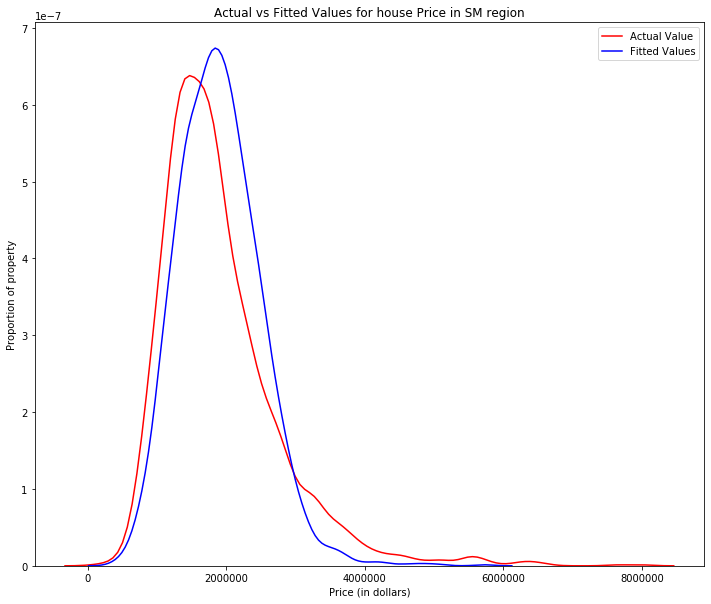

In [85]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_S_M_h['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(vhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for house Price in SM region')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement

In [86]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
w_pr1=pr.fit_transform(w1) # transform
print('original data is of:', w1.shape)
print('after transformation:', w_pr1.shape)
Input1=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input1) # input the list as an argument to the pipeline constructor

pipe.fit(w1,v1) # normalize the data, perform a transform and fit the model simultaneously.
vpipe1=pipe.predict(w1)
print("The R-square is %0.2f"% pipe.score(w1,v1))
print("Mean Square Error is %0.2f"% mean_squared_error(v1, vpipe1))
print("Mean absolute Error is %0.2f"% mean_absolute_error(v1, vpipe1))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(v1, vpipe1)))
print("Average Predicted price is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]]))

original data is of: (2254, 7)
after transformation: (2254, 36)
The R-square is 0.61
Mean Square Error is 285795475069.89
Mean absolute Error is 371753.39
Root Mean Squared Error is 534598.42
Average Predicted price is 870663.5


In [87]:
# Ridge regression for all properties in SM region
pr=PolynomialFeatures(degree=2)
w_train1, w_test1, v_train1, v_test1 = train_test_split(w1, v1, test_size=0.2, random_state=0) # train test split (20%/80%)
w_train_pr1=pr.fit_transform(w_train1) # fit the train data
w_test_pr1=pr.fit_transform(w_test1) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(w_train_pr1, v_train1) # fit the model
vhat1 = RigeModel.predict(w_test_pr1) # predict the value
print('predicted:', vhat1[0:2])
print('test set :', v_test1[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(w_test_pr1, v_test1))
print("Mean Square Error is %0.2f"% mean_squared_error(v_test1, vhat1))
print("Mean absolute Error is %0.2f"% mean_absolute_error(v_test1, vhat1))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(v_test1, vhat1)))

predicted: [[1504353.38265669]
 [ 991471.83582163]]
test set : [[1210000.]
 [ 877000.]]
The R-square is 0.61
Mean Square Error is 301722201767.98
Mean absolute Error is 388576.08
Root Mean Squared Error is 549292.46


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.14427e-18): result may not be accurate.
  overwrite_a=True).T


In [88]:
#Initialise Lasso Regression model
lcv = LassoCV()
w_train1, w_test1, v_train1, v_test1 = train_test_split(w1, v1, test_size=0.2, random_state=3) # train test split
lcv.fit(w_train1, v_train1)
# Make Prediction
v_pred1 = lcv.predict(w_test1)

# Return Results
print("The R-square is %0.2f"% lcv.score(w_test1, v_test1))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(v_test1,v_pred1))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(v_test1,v_pred1))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(v_test1,v_pred1)))
se_lcv = stats.sem(v_pred1)

The R-square is 0.48
Lasso Regression MAE: 386729.9
Lasso Regression MSE:268187111505.4
Lasso Regression RMSE:517867.9


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
# PCA for all type in SM Region
scaler = MinMaxScaler() # Apply MinMaxScaler
w_scalar1 = scaler.fit_transform(w1)
pca = PCA()
pca.fit(w_scalar1) # fit the PCA
w_scalar1 = pca.transform(w_scalar1)

# Split the training data and test data
w_train1, w_test1, v_train1, v_test1 = train_test_split(w_scalar1 , v1 , test_size = 0.2 , random_state = 0)

max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(w_train1, v_train1)
    
    # Make prediction
    v_pred1 = gbr.predict(w_test1)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(v_test1,v_pred1))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(v_test1,v_pred1))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(v_test1,v_pred1))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(v_test1,v_pred1)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(v_test1,v_pred1) > max_r2:
        max_r2 = metrics.explained_variance_score(v_test1,v_pred1)
        max_i = i
        v_pred_gbr1 = v_pred1
        
        # Store Standard Error
        se_gbr1 = stats.sem(v_pred_gbr1)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.61
Gradient Boosting Regression MAE: 375146.1
Gradient Boosting MSE:302653892665.8
Gradient Boosting RMSE:550139.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.59
Gradient Boosting Regression MAE: 384226.5
Gradient Boosting MSE:317340387363.1
Gradient Boosting RMSE:563329.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.61
Gradient Boosting Regression MAE: 378076.6
Gradient Boosting MSE:303143942568.4
Gradient Boosting RMSE:550585.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 392840.2
Gradient Boosting MSE:336372846626.0
Gradient Boosting RMSE:579976.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 387540.8
Gradient Boosting MSE:329764130494.4
Gradient Boosting RMSE:574250.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 397773.3
Gradient Boosting MSE:332402295863.9
Gradient Boosting RMSE:576543.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 399883.4
Gradient Boosting MSE:332437261797.1
Gradient Boosting RMSE:576573.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.55
Gradient Boosting Regression MAE: 407393.4
Gradient Boosting MSE:351178665402.5
Gradient Boosting RMSE:592603.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 403992.7
Gradient Boosting MSE:336582504412.5
Gradient Boosting RMSE:580157.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.50
Gradient Boosting Regression MAE: 421473.5
Gradient Boosting MSE:387019702845.0
Gradient Boosting RMSE:622109.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.50
Gradient Boosting Regression MAE: 425152.1
Gradient Boosting MSE:390284678786.9
Gradient Boosting RMSE:624727.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.47
Gradient Boosting Regression MAE: 447018.2
Gradient Boosting MSE:415177041150.1
Gradient Boosting RMSE:644342.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.48
Gradient Boosting Regression MAE: 428258.7
Gradient Boosting MSE:405719890521.9
Gradient Boosting RMSE:636961.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.44
Gradient Boosting Regression MAE: 444050.5
Gradient Boosting MSE:433776407773.4
Gradient Boosting RMSE:658617.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.33
Gradient Boosting Regression MAE: 479127.1
Gradient Boosting MSE:521963749272.3
Gradient Boosting RMSE:722470.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.46
Gradient Boosting Regression MAE: 449226.7
Gradient Boosting MSE:415064235166.8
Gradient Boosting RMSE:644254.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.28
Gradient Boosting Regression MAE: 496990.8
Gradient Boosting MSE:564099590998.2
Gradient Boosting RMSE:751065.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.37
Gradient Boosting Regression MAE: 475456.0
Gradient Boosting MSE:490885902143.9
Gradient Boosting RMSE:700632.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.29
Gradient Boosting Regression MAE: 509048.6
Gradient Boosting MSE:552307236529.7
Gradient Boosting RMSE:743173.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.17
Gradient Boosting Regression MAE: 510266.9
Gradient Boosting MSE:640853819523.9
Gradient Boosting RMSE:800533.5
---------------------------------
Max R^2 is: 0.61 with learning rate: 0.10


Text(0.5, 1.0, 'GBR Residual Plot for house in SM Region')

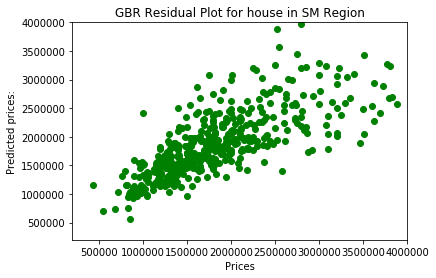

In [90]:
# Plot residual Plot of the GBR
plt.scatter(v_test1, v_pred_gbr1, c = 'green')
plt.ylim([200000, 4000000])
plt.xlim([200000, 4000000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot for house in SM Region")

## Modeling & prediction of type = unit in SM Region

In [91]:
# linear regression between price & Rooms
df_S_M_u = df_S_M[(df_S_M['Type']=='u')] # create dataframe
lm2 = LinearRegression() # create linear regression object
u2 = df_S_M_u[['Rooms']]
v2 = df_S_M_u[['Price']]
lm2.fit(u2,v2) # fit the model using Year
vhat2 = lm2.predict(u2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(u2, v2))
print("Mean Square Error is %.2f" % mean_squared_error(vhat2, v2))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat2, v2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat2, v2)))
print("Predicted price for 2 bedroom unit is %.1f" % lm2.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[279827.65149106]]
The intercept is:  [116989.01800525]
The R-square is 0.36
Mean Square Error is 47415707018.22
Mean absolute Error is 141024.57
Root Mean Squared Error is 217751.48
Predicted price for 2 bedroom unit is 676644.3


In [92]:
# linear regression between price & Year
u2 = df_S_M_u[['Year']]
lm2.fit(u2,v2) # fit the model using Year
vhat2 = lm2.predict(u2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(u2, v2))
print("Mean Square Error is %.2f" % mean_squared_error(vhat2, v2))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat2, v2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat2, v2)))
print("Predicted price for unit in year 2019 is %.1f" % lm2.predict([[2019]])) # predict the price 

The coefficient is:  [[40199.22035582]]
The intercept is:  [-80405424.2184938]
The R-square is 0.01
Mean Square Error is 74135309306.54
Mean absolute Error is 189352.93
Root Mean Squared Error is 272278.00
Predicted price for unit in year 2019 is 756801.7


In [93]:
# linear regression between price & Distance
u2 = df_S_M_u[['Distance']]
lm2.fit(u2,v2) # fit the model using Year
vhat2 = lm2.predict(u2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(u2, v2))
print("Mean Square Error is %.2f" % mean_squared_error(vhat2, v2))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat2, v2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat2, v2)))
print("Predicted price of house within 20 km from CBD is %.1f" % lm2.predict([[20]])) # predict the price

The coefficient is:  [[423.83475189]]
The intercept is:  [652921.3205724]
The R-square is 0.00
Mean Square Error is 74548307074.48
Mean absolute Error is 190323.61
Root Mean Squared Error is 273035.36
Predicted price of house within 20 km from CBD is 661398.0


In [94]:
# linear regression between price & Distance
u2 = df_S_M_u[['Bathroom']]
lm2.fit(u2,v2) # fit the model using Year
vhat2 = lm2.predict(u2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(u2, v2))
print("Mean Square Error is %.2f" % mean_squared_error(vhat2, v2))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat2, v2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat2, v2)))
print("Predicted price of unit with 2 bathrooms is %.1f" % lm2.predict([[2]])) # predict the price

The coefficient is:  [[333537.6507782]]
The intercept is:  [257760.53493065]
The R-square is 0.25
Mean Square Error is 55961999123.22
Mean absolute Error is 167457.18
Root Mean Squared Error is 236562.89
Predicted price of unit with 2 bathrooms is 924835.8


In [95]:
# Multiple linear regression for type=unit in SM Region
w2 = df_S_M_u[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm2 = LinearRegression() # create Multiple linear regression object
v2 = df_S_M_u[['Price']]
lm2.fit(w2,v2)
vhat2 = lm2.predict(w2)
# Model Evaluation
print('The coefficients are: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(w2, v2))
print('Mean Square Error is', mean_squared_error(v2, vhat2))
print('Mean absolute Error is', mean_absolute_error(v2, vhat2))
print('Root Mean Squared Error is', sqrt(mean_squared_error(v2, vhat2)))
print("Predicted price of unit is %.1f" % lm2.predict([[2,20,2,2019,2005,1,200]])) 
# predict the unit price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Lansize=200 

The coefficients are:  [[ 2.04603482e+05 -6.91632375e+03  1.89695495e+05  3.60337074e+04
  -1.38772377e+03  1.08346748e+05  6.36985044e+00]]
The intercept is:  [-69958788.62145142]
The R-square is 0.49
Mean Square Error is 38024184044.946884
Mean absolute Error is 129300.12411474997
Root Mean Squared Error is 194997.90779633223
Predicted price of unit is 770772.6


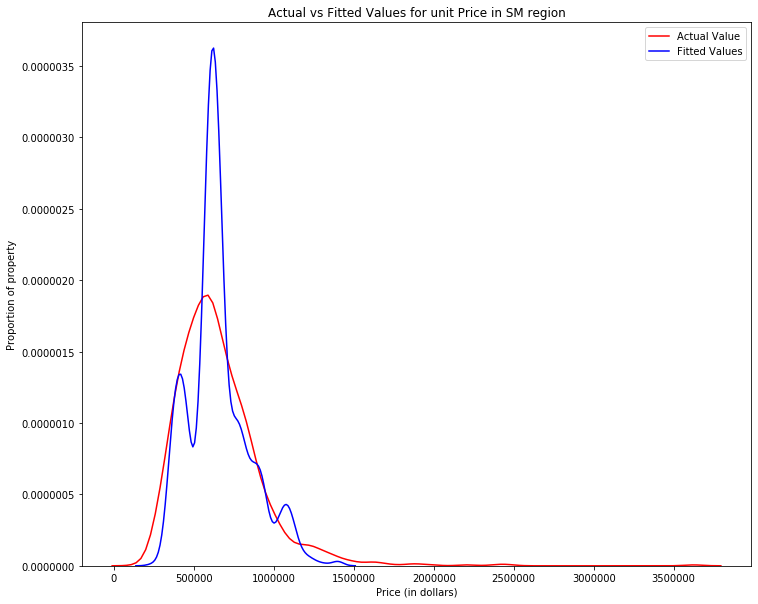

In [96]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_S_M_u['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(vhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for unit Price in SM region')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are not reasonably close to the actual values, since the two distributions do not overlap. However, there is definitely some room for improvement

In [97]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
w_pr2=pr.fit_transform(w2) # transform
print('original data is of:', w2.shape)
print('after transformation:', w_pr2.shape)
Input2=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input2) # input the list as an argument to the pipeline constructor

pipe.fit(w2,v2) # normalize the data, perform a transform and fit the model simultaneously.
vpipe2=pipe.predict(w2)
print("The R-square is %0.2f"% pipe.score(w2,v2))
print("Mean Square Error is %0.2f"% mean_squared_error(v2, vpipe2))
print("Mean absolute Error is %0.2f"% mean_absolute_error(v2, vpipe2))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(v2, vpipe2)))
print("Average Predicted price is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]]))

original data is of: (1128, 7)
after transformation: (1128, 36)
The R-square is 0.53
Mean Square Error is 34770152211.32
Mean absolute Error is 123672.34
Root Mean Squared Error is 186467.56
Average Predicted price is 925145.1


In [98]:
# Ridge regression for type = unit in SM region
pr=PolynomialFeatures(degree=2)
w_train2, w_test2, v_train2, v_test2 = train_test_split(w2, v2, test_size=0.2, random_state=0) # train test split (20%/80%)
w_train_pr2=pr.fit_transform(w_train2) # fit the train data
w_test_pr2=pr.fit_transform(w_test2) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(w_train_pr2, v_train2) # fit the model
vhat2 = RigeModel.predict(w_test_pr2) # predict the value
print('predicted:', vhat2[0:2])
print('test set :', v_test2[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(w_test_pr2, v_test2))
print("Mean Square Error is %0.2f"% mean_squared_error(v_test2, vhat2))
print("Mean absolute Error is %0.2f"% mean_absolute_error(v_test2, vhat2))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(v_test2, vhat2)))

predicted: [[1006817.69298661]
 [1000813.38956261]]
test set : [[957000.]
 [850000.]]
The R-square is 0.64
Mean Square Error is 29548692918.67
Mean absolute Error is 128885.37
Root Mean Squared Error is 171897.33


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.05715e-19): result may not be accurate.
  overwrite_a=True).T


In [99]:
#Initialise Lasso Regression model
lcv = LassoCV()
w_train2, w_test2, v_train2, v_test2 = train_test_split(w2, v2, test_size=0.2, random_state=1) # train test split
lcv.fit(w_train2, v_train2)
# Make Prediction
v_pred2 = lcv.predict(w_test2)

# Return Results
print("The R-square is %0.2f"% lcv.score(w_test2, v_test2))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(v_test2,v_pred2))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(v_test2,v_pred2))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(v_test2,v_pred2)))
se_lcv = stats.sem(v_pred2)

The R-square is 0.38
Lasso Regression MAE: 140583.7
Lasso Regression MSE:49182444796.8
Lasso Regression RMSE:221771.2


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
# PCA for all type in SM Region
scaler = MinMaxScaler() # Apply MinMaxScaler
w_scalar2 = scaler.fit_transform(w2)
pca = PCA()
pca.fit(w_scalar2) # fit the PCA
w_scalar2 = pca.transform(w_scalar2)

# Split the training data and test data
w_train2, w_test2, v_train2, v_test2 = train_test_split(w_scalar2 , v2 , test_size = 0.2 , random_state = 0)

max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(w_train2, v_train2)
    
    # Make prediction
    v_pred2 = gbr.predict(w_test2)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(v_test2,v_pred2))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(v_test2,v_pred2))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(v_test2,v_pred2))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(v_test2,v_pred2)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(v_test2,v_pred2) > max_r2:
        max_r2 = metrics.explained_variance_score(v_test2,v_pred2)
        max_i = i
        v_pred_gbr2 = v_pred2
        
        # Store Standard Error
        se_gbr2 = stats.sem(v_pred_gbr2)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.64
Gradient Boosting Regression MAE: 129415.2
Gradient Boosting MSE:29355548099.6
Gradient Boosting RMSE:171334.6
---------------------------------
For learning rate i: 0.1
Gradient Boosting R^2: 0.65
Gradient Boosting Regression MAE: 126264.3
Gradient Boosting MSE:28613500150.9
Gradient Boosting RMSE:169155.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.64
Gradient Boosting Regression MAE: 129928.5
Gradient Boosting MSE:29675693021.9
Gradient Boosting RMSE:172266.3
---------------------------------
For learning rate i: 0.2
Gradient Boosting R^2: 0.60
Gradient Boosting Regression MAE: 134037.9
Gradient Boosting MSE:32578368846.8
Gradient Boosting RMSE:180494.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.58
Gradient Boosting Regression MAE: 136601.5
Gradient Boosting MSE:34226743925.0
Gradient Boosting RMSE:185004.7
---------------------------------
For learning rate i: 0.3
Gradient Boosting R^2: 0.58
Gradient Boosting Regression MAE: 136353.2
Gradient Boosting MSE:34387162141.7
Gradient Boosting RMSE:185437.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 136557.9
Gradient Boosting MSE:34826097572.4
Gradient Boosting RMSE:186617.5
---------------------------------
For learning rate i: 0.4
Gradient Boosting R^2: 0.63
Gradient Boosting Regression MAE: 128263.9
Gradient Boosting MSE:30319434085.6
Gradient Boosting RMSE:174124.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.58
Gradient Boosting Regression MAE: 137426.0
Gradient Boosting MSE:33881811962.9
Gradient Boosting RMSE:184070.1
---------------------------------
For learning rate i: 0.5
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 140743.5
Gradient Boosting MSE:35134754937.2
Gradient Boosting RMSE:187442.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 140432.3
Gradient Boosting MSE:34850459128.3
Gradient Boosting RMSE:186682.8
---------------------------------
For learning rate i: 0.6
Gradient Boosting R^2: 0.54
Gradient Boosting Regression MAE: 144603.3
Gradient Boosting MSE:37817289441.0
Gradient Boosting RMSE:194466.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.54
Gradient Boosting Regression MAE: 137646.0
Gradient Boosting MSE:37065485886.6
Gradient Boosting RMSE:192524.0
---------------------------------
For learning rate i: 0.7
Gradient Boosting R^2: 0.56
Gradient Boosting Regression MAE: 135893.2
Gradient Boosting MSE:35615454847.3
Gradient Boosting RMSE:188720.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.53
Gradient Boosting Regression MAE: 140396.4
Gradient Boosting MSE:38089967081.4
Gradient Boosting RMSE:195166.5
---------------------------------
For learning rate i: 0.8
Gradient Boosting R^2: 0.47
Gradient Boosting Regression MAE: 153517.7
Gradient Boosting MSE:43387709489.1
Gradient Boosting RMSE:208297.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.31
Gradient Boosting Regression MAE: 158636.8
Gradient Boosting MSE:56479400940.5
Gradient Boosting RMSE:237654.0
---------------------------------
For learning rate i: 0.9
Gradient Boosting R^2: 0.55
Gradient Boosting Regression MAE: 143612.8
Gradient Boosting MSE:37058152996.7
Gradient Boosting RMSE:192504.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.35
Gradient Boosting Regression MAE: 160839.1
Gradient Boosting MSE:52571704664.3
Gradient Boosting RMSE:229285.2
---------------------------------
For learning rate i: 1.0
Gradient Boosting R^2: 0.41
Gradient Boosting Regression MAE: 158944.1
Gradient Boosting MSE:47803643006.8
Gradient Boosting RMSE:218640.4
---------------------------------
Max R^2 is: 0.65 with learning rate: 0.15


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'GBR Residual Plot for unit in SM Region')

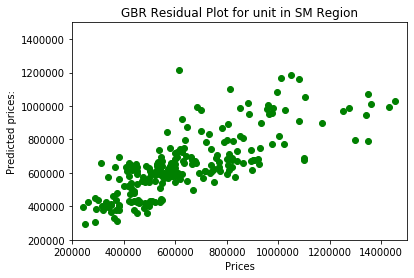

In [101]:
# Plot residual Plot of the GBR
plt.scatter(v_test2, v_pred_gbr2, c = 'green')
plt.ylim([200000, 1500000])
plt.xlim([200000, 1500000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot for unit in SM Region")

## Modeling & Prediction of prices for Type = Townhouse in SM Region

In [102]:
# linear regression between price & Rooms
df_S_M_t = df_S_M[(df_S_M['Type']=='t')] # create dataframe
lm3 = LinearRegression() # create linear regression object
u3 = df_S_M_t[['Rooms']]
v3 = df_S_M_t[['Price']]
lm3.fit(u3,v3) # fit the model using Year
vhat3 = lm3.predict(u3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(u3, v3))
print("Mean Square Error is %.2f" % mean_squared_error(vhat3, v3))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat3, v3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat3, v3)))
print("Predicted price for 2 bedroom townhouse is %.1f" % lm3.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[278633.11435733]]
The intercept is:  [344473.11781485]
The R-square is 0.18
Mean Square Error is 161281957936.86
Mean absolute Error is 283960.58
Root Mean Squared Error is 401599.25
Predicted price for 2 bedroom townhouse is 901739.3


In [103]:
# linear regression between price & Year
u3 = df_S_M_t[['Year']]
lm3.fit(u3,v3) # fit the model using Year
vhat3 = lm3.predict(u3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(u3, v3))
print("Mean Square Error is %.2f" % mean_squared_error(vhat3, v3))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat3, v3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat3, v3)))
print("Predicted price for townhouse in year 2019 is %.1f" % lm3.predict([[2019]])) # predict the price 

The coefficient is:  [[107804.77657276]]
The intercept is:  [-2.16201196e+08]
The R-square is 0.02
Mean Square Error is 192082865231.60
Mean absolute Error is 310288.24
Root Mean Squared Error is 438272.59
Predicted price for townhouse in year 2019 is 1456648.2


In [104]:
# linear regression between price & Year
u3 = df_S_M_t[['Distance']]
lm3.fit(u3,v3) # fit the model using Year
vhat3 = lm3.predict(u3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(u3, v3))
print("Mean Square Error is %.2f" % mean_squared_error(vhat3, v3))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat3, v3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat3, v3)))
print("Predicted price of townhouse within 20 km from CBD is %.1f" % lm3.predict([[20]])) # predict the price 

The coefficient is:  [[-30616.60088065]]
The intercept is:  [1537596.80027375]
The R-square is 0.06
Mean Square Error is 185158171394.87
Mean absolute Error is 300037.15
Root Mean Squared Error is 430300.09
Predicted price of townhouse within 20 km from CBD is 925264.8


In [105]:
# linear regression between price & Bathroom
u3 = df_S_M_t[['Bathroom']]
lm3.fit(u3,v3) # fit the model using Year
vhat3 = lm3.predict(u3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(u3, v3))
print("Mean Square Error is %.2f" % mean_squared_error(vhat3, v3))
print("Mean absolute Error is %.2f" % mean_absolute_error(vhat3, v3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(vhat3, v3)))
print("Predicted price of townhouse with 2 bathrooms is %.1f" % lm3.predict([[2]])) # predict the price

The coefficient is:  [[298145.34383338]]
The intercept is:  [604659.97504088]
The R-square is 0.16
Mean Square Error is 164087711584.00
Mean absolute Error is 287498.04
Root Mean Squared Error is 405077.41
Predicted price of townhouse with 2 bathrooms is 1200950.7


In [106]:
# Multiple linear regression for type=townhouse in SM Region
w3 = df_S_M_t[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm3 = LinearRegression() # create Multiple linear regression object
v3 = df_S_M_t[['Price']]
lm3.fit(w3,v3)
vhat3 = lm3.predict(w3)
# Model Evaluation
print('The coefficients are: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(w3, v3))
print('Mean Square Error is', mean_squared_error(v3, vhat3))
print('Mean absolute Error is', mean_absolute_error(v3, vhat3))
print('Root Mean Squared Error is', sqrt(mean_squared_error(v3, vhat3)))
print("Predicted price of unit is %.1f" % lm3.predict([[2,20,2,2019,2005,1,200]])) 
# predict the townhouse price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Landsize=200 

The coefficients are:  [[ 1.51065566e+05 -4.05901987e+04  1.53643876e+05  7.25511742e+04
  -4.18230844e+02  1.87780832e+05  1.09732839e+02]]
The intercept is:  [-1.44977229e+08]
The R-square is 0.37
Mean Square Error is 122900266271.4126
Mean absolute Error is 238117.89054388797
Root Mean Squared Error is 350571.34262716427
Predicted price of unit is 672380.8


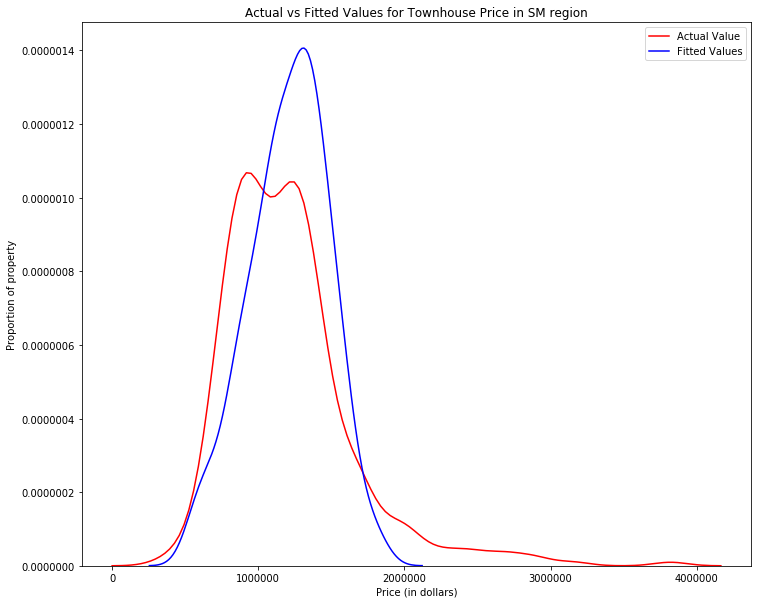

In [107]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_S_M_t['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(vhat3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Townhouse Price in SM region')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are not reasonably close to the actual values, since the two distributions do not overlap. However, there is definitely some room for improvement

In [108]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
w_pr3=pr.fit_transform(w3) # transform
print('original data is of:', w3.shape)
print('after transformation:', w_pr3.shape)
Input3=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input3) # input the list as an argument to the pipeline constructor

pipe.fit(w3,v3) # normalize the data, perform a transform and fit the model simultaneously.
vpipe3=pipe.predict(w3)
print("The R-square is %0.2f"% pipe.score(w3,v3))
print("Mean Square Error is %0.2f"% mean_squared_error(v3, vpipe3))
print("Mean absolute Error is %0.2f"% mean_absolute_error(v3, vpipe3))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(v3, vpipe3)))
print("Average Predicted price is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]]))

original data is of: (358, 7)
after transformation: (358, 36)
The R-square is 0.48
Mean Square Error is 102749798014.62
Mean absolute Error is 217177.14
Root Mean Squared Error is 320546.09
Average Predicted price is 681997.1


In [109]:
# Ridge regression for type = unit in SM region
pr=PolynomialFeatures(degree=2)
w_train3, w_test3, v_train3, v_test3 = train_test_split(w3, v3, test_size=0.2, random_state=1) # train test split (20%/80%)
w_train_pr3=pr.fit_transform(w_train3) # fit the train data
w_test_pr3=pr.fit_transform(w_test3) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(w_train_pr3, v_train3) # fit the model
vhat3 = RigeModel.predict(w_test_pr3) # predict the value
print('predicted:', vhat3[0:2])
print('test set :', v_test3[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(w_test_pr3, v_test3))
print("Mean Square Error is %0.2f"% mean_squared_error(v_test3, vhat3))
print("Mean absolute Error is %0.2f"% mean_absolute_error(v_test3, vhat3))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(v_test3, vhat3)))

predicted: [[1326961.24949223]
 [1232511.80111259]]
test set : [[1225000.]
 [1721000.]]
The R-square is 0.44
Mean Square Error is 128728100104.47
Mean absolute Error is 248795.48
Root Mean Squared Error is 358786.98


In [110]:
#Initialise Lasso Regression model
lcv = LassoCV()
w_train3, w_test3, v_train3, v_test3 = train_test_split(w3, v3, test_size=0.2, random_state=1) # train test split
lcv.fit(w_train3, v_train3)
# Make Prediction
v_pred3 = lcv.predict(w_test3)

# Return Results
print("The R-square is %0.2f"% lcv.score(w_test3, v_test3))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(v_test3,v_pred3))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(v_test3,v_pred3))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(v_test3,v_pred3)))
se_lcv = stats.sem(v_pred3)

The R-square is 0.35
Lasso Regression MAE: 268272.0
Lasso Regression MSE:150724372422.4
Lasso Regression RMSE:388232.4


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
# PCA for type = townhouse in SM Region
scaler = MinMaxScaler() # Apply MinMaxScaler
w_scalar3 = scaler.fit_transform(w3)
pca = PCA()
pca.fit(w_scalar3) # fit the PCA
w_scalar3 = pca.transform(w_scalar3)

# Split the training data and test data
w_train3, w_test3, v_train3, v_test3 = train_test_split(w_scalar3 , v3 , test_size = 0.2 , random_state = 1)

max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(w_train3, v_train3)
    
    # Make prediction
    v_pred3 = gbr.predict(w_test3)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(v_test3,v_pred3))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(v_test3,v_pred3))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(v_test3,v_pred3))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(v_test3,v_pred3)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(v_test3,v_pred3) > max_r2:
        max_r2 = metrics.explained_variance_score(v_test3,v_pred3)
        max_i = i
        v_pred_gbr3 = v_pred3
        
        # Store Standard Error
        se_gbr3 = stats.sem(v_pred_gbr3)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.53
Gradient Boosting Regression MAE: 242783.8
Gradient Boosting MSE:107229368523.6
Gradient Boosting RMSE:327459.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.55
Gradient Boosting Regression MAE: 235177.7
Gradient Boosting MSE:104088137219.4
Gradient Boosting RMSE:322626.9
---------------------------------
For learning rate i: 0.2
Gradient Boosting R^2: 0.52
Gradient Boosting Regression MAE: 242645.4
Gradient Boosting MSE:110055125936.2
Gradient Boosting RMSE:331745.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.46
Gradient Boosting Regression MAE: 252298.5
Gradient Boosting MSE:125208568980.5
Gradient Boosting RMSE:353848.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.52
Gradient Boosting Regression MAE: 243699.6
Gradient Boosting MSE:112022983467.4
Gradient Boosting RMSE:334698.3
---------------------------------
For learning rate i: 0.3
Gradient Boosting R^2: 0.46
Gradient Boosting Regression MAE: 255999.0
Gradient Boosting MSE:123734481138.1
Gradient Boosting RMSE:351759.1
---------------------------------
For learning rate i: 0.4

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting R^2: 0.44
Gradient Boosting Regression MAE: 272790.3
Gradient Boosting MSE:129723963211.5
Gradient Boosting RMSE:360172.1
---------------------------------
For learning rate i: 0.4
Gradient Boosting R^2: 0.49
Gradient Boosting Regression MAE: 258139.2
Gradient Boosting MSE:116667281926.2
Gradient Boosting RMSE:341565.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.38
Gradient Boosting Regression MAE: 279420.1
Gradient Boosting MSE:142140538742.0
Gradient Boosting RMSE:377015.3
---------------------------------
For learning rate i: 0.5
Gradient Boosting R^2: 0.40
Gradient Boosting Regression MAE: 279977.2
Gradient Boosting MSE:139945361565.9
Gradient Boosting RMSE:374092.7
---------------------------------
For learning rate i: 0.6
Gradient Boosting R^2: 0.42
Gradient Boosting Regression MAE: 277422.0
Gradient Boosting MSE:133707941596.4
Gradient Boosting RMSE:365661.0
---------------------------------
For learning rate i: 0.6
Gradient Boosting R^2: 0.42
Gradient Boosting Regression MAE: 288637.7
Gradient Boosting MSE:132868134253.6
Gradient Boosting RMSE:364510.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

For learning rate i: 0.7
Gradient Boosting R^2: 0.49
Gradient Boosting Regression MAE: 249934.3
Gradient Boosting MSE:118464738217.8
Gradient Boosting RMSE:344187.1
---------------------------------
For learning rate i: 0.7
Gradient Boosting R^2: 0.33
Gradient Boosting Regression MAE: 286202.2
Gradient Boosting MSE:154893483237.5
Gradient Boosting RMSE:393565.1
---------------------------------
For learning rate i: 0.8
Gradient Boosting R^2: 0.14
Gradient Boosting Regression MAE: 310189.7
Gradient Boosting MSE:197647372823.5
Gradient Boosting RMSE:444575.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

For learning rate i: 0.8
Gradient Boosting R^2: 0.24
Gradient Boosting Regression MAE: 282317.6
Gradient Boosting MSE:175196883056.2
Gradient Boosting RMSE:418565.3
---------------------------------
For learning rate i: 0.9
Gradient Boosting R^2: 0.09
Gradient Boosting Regression MAE: 293604.4
Gradient Boosting MSE:210000276874.8
Gradient Boosting RMSE:458257.9
---------------------------------
For learning rate i: 0.9
Gradient Boosting R^2: 0.01
Gradient Boosting Regression MAE: 308241.7
Gradient Boosting MSE:227161881071.1
Gradient Boosting RMSE:476615.0
---------------------------------
For learning rate i: 1.0

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting R^2: 0.18
Gradient Boosting Regression MAE: 308093.8
Gradient Boosting MSE:188282689822.7
Gradient Boosting RMSE:433915.5
---------------------------------
For learning rate i: 1.0
Gradient Boosting R^2: -0.18
Gradient Boosting Regression MAE: 367293.1
Gradient Boosting MSE:271262430328.3
Gradient Boosting RMSE:520828.6
---------------------------------
Max R^2 is: 0.55 with learning rate: 0.15


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'GBR Residual Plot for Townhouse in SM Region')

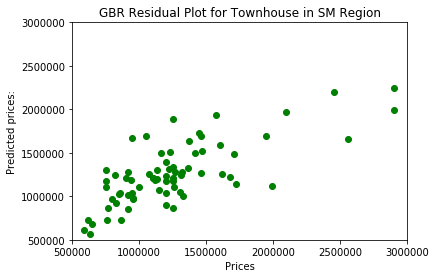

In [112]:
# Plot residual Plot of the GBR
plt.scatter(v_test3, v_pred_gbr3, c = 'green')
plt.ylim([500000, 3000000])
plt.xlim([500000, 3000000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot for Townhouse in SM Region")

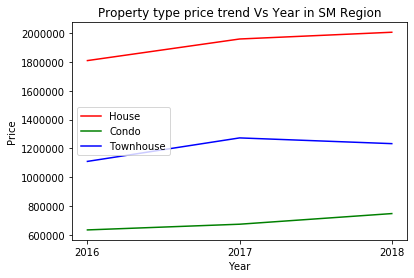

In [113]:
# plot of each type of property mean price vs year in Southern Metropolitan
#house, duplex and town house price groupby year and mean
df_S_M_h_year=df_S_M_h.groupby('Year').mean()
df_S_M_u_year=df_S_M_u.groupby('Year').mean()
df_S_M_t_year=df_S_M_t.groupby('Year').mean()

#sns.lmplot(x="Year", y="Price", hue="Type", data=df_S_M,  x_estimator=np.mean);
df_S_M_h_year['Price'].plot(kind='line', color='r',label='House')
df_S_M_u_year['Price'].plot(kind='line', color='g',label='Condo')
df_S_M_t_year['Price'].plot(kind='line', color='b',label='Townhouse')
year_xticks=[2016,2017,2018]
plt.ylabel('Price')
plt.xticks( year_xticks)
plt.title('Property type price trend Vs Year in SM Region')
plt.legend()

Graph suggests that House price increased by ~ $100,000/year, Condo price climbed up slowly while Townhouse price increased from 2016 to 2017 & then decreased from 2017 to 2018 in Southern Metropolitan region. It is time to built more condos & townhouses in 2019 due to minimal change in price over 3 year period. Furthermore, it can be concluded that sellers should be interested in selling Houses in coming years due to dramatic change in price.

# Modeling & Prediction of prices in Northern Metropolitan region

In [114]:
df_N_M=df[df['Reg_abv']=='N M'] # create dataframe for NM region
df_N_M.shape

(3524, 21)

In [115]:
# linear regression between price & Rooms
lm = LinearRegression() # create linear regression object
r = df_N_M[['Rooms']]
s = df_N_M[['Price']]
lm.fit(r,s) # fit the model using Year
shat = lm.predict(r)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(r, s))
print("Mean Square Error is %.2f" % mean_squared_error(shat, s))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat, s))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat, s)))
print("Predicted price for 2 bedroom in NM region is %.1f" % lm.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[171542.14514399]]
The intercept is:  [382628.68081951]
The R-square is 0.13
Mean Square Error is 170958727218.13
Mean absolute Error is 307566.22
Root Mean Squared Error is 413471.56
Predicted price for 2 bedroom in NM region is 725713.0


In [116]:
# linear regression between price & Year
r = df_N_M[['Year']]
lm.fit(r,s) # fit the model using Year
shat = lm.predict(r)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(r, s))
print("Mean Square Error is %.2f" % mean_squared_error(shat, s))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat, s))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat, s)))
print("Predicted price in year 2019 is %.1f" % lm.predict([[2019]])) # predict the price

The coefficient is:  [[-4634.77641211]]
The intercept is:  [10224181.05643033]
The R-square is 0.00
Mean Square Error is 195653734909.32
Mean absolute Error is 321918.96
Root Mean Squared Error is 442327.63
Predicted price in year 2019 is 866567.5


In [117]:
# linear regression between price & Distance
r = df_N_M[['Distance']]
lm.fit(r,s) # fit the model using Year
shat = lm.predict(r)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(r, s))
print("Mean Square Error is %.2f" % mean_squared_error(shat, s))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat, s))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat, s)))
print("Predicted price within 20 km from CBD is %.1f" % lm.predict([[20]])) # predict the price 

The coefficient is:  [[-29062.03410845]]
The intercept is:  [1152197.80924446]
The R-square is 0.16
Mean Square Error is 164049917545.90
Mean absolute Error is 280010.77
Root Mean Squared Error is 405030.76
Predicted price within 20 km from CBD is 570957.1


In [118]:
# linear regression between price & Bathroom
r = df_N_M[['Bathroom']]
lm.fit(r,s) # fit the model using Year
shat = lm.predict(r)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(r, s))
print("Mean Square Error is %.2f" % mean_squared_error(shat, s))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat, s))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat, s)))
print("Predicted price of all properties with 2 bathrooms is %.1f" % lm.predict([[2]])) # predict the price

The coefficient is:  [[185927.71325101]]
The intercept is:  [603450.3618672]
The R-square is 0.07
Mean Square Error is 182537448498.99
Mean absolute Error is 318820.02
Root Mean Squared Error is 427244.02
Predicted price of all properties with 2 bathrooms is 975305.8


In [119]:
# Multiple linear regression forall types in N M Region
t = df_N_M[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm = LinearRegression() # create Multiple linear regression object
s = df_N_M[['Price']]
lm.fit(t,s)
shat = lm.predict(t)
# Model Evaluation
print('The coefficients are: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(t, s))
print('Mean Square Error is', mean_squared_error(s, shat))
print('Mean absolute Error is', mean_absolute_error(s, shat))
print('Root Mean Squared Error is', sqrt(mean_squared_error(s, shat)))
print("Predicted price of property is %.1f" % lm.predict([[2,20,2,2019,2005,1,200]])) 
# predict  price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Landsize=200 

The coefficients are:  [[ 1.98899356e+05 -3.70787325e+04  1.50091297e+05  5.48403682e+04
  -4.09258464e+03  3.30493325e+04 -3.44830089e+00]]
The intercept is:  [-1.02174394e+08]
The R-square is 0.61
Mean Square Error is 77172020540.93872
Mean absolute Error is 191768.99595616973
Root Mean Squared Error is 277798.525087767
Predicted price of property is 331443.5


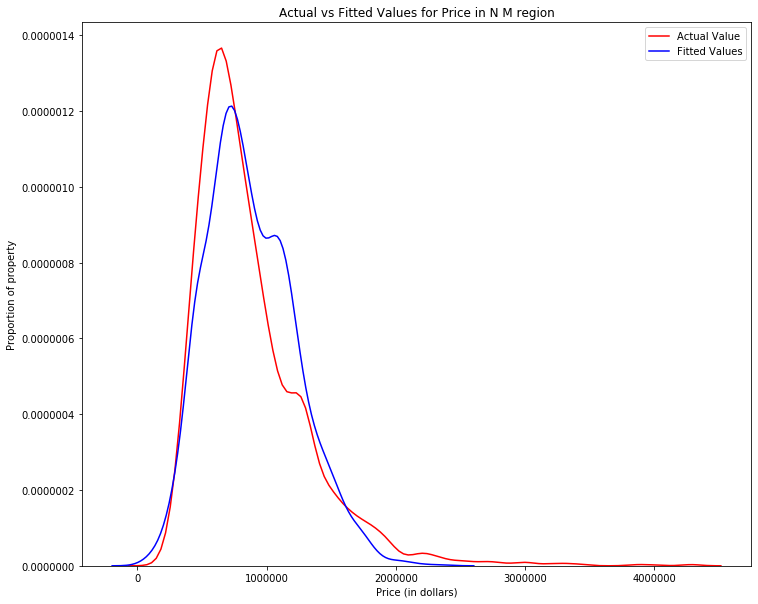

In [120]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df_N_M['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(shat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price in N M region')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions  overlap a bit. However, there is definitely some room for improvement

In [121]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
t_pr=pr.fit_transform(t) # transform
print('original data is of:', t.shape)
print('after transformation:', t_pr.shape)
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input) # input the list as an argument to the pipeline constructor

pipe.fit(t,s) # normalize the data, perform a transform and fit the model simultaneously.
spipe=pipe.predict(t)
print("The R-square is %0.2f"% pipe.score(t,s))
print("Mean Square Error is %0.2f"% mean_squared_error(s, spipe))
print("Mean absolute Error is %0.2f"% mean_absolute_error(s, spipe))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(s, spipe)))
print("Average Predicted price is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]]))

original data is of: (3524, 7)
after transformation: (3524, 36)
The R-square is 0.69
Mean Square Error is 60000750430.40
Mean absolute Error is 167021.37
Root Mean Squared Error is 244950.51
Average Predicted price is 492378.9


In [122]:
# Ridge regression for all types in N M region
pr=PolynomialFeatures(degree=2)
t_train, t_test, s_train, s_test = train_test_split(t, s, test_size=0.2, random_state=2) # train test split (20%/80%)
t_train_pr=pr.fit_transform(t_train) # fit the train data
t_test_pr=pr.fit_transform(t_test) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(t_train_pr, s_train) # fit the model
shat = RigeModel.predict(t_test_pr) # predict the value
print('predicted:', shat[0:2])
print('test set :', s_test[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(t_test_pr, s_test))
print("Mean Square Error is %0.2f"% mean_squared_error(s_test, shat))
print("Mean absolute Error is %0.2f"% mean_absolute_error(s_test, shat))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(s_test, shat)))

predicted: [[630494.76129377]
 [742053.0063014 ]]
test set : [[537000.]
 [565000.]]
The R-square is 0.70
Mean Square Error is 45109935204.37
Mean absolute Error is 151614.75
Root Mean Squared Error is 212391.00


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.87588e-19): result may not be accurate.
  overwrite_a=True).T


In [123]:
#Initialise Lasso Regression model
lcv = LassoCV()
t_train, t_test, s_train, s_test = train_test_split(t, s, test_size=0.2, random_state=1) # train test split
lcv.fit(t_train, s_train)
# Make Prediction
s_pred = lcv.predict(t_test)

# Return Results
print("The R-square is %0.2f"% lcv.score(t_test, s_test))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(s_test,s_pred))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(s_test,s_pred))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(s_test,s_pred)))
se_lcv = stats.sem(s_pred)

The R-square is 0.61
Lasso Regression MAE: 195388.8
Lasso Regression MSE:72658048279.7
Lasso Regression RMSE:269551.6


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
# PCA for all types in N M Region
scaler = MinMaxScaler() # Apply MinMaxScaler
t_scalar = scaler.fit_transform(t)
pca = PCA()
pca.fit(t_scalar) # fit the PCA
t_scalar = pca.transform(t_scalar)

# Split the training data and test data
t_train, t_test, s_train, s_test = train_test_split(t_scalar, s, test_size=0.2, random_state=2) # train test split
max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(t_train, s_train)
    
    # Make prediction
    s_pred = gbr.predict(t_test)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(s_test,s_pred))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(s_test,s_pred))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(s_test,s_pred))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(s_test,s_pred)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(s_test,s_pred) > max_r2:
        max_r2 = metrics.explained_variance_score(s_test,s_pred)
        max_i = i
        s_pred_gbr = s_pred
        
        # Store Standard Error
        se_gbr = stats.sem(s_pred_gbr)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.72
Gradient Boosting Regression MAE: 141941.8
Gradient Boosting MSE:42011162091.9
Gradient Boosting RMSE:204966.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.72
Gradient Boosting Regression MAE: 141746.6
Gradient Boosting MSE:42120683348.8
Gradient Boosting RMSE:205233.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.72
Gradient Boosting Regression MAE: 141009.2
Gradient Boosting MSE:41343550477.5
Gradient Boosting RMSE:203331.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.70
Gradient Boosting Regression MAE: 144363.0
Gradient Boosting MSE:45137262478.6
Gradient Boosting RMSE:212455.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.71
Gradient Boosting Regression MAE: 141759.6
Gradient Boosting MSE:43845962866.1
Gradient Boosting RMSE:209394.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.68
Gradient Boosting Regression MAE: 146059.5
Gradient Boosting MSE:48330267134.9
Gradient Boosting RMSE:219841.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.69
Gradient Boosting Regression MAE: 144276.1
Gradient Boosting MSE:46671551971.3
Gradient Boosting RMSE:216036.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.69
Gradient Boosting Regression MAE: 146822.8
Gradient Boosting MSE:46246829976.7
Gradient Boosting RMSE:215050.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.67
Gradient Boosting Regression MAE: 152334.2
Gradient Boosting MSE:49052211168.3
Gradient Boosting RMSE:221477.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.69
Gradient Boosting Regression MAE: 147457.9
Gradient Boosting MSE:47284156109.0
Gradient Boosting RMSE:217449.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.62
Gradient Boosting Regression MAE: 160144.1
Gradient Boosting MSE:56837857360.1
Gradient Boosting RMSE:238406.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.64
Gradient Boosting Regression MAE: 156676.3
Gradient Boosting MSE:53466916074.5
Gradient Boosting RMSE:231229.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 167587.8
Gradient Boosting MSE:65114319294.0
Gradient Boosting RMSE:255175.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.61
Gradient Boosting Regression MAE: 164124.0
Gradient Boosting MSE:58484381962.4
Gradient Boosting RMSE:241835.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.55
Gradient Boosting Regression MAE: 171157.3
Gradient Boosting MSE:68298921853.8
Gradient Boosting RMSE:261340.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.52
Gradient Boosting Regression MAE: 171328.2
Gradient Boosting MSE:72650572861.5
Gradient Boosting RMSE:269537.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.50
Gradient Boosting Regression MAE: 183129.4
Gradient Boosting MSE:74446491482.0
Gradient Boosting RMSE:272848.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.50
Gradient Boosting Regression MAE: 180930.7
Gradient Boosting MSE:74888316002.8
Gradient Boosting RMSE:273657.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.53
Gradient Boosting Regression MAE: 178662.4
Gradient Boosting MSE:70630377808.1
Gradient Boosting RMSE:265763.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.52
Gradient Boosting Regression MAE: 179182.4
Gradient Boosting MSE:72084964053.2
Gradient Boosting RMSE:268486.4
---------------------------------
Max R^2 is: 0.72 with learning rate: 0.19


Text(0.5, 1.0, 'GBR Residual Plot for Prices in N M Region')

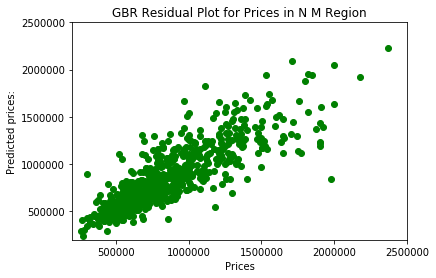

In [125]:
# Plot residual Plot of the GBR
plt.scatter(s_test, s_pred_gbr, c = 'green')
plt.ylim([200000, 2500000])
plt.xlim([200000, 2500000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot for Prices in N M Region")

# Modeling & Prediction of prices for each type in N M Region

## Modeling & Prediction of prices for type = house in N M Region

In [126]:
# linear regression between price & Rooms
df_N_M_h = df_N_M[(df_N_M['Type']=='h')] # create dataframe
lm1 = LinearRegression() # create linear regression object
r1 = df_N_M_h[['Rooms']]
s1 = df_N_M_h[['Price']]
lm1.fit(r1,s1) # fit the model using Year
shat1 = lm1.predict(r1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(r1, s1))
print("Mean Square Error is %.2f" % mean_squared_error(shat1, s1))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat1, s1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat1, s1)))
print("Predicted price for 2 bedroom house is %.1f" % lm1.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[82676.22159042]]
The intercept is:  [719020.53227313]
The R-square is 0.02
Mean Square Error is 203724491448.58
Mean absolute Error is 337502.66
Root Mean Squared Error is 451358.50
Predicted price for 2 bedroom house is 884373.0


In [127]:
# linear regression between price & Year
r1 = df_N_M_h[['Year']]
lm1.fit(r1,s1) # fit the model using Year
shat1 = lm1.predict(r1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(r1, s1))
print("Mean Square Error is %.2f" % mean_squared_error(shat1, s1))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat1, s1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat1, s1)))
print("Predicted price in year 2019 is %.1f" % lm1.predict([[2019]])) # predict the price

The coefficient is:  [[-86482.62553307]]
The intercept is:  [1.75404256e+08]
The R-square is 0.02
Mean Square Error is 204909470820.74
Mean absolute Error is 329994.10
Root Mean Squared Error is 452669.27
Predicted price in year 2019 is 795834.8


In [128]:
# linear regression between price & Distance
r1 = df_N_M_h[['Distance']]
lm1.fit(r1,s1) # fit the model 
shat1 = lm1.predict(r1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(r1, s1))
print("Mean Square Error is %.2f" % mean_squared_error(shat1, s1))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat1, s1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat1, s1)))
print("Predicted price of house within 20 km from CBD is %.1f" % lm1.predict([[20]])) # predict the price 

The coefficient is:  [[-45148.88443218]]
The intercept is:  [1460427.40914993]
The R-square is 0.39
Mean Square Error is 127000102280.17
Mean absolute Error is 239355.90
Root Mean Squared Error is 356370.74
Predicted price of house within 20 km from CBD is 557449.7


In [129]:
# linear regression between price & Bathroom
r1 = df_N_M_h[['Bathroom']]
lm1.fit(r1,s1) # fit the model 
shat1 = lm1.predict(r1)
print('The coefficient is: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm1.score(r1, s1))
print("Mean Square Error is %.2f" % mean_squared_error(shat1, s1))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat1, s1))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat1, s1)))
print("Predicted price of house with 2 bathrooms is %.1f" % lm1.predict([[2]])) # predict the price

The coefficient is:  [[116774.24429591]]
The intercept is:  [802826.81439833]
The R-square is 0.03
Mean Square Error is 202482060907.58
Mean absolute Error is 334647.79
Root Mean Squared Error is 449980.07
Predicted price of house with 2 bathrooms is 1036375.3


In [130]:
# Multiple linear regression for type = house in N M Region
t1 = df_N_M_h[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm1 = LinearRegression() # create Multiple linear regression object
s1 = df_N_M_h[['Price']]
lm1.fit(t1,s1)
shat1 = lm1.predict(t1)
# Model Evaluation
print('The coefficients are: ', lm1.coef_)
print('The intercept is: ', lm1.intercept_)
print("The R-square is %.2f" % lm.score(t1, s1))
print('Mean Square Error is', mean_squared_error(s1, shat1))
print('Mean absolute Error is', mean_absolute_error(s1, shat1))
print('Root Mean Squared Error is', sqrt(mean_squared_error(s1, shat1)))
print("Predicted price of house is %.1f" % lm1.predict([[2,20,2,2019,2005,1,200]])) 
# predict price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Landsize=200 

The coefficients are:  [[ 1.47720963e+05 -4.67493087e+04  1.66587552e+05  4.93159619e+04
  -2.78957848e+03  2.24139561e+04  5.25056666e+01]]
The intercept is:  [-93320306.27168503]
The R-square is 0.57
Mean Square Error is 85057972279.90695
Mean absolute Error is 196862.5727892478
Root Mean Squared Error is 291646.99943580246
Predicted price of house is 382061.8


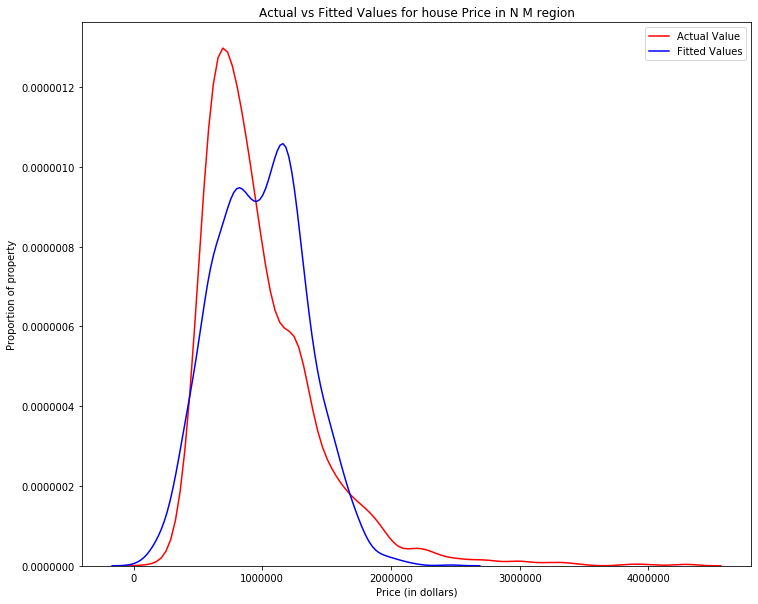

In [131]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df_N_M_h['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(shat1, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for house Price in N M region')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are not reasonably close to the actual values, since the two distributions do not overlap. However, there is definitely some room for improvement

In [132]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
t_pr1=pr.fit_transform(t1) # transform
print('original data is of:', t1.shape)
print('after transformation:', t_pr1.shape)
Input1=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input1) # input the list as an argument to the pipeline constructor

pipe.fit(t1,s1) # normalize the data, perform a transform and fit the model simultaneously.
spipe1=pipe.predict(t1)
print("The R-square is %0.2f"% pipe.score(t1,s1))
print("Mean Square Error is %0.2f"% mean_squared_error(s1, spipe1))
print("Mean absolute Error is %0.2f"% mean_absolute_error(s1, spipe1))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(s1, spipe1)))
print("Average Predicted price of house is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]]))

original data is of: (2539, 7)
after transformation: (2539, 36)
The R-square is 0.70
Mean Square Error is 63257184906.60
Mean absolute Error is 167918.60
Root Mean Squared Error is 251509.81
Average Predicted price of house is 400445.2


In [133]:
# Ridge regression for type = house in N M region
pr=PolynomialFeatures(degree=2)
t_train1, t_test1, s_train1, s_test1 = train_test_split(t1, s1, test_size=0.2, random_state=0) # train test split (20%/80%)
t_train_pr1=pr.fit_transform(t_train1) # fit the train data
t_test_pr1=pr.fit_transform(t_test1) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(t_train_pr1, s_train1) # fit the model
shat1 = RigeModel.predict(t_test_pr1) # predict the value
print('predicted:', shat1[0:2])
print('test set :', s_test1[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(t_test_pr1, s_test1))
print("Mean Square Error is %0.2f"% mean_squared_error(s_test1, shat1))
print("Mean absolute Error is %0.2f"% mean_absolute_error(s_test1, shat1))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(s_test1, shat1)))

predicted: [[1622582.14435774]
 [ 632221.2800675 ]]
test set : [[1456000.]
 [ 600000.]]
The R-square is 0.65
Mean Square Error is 77664558519.87
Mean absolute Error is 182592.03
Root Mean Squared Error is 278683.62


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.18937e-18): result may not be accurate.
  overwrite_a=True).T


In [134]:
#Initialise Lasso Regression model
lcv = LassoCV()
t_train1, t_test1, s_train1, s_test1 = train_test_split(t1, s1, test_size=0.2, random_state=3) # train test split
lcv.fit(t_train1, s_train1)
# Make Prediction
s_pred1 = lcv.predict(t_test1)

# Return Results
print("The R-square is %0.2f"% lcv.score(t_test1, s_test1))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(s_test1,s_pred1))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(s_test1,s_pred1))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(s_test1,s_pred1)))
se_lcv = stats.sem(s_pred1)

The R-square is 0.61
Lasso Regression MAE: 195348.5
Lasso Regression MSE:74304239691.5
Lasso Regression RMSE:272588.0


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
# PCA for type = house in N M Region
scaler = MinMaxScaler() # Apply MinMaxScaler
t_scalar1 = scaler.fit_transform(t1)
pca = PCA()
pca.fit(t_scalar1) # fit the PCA
t_scalar1 = pca.transform(t_scalar1)

# Split the training data and test data
t_train1, t_test1, s_train1, s_test1 = train_test_split(t_scalar1, s1, test_size=0.2, random_state=0) # train test split
max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(t_train1, s_train1)
    
    # Make prediction
    s_pred1 = gbr.predict(t_test1)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(s_test1,s_pred1))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(s_test1,s_pred1))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(s_test1,s_pred1))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(s_test1,s_pred1)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(s_test1,s_pred1) > max_r2:
        max_r2 = metrics.explained_variance_score(s_test1,s_pred1)
        max_i = i
        s_pred_gbr1 = s_pred1
        
        # Store Standard Error
        se_gbr1 = stats.sem(s_pred_gbr1)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.69
Gradient Boosting Regression MAE: 168636.5
Gradient Boosting MSE:68629457648.7
Gradient Boosting RMSE:261972.2
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.70
Gradient Boosting Regression MAE: 171160.4
Gradient Boosting MSE:67420545737.0
Gradient Boosting RMSE:259654.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.70
Gradient Boosting Regression MAE: 168428.2
Gradient Boosting MSE:66493389670.2
Gradient Boosting RMSE:257863.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.69
Gradient Boosting Regression MAE: 171080.2
Gradient Boosting MSE:69457818954.6
Gradient Boosting RMSE:263548.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.69
Gradient Boosting Regression MAE: 172515.3
Gradient Boosting MSE:67423179275.0
Gradient Boosting RMSE:259659.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.68
Gradient Boosting Regression MAE: 170721.4
Gradient Boosting MSE:70114110291.2
Gradient Boosting RMSE:264790.7
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.67
Gradient Boosting Regression MAE: 176584.3
Gradient Boosting MSE:73077729325.8
Gradient Boosting RMSE:270328.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.64
Gradient Boosting Regression MAE: 180684.7
Gradient Boosting MSE:79486765945.8
Gradient Boosting RMSE:281934.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.66
Gradient Boosting Regression MAE: 185369.0
Gradient Boosting MSE:74975077734.0
Gradient Boosting RMSE:273815.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.62
Gradient Boosting Regression MAE: 188261.0
Gradient Boosting MSE:82948820945.9
Gradient Boosting RMSE:288008.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.59
Gradient Boosting Regression MAE: 192317.6
Gradient Boosting MSE:89782909802.7
Gradient Boosting RMSE:299638.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.62
Gradient Boosting Regression MAE: 193579.7
Gradient Boosting MSE:83604894367.5
Gradient Boosting RMSE:289145.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.60
Gradient Boosting Regression MAE: 195163.2
Gradient Boosting MSE:88411251130.2
Gradient Boosting RMSE:297340.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.7
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 201304.9
Gradient Boosting MSE:95046629955.1
Gradient Boosting RMSE:308296.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.58
Gradient Boosting Regression MAE: 200048.6
Gradient Boosting MSE:92241221111.1
Gradient Boosting RMSE:303712.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.57
Gradient Boosting Regression MAE: 202085.4
Gradient Boosting MSE:96096801712.3
Gradient Boosting RMSE:309994.8
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.47
Gradient Boosting Regression MAE: 218031.8
Gradient Boosting MSE:116963402073.4
Gradient Boosting RMSE:341999.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.9
Gradient Boosting R^2: 0.50
Gradient Boosting Regression MAE: 208801.5
Gradient Boosting MSE:109180035828.1
Gradient Boosting RMSE:330424.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.45
Gradient Boosting Regression MAE: 223317.4
Gradient Boosting MSE:121114529889.2
Gradient Boosting RMSE:348015.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.49
Gradient Boosting Regression MAE: 223332.2
Gradient Boosting MSE:111966511378.7
Gradient Boosting RMSE:334614.0
---------------------------------
Max R^2 is: 0.70 with learning rate: 0.19


Text(0.5, 1.0, 'GBR Residual Plot for house Prices in N M Region')

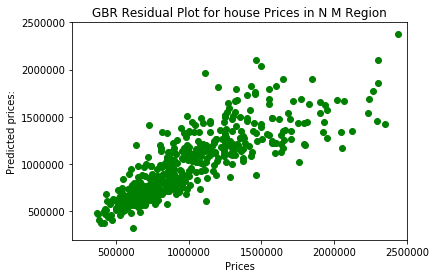

In [136]:
# Plot residual Plot of the GBR
plt.scatter(s_test1, s_pred_gbr1, c = 'green')
plt.ylim([200000, 2500000])
plt.xlim([200000, 2500000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot for house Prices in N M Region")

## Modeling & Prediction of prices for type = unit in N M Region

In [137]:
# linear regression between price & Rooms
df_N_M_u = df_N_M[(df_N_M['Type']=='u')] # create dataframe
lm2 = LinearRegression() # create linear regression object
r2 = df_N_M_u[['Rooms']]
s2 = df_N_M_u[['Price']]
lm2.fit(r2,s2) # fit the model using Year
shat2 = lm2.predict(r2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(r2, s2))
print("Mean Square Error is %.2f" % mean_squared_error(shat2, s2))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat2, s2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat2, s2)))
print("Predicted price for 2 bedroom unit is %.1f" % lm2.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[168833.42249092]]
The intercept is:  [221594.25446977]
The R-square is 0.22
Mean Square Error is 35240617941.31
Mean absolute Error is 124659.26
Root Mean Squared Error is 187724.85
Predicted price for 2 bedroom unit is 559261.1


In [138]:
# linear regression between price & Year
r2 = df_N_M_u[['Year']]
lm2.fit(r2,s2) # fit the model using Year
shat2 = lm2.predict(r2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(r2, s2))
print("Mean Square Error is %.2f" % mean_squared_error(shat2, s2))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat2, s2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat2, s2)))
print("Predicted price in year 2019 is %.1f" % lm2.predict([[2019]])) # predict the price

The coefficient is:  [[29644.25105031]]
The intercept is:  [-59240339.769383]
The R-square is 0.01
Mean Square Error is 44710285437.82
Mean absolute Error is 144254.42
Root Mean Squared Error is 211448.07
Predicted price in year 2019 is 611403.1


In [139]:
# linear regression between price & Distance
r2 = df_N_M_u[['Distance']]
lm2.fit(r2,s2) # fit the model 
shat2 = lm2.predict(r2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(r2, s2))
print("Mean Square Error is %.2f" % mean_squared_error(shat2, s2))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat2, s2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat2, s2)))
print("Predicted price of unit within 20 km from CBD is %.1f" % lm2.predict([[20]])) # predict the price 

The coefficient is:  [[-14671.13242657]]
The intercept is:  [624104.94326255]
The R-square is 0.08
Mean Square Error is 41255865906.37
Mean absolute Error is 139802.09
Root Mean Squared Error is 203115.40
Predicted price of unit within 20 km from CBD is 330682.3


In [140]:
# linear regression between price & Bathroom
r2 = df_N_M_u[['Bathroom']]
lm2.fit(r2,s2) # fit the model 
shat2 = lm2.predict(r2)
print('The coefficient is: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(r2, s2))
print("Mean Square Error is %.2f" % mean_squared_error(shat2, s2))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat2, s2))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat2, s2)))
print("Predicted price of unit with 2 bathrooms is %.1f" % lm2.predict([[2]])) # predict the price

The coefficient is:  [[283203.2481614]]
The intercept is:  [208433.22589942]
The R-square is 0.24
Mean Square Error is 34054050857.88
Mean absolute Error is 126641.48
Root Mean Squared Error is 184537.40
Predicted price of unit with 2 bathrooms is 774839.7


In [141]:
# Multiple linear regression for type = unit in N M Region
t2 = df_N_M_u[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm2.fit(t2,s2)
shat2 = lm2.predict(t2)
# Model Evaluation
print('The coefficients are: ', lm2.coef_)
print('The intercept is: ', lm2.intercept_)
print("The R-square is %.2f" % lm2.score(t2, s2))
print('Mean Square Error is', mean_squared_error(s2, shat2))
print('Mean absolute Error is', mean_absolute_error(s2, shat2))
print('Root Mean Squared Error is', sqrt(mean_squared_error(s2, shat2)))
print("Predicted price of unit is %.1f" % lm2.predict([[2,20,2,2019,2005,1,200]])) 
# predict price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Landsize=200 

The coefficients are:  [[ 1.49165235e+05 -1.90096038e+04  1.71950785e+05  4.44777621e+04
  -8.34865067e+02  9.03491819e+04 -7.72985269e+00]]
The intercept is:  [-87956604.46125454]
The R-square is 0.51
Mean Square Error is 22113960290.304054
Mean absolute Error is 100431.71928810586
Root Mean Squared Error is 148707.63359795642
Predicted price of unit is 520936.0


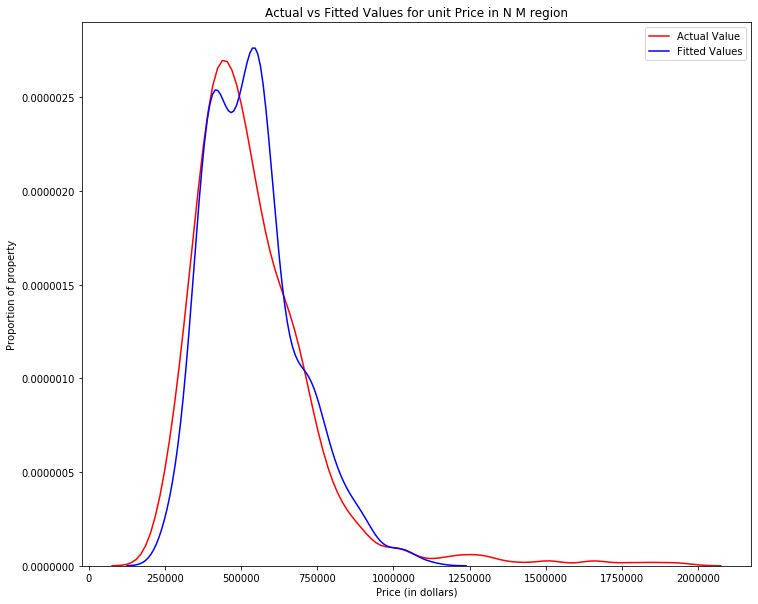

In [142]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df_N_M_u['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(shat2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for unit Price in N M region')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement

In [143]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
t_pr2=pr.fit_transform(t2) # transform
print('original data is of:', t2.shape)
print('after transformation:', t_pr2.shape)
Input2=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input2) # input the list as an argument to the pipeline constructor

pipe.fit(t2,s2) # normalize the data, perform a transform and fit the model simultaneously.
spipe2=pipe.predict(t2)
print("The R-square is %0.2f"% pipe.score(t2,s2))
print("Mean Square Error is %0.2f"% mean_squared_error(s2, spipe2))
print("Mean absolute Error is %0.2f"% mean_absolute_error(s2, spipe2))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(s2, spipe2)))
print("Average Predicted price of unit is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]]))

original data is of: (667, 7)
after transformation: (667, 36)
The R-square is 0.63
Mean Square Error is 16788306626.75
Mean absolute Error is 90004.72
Root Mean Squared Error is 129569.70
Average Predicted price of unit is 425076.0


In [144]:
# Ridge regression for type = house in N M region
pr=PolynomialFeatures(degree=2)
t_train2, t_test2, s_train2, s_test2 = train_test_split(t2, s2, test_size=0.2, random_state=2) # train test split (20%/80%)
t_train_pr2=pr.fit_transform(t_train2) # fit the train data
t_test_pr2=pr.fit_transform(t_test2) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(t_train_pr2, s_train2) # fit the model
shat2 = RigeModel.predict(t_test_pr2) # predict the value
print('predicted:', shat2[0:2])
print('test set :', s_test2[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(t_test_pr2, s_test2))
print("Mean Square Error is %0.2f"% mean_squared_error(s_test2, shat2))
print("Mean absolute Error is %0.2f"% mean_absolute_error(s_test2, shat2))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(s_test2, shat2)))

predicted: [[550104.20537165]
 [571311.45490822]]
test set : [[570000.]
 [705000.]]
The R-square is 0.60
Mean Square Error is 19503898705.32
Mean absolute Error is 91011.40
Root Mean Squared Error is 139656.36


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.21528e-18): result may not be accurate.
  overwrite_a=True).T


In [145]:
#Initialise Lasso Regression model
lcv = LassoCV()
t_train2, t_test2, s_train2, s_test2 = train_test_split(t2, s2, test_size=0.2, random_state=4) # train test split
lcv.fit(t_train2, s_train2)
# Make Prediction
s_pred2 = lcv.predict(t_test2)

# Return Results
print("The R-square is %0.2f"% lcv.score(t_test2, s_test2))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(s_test2,s_pred2))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(s_test2,s_pred2))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(s_test2,s_pred2)))
se_lcv = stats.sem(s_pred2)

The R-square is 0.53
Lasso Regression MAE: 94326.7
Lasso Regression MSE:18796467894.2
Lasso Regression RMSE:137100.2


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
# PCA for type = unit in N M Region
scaler = MinMaxScaler() # Apply MinMaxScaler
t_scalar2 = scaler.fit_transform(t2)
pca = PCA()
pca.fit(t_scalar2) # fit the PCA
t_scalar2 = pca.transform(t_scalar2)

# Split the training data and test data
t_train2, t_test2, s_train2, s_test2 = train_test_split(t_scalar2, s2, test_size=0.2, random_state=2) # train test split
max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(t_train2, s_train2)
    
    # Make prediction
    s_pred2 = gbr.predict(t_test2)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(s_test2,s_pred2))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(s_test2,s_pred2))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(s_test2,s_pred2))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(s_test2,s_pred2)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(s_test2,s_pred2) > max_r2:
        max_r2 = metrics.explained_variance_score(s_test2,s_pred2)
        max_i = i
        s_pred_gbr2 = s_pred2
        
        # Store Standard Error
        se_gbr2 = stats.sem(s_pred_gbr2)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.56
Gradient Boosting Regression MAE: 89988.7
Gradient Boosting MSE:21230202742.7
Gradient Boosting RMSE:145705.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.1
Gradient Boosting R^2: 0.55
Gradient Boosting Regression MAE: 92445.8
Gradient Boosting MSE:21695335241.3
Gradient Boosting RMSE:147293.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.53
Gradient Boosting Regression MAE: 91553.8
Gradient Boosting MSE:22693323121.0
Gradient Boosting RMSE:150643.0
---------------------------------
For learning rate i: 0.2
Gradient Boosting R^2: 0.46
Gradient Boosting Regression MAE: 96416.8
Gradient Boosting MSE:26031250017.8
Gradient Boosting RMSE:161342.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.55
Gradient Boosting Regression MAE: 90463.6
Gradient Boosting MSE:21809540780.6
Gradient Boosting RMSE:147680.5
---------------------------------
For learning rate i: 0.3
Gradient Boosting R^2: 0.49
Gradient Boosting Regression MAE: 97694.7
Gradient Boosting MSE:24575139279.5
Gradient Boosting RMSE:156764.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.51
Gradient Boosting Regression MAE: 94374.3
Gradient Boosting MSE:23955493497.2
Gradient Boosting RMSE:154775.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.4
Gradient Boosting R^2: 0.45
Gradient Boosting Regression MAE: 97220.2
Gradient Boosting MSE:26582643438.1
Gradient Boosting RMSE:163041.8
---------------------------------
For learning rate i: 0.5
Gradient Boosting R^2: 0.52


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regression MAE: 96907.6
Gradient Boosting MSE:23369857306.8
Gradient Boosting RMSE:152872.0
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.5
Gradient Boosting R^2: 0.42
Gradient Boosting Regression MAE: 109918.3
Gradient Boosting MSE:28316118152.0
Gradient Boosting RMSE:168273.9
---------------------------------
For learning rate i: 0.6
Gradient Boosting R^2: 0.50
Gradient Boosting Regression MAE: 99918.8
Gradient Boosting MSE:24261629629.7
Gradient Boosting RMSE:155761.5
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.42
Gradient Boosting Regression MAE: 109206.7
Gradient Boosting MSE:27945798365.4
Gradient Boosting RMSE:167170.0
---------------------------------
For learning rate i: 0.7
Gradient Boosting R^2: 0.36
Gradient Boosting Regression MAE: 109992.0
Gradient Boosting MSE:31018625191.7
Gradient Boosting RMSE:176121.1
---------------------------------
For learning rate i: 0.7
Gradient Boosting R^2: 0.53
Gradient Boosting Regression MAE: 100756.1
Gradient Boosting MSE:22894209100.5
Gradient Boosting RMSE:151308.3
---------------------------------
For learning rate i: 0.8
Gradient Boosting R^2: 0.53
Gradient Boosting Regression MAE: 100250.1
Gradient Boosting MSE:22912397535.9
Gradient Boosting RMSE:151368.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.39
Gradient Boosting Regression MAE: 105267.7
Gradient Boosting MSE:29710309422.1
Gradient Boosting RMSE:172366.8
---------------------------------
For learning rate i: 0.9
Gradient Boosting R^2: 0.44
Gradient Boosting Regression MAE: 105491.7
Gradient Boosting MSE:27355883015.4
Gradient Boosting RMSE:165396.1
---------------------------------
For learning rate i: 0.9
Gradient Boosting R^2: 0.31
Gradient Boosting Regression MAE: 110615.9
Gradient Boosting MSE:33615425908.4


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting RMSE:183345.1
---------------------------------
For learning rate i: 1.0
Gradient Boosting R^2: 0.36
Gradient Boosting Regression MAE: 113269.3
Gradient Boosting MSE:31185396543.6
Gradient Boosting RMSE:176593.9
---------------------------------
For learning rate i: 1.0
Gradient Boosting R^2: 0.46
Gradient Boosting Regression MAE: 108523.9
Gradient Boosting MSE:26403793150.1
Gradient Boosting RMSE:162492.4
---------------------------------
Max R^2 is: 0.56 with learning rate: 0.10


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'GBR Residual Plot for unit Prices in N M Region')

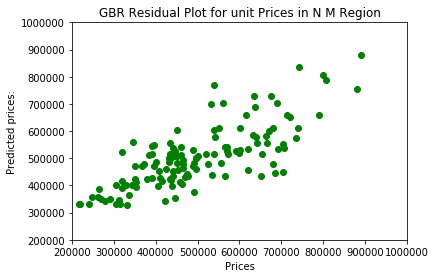

In [147]:
# Plot residual Plot of the GBR
plt.scatter(s_test2, s_pred_gbr2, c = 'green')
plt.ylim([200000, 1000000])
plt.xlim([200000, 1000000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot for unit Prices in N M Region")

## Modeling & Prediction of prices for type = townhouse in N M Region

In [148]:
# linear regression between price & Rooms
df_N_M_t = df_N_M[(df_N_M['Type']=='t')] # create dataframe
lm3 = LinearRegression() # create linear regression object
r3 = df_N_M_t[['Rooms']]
s3 = df_N_M_t[['Price']]
lm3.fit(r3,s3) # fit the model using Year
shat3 = lm3.predict(r3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(r3, s3))
print("Mean Square Error is %.2f" % mean_squared_error(shat3, s3))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat3,s3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat3, s3)))
print("Predicted price for 2 bedroom townhouse is %.1f" % lm3.predict([[2]])) # predict the price for 2 rooms

The coefficient is:  [[75886.80430911]]
The intercept is:  [551514.10271138]
The R-square is 0.04
Mean Square Error is 62340021395.04
Mean absolute Error is 192099.36
Root Mean Squared Error is 249679.84
Predicted price for 2 bedroom townhouse is 703287.7


In [149]:
# linear regression between price & Year
r3 = df_N_M_t[['Year']]
lm3.fit(r3,s3) # fit the model 
shat3 = lm3.predict(r3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(r3, s3))
print("Mean Square Error is %.2f" % mean_squared_error(shat3, s3))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat3,s3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat3, s3)))
print("Predicted price in year 2019 is %.1f" % lm3.predict([[2019]])) # predict the price

The coefficient is:  [[31772.44683878]]
The intercept is:  [-63328697.29027479]
The R-square is 0.01
Mean Square Error is 64273694604.08
Mean absolute Error is 196135.60
Root Mean Squared Error is 253522.57
Predicted price in year 2019 is 819872.9


In [150]:
# linear regression between price & Distance
r3 = df_N_M_t[['Distance']]
lm3.fit(r3,s3) # fit the model 
shat3 = lm3.predict(r3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(r3, s3))
print("Mean Square Error is %.2f" % mean_squared_error(shat3, s3))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat3,s3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat3, s3)))
print("Predicted price of townhouse within 20 km from CBD is %.1f" % lm3.predict([[20]])) # predict the price 

The coefficient is:  [[-37837.84148507]]
The intercept is:  [1051411.58692424]
The R-square is 0.49
Mean Square Error is 33007274034.27
Mean absolute Error is 132854.07
Root Mean Squared Error is 181679.04
Predicted price of townhouse within 20 km from CBD is 294654.8


In [151]:
# linear regression between price & Bathroom
r3 = df_N_M_t[['Bathroom']]
lm3.fit(r3,s3) # fit the model 
shat3 = lm3.predict(r3)
print('The coefficient is: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(r3, s3))
print("Mean Square Error is %.2f" % mean_squared_error(shat3, s3))
print("Mean absolute Error is %.2f" % mean_absolute_error(shat3,s3))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(shat3, s3)))
print("Predicted price of townhouse with 2 bathrooms is %.1f" % lm3.predict([[2]])) # predict the price

The coefficient is:  [[156519.72392075]]
The intercept is:  [498382.29778647]
The R-square is 0.12
Mean Square Error is 56686600126.00
Mean absolute Error is 183837.98
Root Mean Squared Error is 238089.48
Predicted price of townhouse with 2 bathrooms is 811421.7


In [152]:
# Multiple linear regression for type = townhouse in N M Region
t3 = df_N_M_t[['Rooms', 'Distance', 'Bathroom','Year','YearBuilt','Car','Landsize']]
lm3.fit(t3,s3)
shat3 = lm3.predict(t3)
# Model Evaluation
print('The coefficients are: ', lm3.coef_)
print('The intercept is: ', lm3.intercept_)
print("The R-square is %.2f" % lm3.score(t3, s3))
print('Mean Square Error is', mean_squared_error(s3, shat3))
print('Mean absolute Error is', mean_absolute_error(s3, shat3))
print('Root Mean Squared Error is', sqrt(mean_squared_error(s3, shat3)))
print("Predicted price of townhouse is %.1f" % lm3.predict([[2,20,2,2019,2005,1,200]])) 
# predict price for rooms =2,Distance=20, Bathroom=2,Year=2019,Yielbuilt=2005,Car=1 & Landsize=200 

The coefficients are:  [[ 7.12531283e+04 -4.11319445e+04  8.19908511e+04  8.07605809e+04
  -1.31540408e+02  4.62250357e+04  5.55314626e+00]]
The intercept is:  [-1.61911203e+08]
The R-square is 0.66
Mean Square Error is 21771824250.137844
Mean absolute Error is 109784.65921604089
Root Mean Squared Error is 147552.78462346227
Predicted price of townhouse is 411856.0


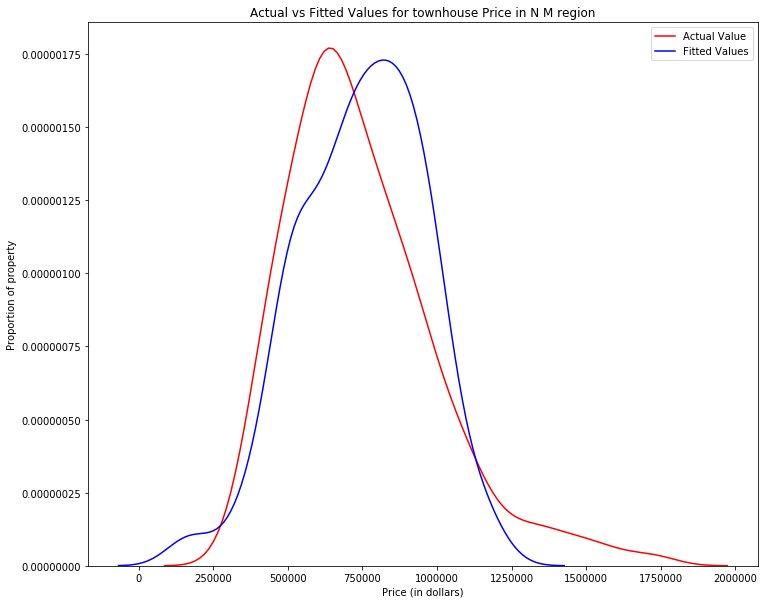

In [153]:
# visualization of MLR using distribution plot
width = 12
height= 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df_N_M_t['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(shat3, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for townhouse Price in N M region')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of property')

plt.show()
plt.close()

We can see that the fitted values are not reasonably close to the actual values, since the two distributions do not overlap a bit. However, there is definitely some room for improvement

In [154]:
# Aplpy polynomial transform on multiple features
pr=PolynomialFeatures(degree=2) # creating a polynomial object
t_pr3=pr.fit_transform(t3) # transform
print('original data is of:', t3.shape)
print('after transformation:', t_pr3.shape)
Input3=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
pipe=Pipeline(Input3) # input the list as an argument to the pipeline constructor
pipe.fit(t3,s3) # normalize the data, perform a transform and fit the model simultaneously.
spipe3=pipe.predict(t3)
print("The R-square is %0.2f"% pipe.score(t3,s3))
print("Mean Square Error is %0.2f"% mean_squared_error(s3, spipe3))
print("Mean absolute Error is %0.2f"% mean_absolute_error(s3, spipe3))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(s3,spipe3)))
print("Average Predicted price of unit is %.1f" % pipe.predict([[2,20,2,2019,2005,1,200]]))

original data is of: (318, 7)
after transformation: (318, 36)
The R-square is 0.75
Mean Square Error is 16021027162.84
Mean absolute Error is 94928.45
Root Mean Squared Error is 126574.20
Average Predicted price of unit is 559303.9


In [155]:
# Ridge regression for type = townhouse in N M region
pr=PolynomialFeatures(degree=2)
t_train3, t_test3, s_train3, s_test3 = train_test_split(t3, s3, test_size=0.2, random_state=3) # train test split (20%/80%)
t_train_pr3=pr.fit_transform(t_train3) # fit the train data
t_test_pr3=pr.fit_transform(t_test3) # fit the test data
RigeModel=Ridge(alpha=0.1) # setting regularization parameter 0.1
RigeModel.fit(t_train_pr3, s_train3) # fit the model
shat3 = RigeModel.predict(t_test_pr3) # predict the value
print('predicted:', shat3[0:2])
print('test set :', s_test3[0:2].values)
# compare the first 3 predicted versus test data 
print("The R-square is %0.2f"% RigeModel.score(t_test_pr3, s_test3))
print("Mean Square Error is %0.2f"% mean_squared_error(s_test3,shat3))
print("Mean absolute Error is %0.2f"% mean_absolute_error(s_test3,shat3))
print("Root Mean Squared Error is %0.2f"% sqrt(mean_squared_error(s_test3,shat3)))

predicted: [[555926.7470012 ]
 [720047.24544443]]
test set : [[595000.]
 [635000.]]
The R-square is 0.61
Mean Square Error is 26462749281.40
Mean absolute Error is 117792.57
Root Mean Squared Error is 162673.75


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.14928e-18): result may not be accurate.
  overwrite_a=True).T


In [156]:
#Initialise Lasso Regression model
lcv = LassoCV()
t_train3, t_test3, s_train3, s_test3 = train_test_split(t3, s3, test_size=0.2, random_state=2) # train test split 
lcv.fit(t_train3, s_train3)
# Make Prediction
s_pred3 = lcv.predict(t_test3)

# Return Results
print("The R-square is %0.2f"% lcv.score(t_test3, s_test3))
print('Lasso Regression MAE: %0.1f'%metrics.mean_absolute_error(s_test3,s_pred3))
print('Lasso Regression MSE:%0.1f'%metrics.mean_squared_error(s_test3,s_pred3))
print('Lasso Regression RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(s_test3,s_pred3)))
se_lcv = stats.sem(s_pred3)

The R-square is 0.58
Lasso Regression MAE: 115083.5
Lasso Regression MSE:19525713827.9
Lasso Regression RMSE:139734.4


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
# PCA for type = townhouse in N M Region
scaler = MinMaxScaler() # Apply MinMaxScaler
t_scalar3 = scaler.fit_transform(t3)
pca = PCA()
pca.fit(t_scalar3) # fit the PCA
t_scalar3 = pca.transform(t_scalar3)

# Split the training data and test data
t_train3, t_test3, s_train3, s_test3 = train_test_split(t_scalar3, s3, test_size=0.2, random_state=2) # train test split 
max_r2 = 0 # Initiate max R^2 score
# Create Gradient Boosting Regression model that iterates through learning rates 
for i in np.linspace(0.1, 1, 20):
    
    # Initiate model for learning rate i
    gbr = GradientBoostingRegressor(learning_rate = i)
    gbr.fit(t_train3, s_train3)
    
    # Make prediction
    s_pred3 = gbr.predict(t_test3)
    
    # Return values for corresponding learning rate
    print ('For learning rate i: %0.1f' %i)
    print('Gradient Boosting R^2: %0.2f' %metrics.explained_variance_score(s_test3,s_pred3))
    print('Gradient Boosting Regression MAE: %0.1f'%metrics.mean_absolute_error(s_test3,s_pred3))
    print('Gradient Boosting MSE:%0.1f'%metrics.mean_squared_error(s_test3,s_pred3))
    print('Gradient Boosting RMSE:%0.1f'%np.sqrt(metrics.mean_squared_error(s_test3,s_pred3)))
    print ('---------------------------------')

    # If R^2 new maximum score, save score and the learning rate
    if metrics.explained_variance_score(s_test3,s_pred3) > max_r2:
        max_r2 = metrics.explained_variance_score(s_test3,s_pred3)
        max_i = i
        s_pred_gbr3 = s_pred3
        
        # Store Standard Error
        se_gbr3 = stats.sem(s_pred_gbr3)

# Print maximum R^2 score and corresponding learning rate
print ('Max R^2 is: %0.2f' %max_r2, 'with learning rate: %0.2f' %max_i)

For learning rate i: 0.1

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting R^2: 0.75
Gradient Boosting Regression MAE: 93480.2
Gradient Boosting MSE:13730559504.9
Gradient Boosting RMSE:117177.5
---------------------------------
For learning rate i: 0.1

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting R^2: 0.76
Gradient Boosting Regression MAE: 89024.0
Gradient Boosting MSE:12632071887.2
Gradient Boosting RMSE:112392.5
---------------------------------
For learning rate i: 0.2
Gradient Boosting R^2: 0.74
Gradient Boosting Regression MAE: 93470.6
Gradient Boosting MSE:13522528694.8
Gradient Boosting RMSE:116286.4
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.2
Gradient Boosting R^2: 0.76
Gradient Boosting Regression MAE: 89806.0
Gradient Boosting MSE:12531909965.8
Gradient Boosting RMSE:111946.0
---------------------------------
For learning rate i: 0.3
Gradient Boosting R^2: 0.71
Gradient Boosting Regression MAE: 95781.0
Gradient Boosting MSE:15212654942.8
Gradient Boosting RMSE:123339.6
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.3
Gradient Boosting R^2: 0.76
Gradient Boosting Regression MAE: 85626.2
Gradient Boosting MSE:12310793995.5
Gradient Boosting RMSE:110954.0
---------------------------------
For learning rate i: 0.4
Gradient Boosting R^2: 0.65
Gradient Boosting Regression MAE: 102068.1
Gradient Boosting MSE:17836333061.6

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting RMSE:133552.7
---------------------------------
For learning rate i: 0.4
Gradient Boosting R^2: 0.68
Gradient Boosting Regression MAE: 97909.5
Gradient Boosting MSE:16277843118.2
Gradient Boosting RMSE:127584.7
---------------------------------
For learning rate i: 0.5
Gradient Boosting R^2: 0.63
Gradient Boosting Regression MAE: 111966.8
Gradient Boosting MSE:19260577843.1
Gradient Boosting RMSE:138782.5
---------------------------------
For learning rate i: 0.5
Gradient Boosting R^2: 0.68
Gradient Boosting Regression MAE: 98947.2
Gradient Boosting MSE:16566293732.3
Gradient Boosting RMSE:128710.1
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.6
Gradient Boosting R^2: 0.71
Gradient Boosting Regression MAE: 94823.9
Gradient Boosting MSE:15580611639.1
Gradient Boosting RMSE:124822.3
---------------------------------
For learning rate i: 0.6
Gradient Boosting R^2: 0.64
Gradient Boosting Regression MAE: 108156.9
Gradient Boosting MSE:18735100011.7
Gradient Boosting RMSE:136876.2
---------------------------------
For learning rate i: 0.7

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp


Gradient Boosting R^2: 0.59
Gradient Boosting Regression MAE: 112839.9
Gradient Boosting MSE:20384952028.2
Gradient Boosting RMSE:142775.9
---------------------------------
For learning rate i: 0.7
Gradient Boosting R^2: 0.62
Gradient Boosting Regression MAE: 107099.3
Gradient Boosting MSE:19033316782.9
Gradient Boosting RMSE:137961.3
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 0.8
Gradient Boosting R^2: 0.54
Gradient Boosting Regression MAE: 124898.5
Gradient Boosting MSE:22785383567.6
Gradient Boosting RMSE:150948.3
---------------------------------
For learning rate i: 0.8
Gradient Boosting R^2: 0.55
Gradient Boosting Regression MAE: 113490.3

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting MSE:22726879620.4
Gradient Boosting RMSE:150754.4
---------------------------------
For learning rate i: 0.9
Gradient Boosting R^2: 0.53
Gradient Boosting Regression MAE: 111210.8
Gradient Boosting MSE:23948600051.6
Gradient Boosting RMSE:154753.4
---------------------------------
For learning rate i: 0.9
Gradient Boosting R^2: 0.56
Gradient Boosting Regression MAE: 117454.6
Gradient Boosting MSE:23329165437.2
Gradient Boosting RMSE:152738.9
---------------------------------


C:\Users\Lajpat Rai\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For learning rate i: 1.0
Gradient Boosting R^2: 0.49
Gradient Boosting Regression MAE: 120861.3
Gradient Boosting MSE:25064126520.0
Gradient Boosting RMSE:158316.5
---------------------------------
For learning rate i: 1.0
Gradient Boosting R^2: 0.40
Gradient Boosting Regression MAE: 130236.4
Gradient Boosting MSE:28645739044.0
Gradient Boosting RMSE:169250.5
---------------------------------
Max R^2 is: 0.76 with learning rate: 0.15


Text(0.5, 1.0, 'GBR Residual Plot for townhouse Prices in N M Region')

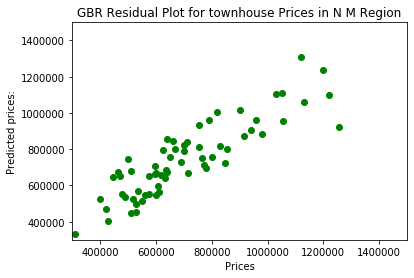

In [158]:
# Plot residual Plot of the GBR
plt.scatter(s_test3, s_pred_gbr3, c = 'green')
plt.ylim([300000, 1500000])
plt.xlim([300000, 1500000])
plt.xlabel("Prices")
plt.ylabel("Predicted prices:")
plt.title("GBR Residual Plot for townhouse Prices in N M Region")

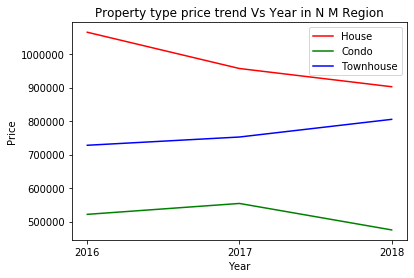

In [159]:
# plot of each type of property mean price vs year in Northern Metropolitan
#house, duplex and town house price groupby year and mean
df_N_M_h_year=df_N_M_h.groupby('Year').mean()
df_N_M_u_year=df_N_M_u.groupby('Year').mean()
df_N_M_t_year=df_N_M_t.groupby('Year').mean()

#sns.lmplot(x="Year", y="Price", hue="Type", data=df_N_M,  x_estimator=np.mean);
df_N_M_h_year['Price'].plot(kind='line', color='r',label='House')
df_N_M_u_year['Price'].plot(kind='line', color='g',label='Condo')
df_N_M_t_year['Price'].plot(kind='line', color='b',label='Townhouse')
year_xticks=[2016,2017,2018]
plt.ylabel('Price')
plt.xticks( year_xticks)
plt.title('Property type price trend Vs Year in N M Region')
plt.legend()

Graph suggests that House price decreased by ~ $50,000/year, Condo price climbed up slowly in 2017 but decreased in 2018 while Townhouse price increased by ~ 100,000 in 2 years in Northern Metropolitan region. It is time to built more condos & houses in 2019 due to decrease in price over 2 year period. Furthermore, it can be concluded that sellers should be interested in selling Townhouses in coming years due to dramatic change in price.

In [161]:
# creating dataframe group by suburb for house in North Metropolitan Region
df_N_M_h_suburb = df_N_M_h.groupby(('Suburb'),as_index=False).mean()
df_N_M_h_suburb['Price'].head(10)

0    1.227150e+06
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6    1.627971e+06
7             NaN
8             NaN
9             NaN
Name: Price, dtype: float64

In [163]:
df_N_M_h_suburb.dropna(subset=["Price"], axis=0, inplace=True)
df_N_M_h_suburb.shape

(58, 12)

In [164]:
df_N_M_h_suburb.head()

,Suburb,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Year
0,Abbotsford,2.600000,1.227150e+06,2.687500,1.350000,1.025000,199.338000,1927.750000,-37.803850,144.996577,4019.0,2016.625000
6,Alphington,3.470588,1.627971e+06,6.070588,1.764706,2.058824,536.809412,1954.529412,-37.777472,145.028696,2211.0,2016.588235
17,Attwood,4.222222,7.897778e+05,16.500000,1.888889,2.111111,619.808889,1996.333333,-37.671351,144.887621,1130.0,2017.222222
46,Broadmeadows,3.166667,6.020000e+05,14.000000,1.166667,2.066667,575.436000,1967.800000,-37.684539,144.924958,4294.0,2017.300000
49,Brunswick,3.000000,1.224454e+06,5.200000,1.364286,1.235714,387.463429,1921.014286,-37.766012,144.962357,11918.0,2016.750000


# API FOURSQUARE

In [165]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'APNMGCNGOXACHALHUQD11BAE4KSFWHVPRH5TM5G0QSHX4SXY' # your Foursquare ID
CLIENT_SECRET = 'H5XFJ4QODH0YAVHQPNYMO2TDIWGIBXT3KCW1HT0XMII4RL1Y' # your Foursquare Secret
VERSION = '20200908' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: APNMGCNGOXACHALHUQD11BAE4KSFWHVPRH5TM5G0QSHX4SXY
CLIENT_SECRET:H5XFJ4QODH0YAVHQPNYMO2TDIWGIBXT3KCW1HT0XMII4RL1Y


In [166]:
# Get the neighborhood's latitude and longitude values.
neighborhood_latitude_N_M_S = df_N_M_h_suburb.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude_N_M_S = df_N_M_h_suburb.loc[0, 'Longtitude'] # neighborhood longitude value

neighborhood_name_N_M_S = df_N_M_h_suburb.loc[0, 'Suburb'] # suburb name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name_N_M_S, 
                                                               neighborhood_latitude_N_M_S, 
                                                               neighborhood_longitude_N_M_S))

Latitude and longitude values of Abbotsford are -37.803850000000004, 144.99657725.


In [167]:
# let's get the top 100 venues that are in Abbotsford within a radius of 500 meters
# First, let's create the GET request URL. Name your URL url.
LIMIT = 100
radius = 500

# create url
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude_N_M_S, 
    neighborhood_longitude_N_M_S, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=APNMGCNGOXACHALHUQD11BAE4KSFWHVPRH5TM5G0QSHX4SXY&client_secret=H5XFJ4QODH0YAVHQPNYMO2TDIWGIBXT3KCW1HT0XMII4RL1Y&v=20200908&ll=-37.803850000000004,144.99657725&radius=500&limit=100'

In [168]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f58c9a229660202f68033bf'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': -37.7993499955, 'lng': 145.00226200367445},
   'sw': {'lat': -37.80835000450001, 'lng': 144.99089249632556}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5ccacbf964a520424429e3',
       'name': 'Three Bags Full',
       'location': {'address': '60 Nicholson St',
        'lat': -37.8073178966101,
        'lng': 144.99660278995051,
        'labeledLatLngs': [{'label': 'display',
          'lat': -37.8073178

In [170]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [171]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Three Bags Full,Café,-37.807318,144.996603
1,The Kitchen at Weylandts,Café,-37.805311,144.997345
2,The Park Hotel,Pub,-37.802769,144.997029
3,Stomping Ground Brewery & Beer Hall,Brewery,-37.804683,144.991171
4,Laird Hotel,Gay Bar,-37.805309,144.993124
5,Retreat Hotel,Pub,-37.801126,144.997548
6,Rita's Cafeteria,Pizza Place,-37.799978,144.994047
7,Dr. Morse,Gastropub,-37.799932,144.994113
8,Yarra Hotel,Pub,-37.800361,144.996311
9,Mavis the Grocer,Convenience Store,-37.803110,144.997020


In [172]:
# how many vanues were returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

24 venues were returned by Foursquare.


In [173]:
# Let's create a function to repeat the same process to all the neighborhoods in Northern Metropolitan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [174]:
# write the code to run the above function on each neighborhood and create a new dataframe called north_metropolitan_venues.
north_metropolitan_venues = getNearbyVenues(names=df_N_M_h_suburb['Suburb'],
                                   latitudes=df_N_M_h_suburb['Latitude'],
                                   longitudes=df_N_M_h_suburb['Longtitude']
                                  )

Abbotsford
Alphington
Attwood
Broadmeadows
Brunswick
Brunswick East
Brunswick West
Bundoora
Burnley
Campbellfield
Carlton
Carlton North
Clifton Hill
Coburg
Coburg North
Collingwood
Coolaroo
Craigieburn
Cremorne
Dallas
East Melbourne
Epping
Fairfield
Fawkner
Fitzroy
Fitzroy North
Flemington
Glenroy
Greensborough
Greenvale
Hadfield
Jacana
Kensington
Kingsbury
Lalor
Meadow Heights
Mernda
Mickleham
Mill Park
North Melbourne
Northcote
Oak Park
Parkville
Pascoe Vale
Preston
Princes Hill
Reservoir
Richmond
Roxburgh Park
South Morang
Thomastown
Thornbury
Watsonia
Watsonia North
West Melbourne
Westmeadows
Wollert
Yallambie


In [175]:
# size of dataframe
print(north_metropolitan_venues.shape)
north_metropolitan_venues.head()

(939, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsford,-37.80385,144.996577,Three Bags Full,-37.807318,144.996603,Café
1,Abbotsford,-37.80385,144.996577,The Kitchen at Weylandts,-37.805311,144.997345,Café
2,Abbotsford,-37.80385,144.996577,The Park Hotel,-37.802769,144.997029,Pub
3,Abbotsford,-37.80385,144.996577,Stomping Ground Brewery & Beer Hall,-37.804683,144.991171,Brewery
4,Abbotsford,-37.80385,144.996577,Laird Hotel,-37.805309,144.993124,Gay Bar


In [382]:
# how many venues were returned for each neighborhood
df_N_M_h_suburb_venues=north_metropolitan_venues.groupby('Neighborhood').count()
df_N_M_h_suburb_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbotsford,11,11,11,11,11,11
Alphington,8,8,8,8,8,8
Broadmeadows,1,1,1,1,1,1
Brunswick,54,54,54,54,54,54
Brunswick East,33,33,33,33,33,33
Brunswick West,8,8,8,8,8,8
Burnley,18,18,18,18,18,18
Carlton,53,53,53,53,53,53
Carlton North,26,26,26,26,26,26


In [177]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(north_metropolitan_venues['Venue Category'].unique())))

There are 180 uniques categories.


# analyzing each neighborhoud

In [368]:
# one hot encoding
north_metropolitan_h_onehot = pd.get_dummies(north_metropolitan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
north_metropolitan_h_onehot['Neighborhood'] = north_metropolitan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [north_metropolitan_h_onehot.columns[-1]] + list(north_metropolitan_h_onehot.columns[:-1])
north_metropolitan_h_onehot = north_metropolitan_h_onehot[fixed_columns]

north_metropolitan_h_onehot.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yunnan Restaurant,Zoo
0,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
north_metropolitan_onehot.shape

(939, 181)

In [180]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
north_metropolitan_grouped = north_metropolitan_onehot.groupby('Neighborhood').mean().reset_index()
north_metropolitan_grouped

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,Art Gallery,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,...,Tibetan Restaurant,Track,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Abbotsford,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Alphington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Attwood,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Broadmeadows,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Brunswick,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.042553,...,0.000000,0.00,0.000000,0.021277,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000
5,Brunswick East,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.041667,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Brunswick West,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bundoora,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Burnley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Campbellfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.00,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [181]:
north_metropolitan_grouped.shape

(53, 181)

In [182]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in north_metropolitan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = north_metropolitan_grouped[north_metropolitan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 4})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbotsford----
            venue    freq
0             Pub  0.1250
1            Café  0.1250
2         Brewery  0.0833
3     Pizza Place  0.0833
4  Adult Boutique  0.0833


----Alphington----
             venue    freq
0  Thai Restaurant  0.1429
1   Farmers Market  0.1429
2    Train Station  0.1429
3     Liquor Store  0.1429
4              Gym  0.1429


----Attwood----
            venue  freq
0      Restaurant  0.25
1           Hotel  0.25
2            Park  0.25
3           Motel  0.25
4  Adult Boutique  0.00


----Broadmeadows----
                  venue  freq
0         Boat or Ferry   0.5
1  Fast Food Restaurant   0.5
2        Adult Boutique   0.0
3  Pakistani Restaurant   0.0
4             Newsstand   0.0


----Brunswick----
           venue    freq
0           Café  0.1702
1            Bar  0.1064
2  Grocery Store  0.0638
3    Coffee Shop  0.0426
4    Pizza Place  0.0426


----Brunswick East----
                             venue    freq
0                             Café  0.1

In [183]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [184]:
# let's create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = north_metropolitan_grouped['Neighborhood']

for ind in np.arange(north_metropolitan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(north_metropolitan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,Pub,Café,Adult Boutique,Brewery,Pizza Place,Gastropub,Greek Restaurant,Convenience Store,Gay Bar,Coffee Shop
1,Alphington,Thai Restaurant,Liquor Store,Café,Train Station,Convenience Store,Gym,Farmers Market,French Restaurant,Food Truck,Food & Drink Shop
2,Attwood,Motel,Hotel,Restaurant,Park,Farmers Market,French Restaurant,Food Truck,Food & Drink Shop,Flower Shop,Flea Market
3,Broadmeadows,Boat or Ferry,Fast Food Restaurant,Yoga Studio,Fish & Chips Shop,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food & Drink Shop
4,Brunswick,Café,Bar,Grocery Store,Pizza Place,Bakery,Thai Restaurant,Coffee Shop,Boutique,Gastropub,Bookstore


In [365]:
df_N_M_h_suburb.rename(columns = {'Suburb':'Neighborhood'}, inplace = True)
inner_join_N_M_h_df= pd.merge(df_N_M_h_suburb, df_N_M_h_suburb_venues, on='Neighborhood', how='inner')
inner_join_N_M_h_df.shape

(41, 18)

The coefficient is:  [[8034.8538863]]
The intercept is:  [1000737.48116818]
The R-square is 0.13
Mean Square Error is 196573147274.86
Mean absolute Error is 316028.08
Root Mean Squared Error is 443365.70


(0, 2169087.5166942603)

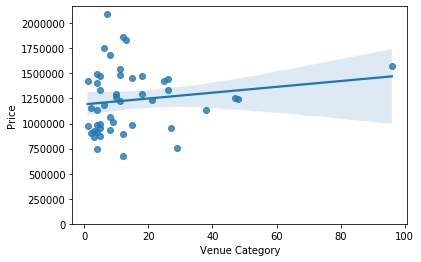

In [366]:
# linear regression between price & venue category count
a = inner_join_N_M_h_df[['Venue Category']]
b = inner_join_N_M_h_df[['Price']]
lm.fit(a,b) # fit the model using Year
bhat = lm.predict(a)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(a, b))
print("Mean Square Error is %.2f" % mean_squared_error(bhat, b))
print("Mean absolute Error is %.2f" % mean_absolute_error(bhat, b))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(bhat, b)))
sns.regplot(x="Venue Category", y="Price", data=inner_join_df)
plt.ylim(0,)

In [369]:
# let's group rows by neighborhood and by taking the sum of the frequency of occurrence of each category
north_metropolitan_h_df = north_metropolitan_h_onehot.groupby('Neighborhood').sum().reset_index()
north_metropolitan_h_df.reset_index(drop=True, inplace=True)
print(north_metropolitan_h_df.shape)
north_metropolitan_h_df.head()

(42, 179)


,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yunnan Restaurant,Zoo
0,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Alphington,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Broadmeadows,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brunswick,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,Brunswick East,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [370]:
joined_venues_price_N_M_h_df= pd.merge(df_N_M_h_suburb, north_metropolitan_h_df, on='Neighborhood', how='inner')
joined_venues_price_N_M_h_df.head()


,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yunnan Restaurant,Zoo
0,Abbotsford,2.600000,1.227150e+06,2.687500,1.350000,1.025000,199.338000,1927.750000,-37.803850,144.996577,...,0,0,1,0,0,0,0,0,0,0
1,Alphington,3.470588,1.627971e+06,6.070588,1.764706,2.058824,536.809412,1954.529412,-37.777472,145.028696,...,1,0,0,0,0,0,0,0,0,0
2,Broadmeadows,3.166667,6.020000e+05,14.000000,1.166667,2.066667,575.436000,1967.800000,-37.684539,144.924958,...,0,0,0,0,0,0,0,0,0,0
3,Brunswick,3.000000,1.224454e+06,5.200000,1.364286,1.235714,387.463429,1921.014286,-37.766012,144.962357,...,0,1,0,0,1,0,0,0,0,0
4,Brunswick East,2.869565,1.215109e+06,4.239130,1.434783,1.369565,302.550435,1927.586957,-37.771393,144.976192,...,0,0,0,0,0,0,0,1,0,0


In [371]:
x_data = joined_venues_price_N_M_h_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])
y_data = np.array(joined_venues_price_N_M_h_df['Price']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
lre=LinearRegression()
lre.fit(x_train, y_train)
Yhat=lre.predict(x_data)
YPred=lre.predict(x_test)
print('R2-score:', r2_score(y_test, YPred)) # r2 score
print('Mean Squared Error:', mean_squared_error(y_test, YPred)) # mse
print('Mean absolute Error is', mean_absolute_error(y_test, YPred))
print('Root Mean Squared Error is', sqrt(mean_squared_error(y_test, YPred)))

R2-score: 0.40598448240919993
Mean Squared Error: 52785756799.24172
Mean absolute Error is 192995.79295400027
Root Mean Squared Error is 229751.5109835879


# Randon Forest Regression

In [372]:
scaler=StandardScaler()
y_data = joined_venues_price_N_M_h_df['Price']
x_data = joined_venues_price_N_M_h_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
x_train_scaled = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test1 = pd.DataFrame(x_test_scaled)

In [373]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# parameters to search over with cross-validation

grid_params = [
    {
        "n_estimators": [10, 50, 100],
        "max_depth": [3, 6, 8, 10, None],
        "min_samples_leaf": [1, 2, 5],
    }
]
clf = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, scoring="r2", n_jobs=2)
clf.fit(x_train1, y_train)

print("Best parameter values: %r\n" % clf.best_params_)

Best parameter values: {'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 10}



In [374]:
def try_different_method(method):
    method.fit(x_train1, y_train)
    y_pred = method.predict(x_test1)

    y_test_temp = y_test.reset_index(drop=True)
    order = y_pred.argsort(axis=0)
    y_pred = y_pred[order]
    y_test_temp = y_test_temp[order]

    #     maer = np.mean(abs(y_pred - y_test_temp) / y_test_temp)
    mse = metrics.mean_squared_error(y_test_temp, y_pred)
    r2 = metrics.r2_score(y_test_temp, y_pred)

    plt.figure(figsize=(10, 6))
    plt.plot(
        np.arange(len(y_pred)),
        y_test_temp,
        "ro",
        markersize=4,
        label="list price",
        alpha=0.5,
    )
    plt.plot(
        np.arange(len(y_pred)),
        y_pred,
        "bo-",
        markersize=4,
        label="predict price",
        alpha=0.9,
    )

    plt.grid()
    plt.title("MSE: %f" % mse)
    print("mean_squared_error: %f" % mse)
    print("r2: %f" % r2)
    #     print('mean_abs_error_rate: %f' % maer)
    plt.legend()
    return (r2, mse)



In [375]:
scores = pd.DataFrame()

mean_squared_error: 87729913381.399170
r2: 0.012746


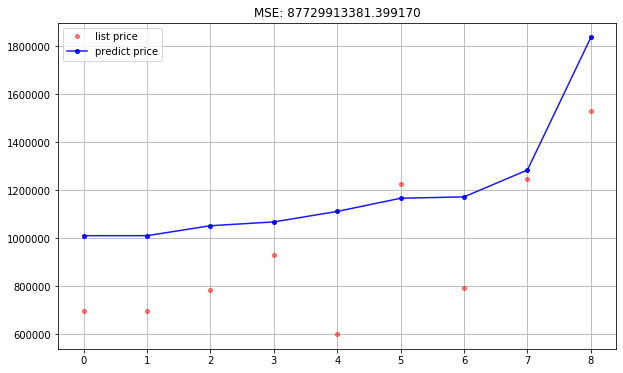

In [376]:
# RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=clf.best_params_["n_estimators"],
    criterion="mse",
    max_depth=clf.best_params_["max_depth"],
    min_samples_leaf=clf.best_params_["min_samples_leaf"],
    n_jobs=2,
    random_state=None,
)

performance_rf = try_different_method(rf)

scores.loc[0, "Random Forest"] = performance_rf[0]
scores.loc[1, "Random Forest"] = performance_rf[1]

In [377]:
features = joined_venues_price_N_M_h_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

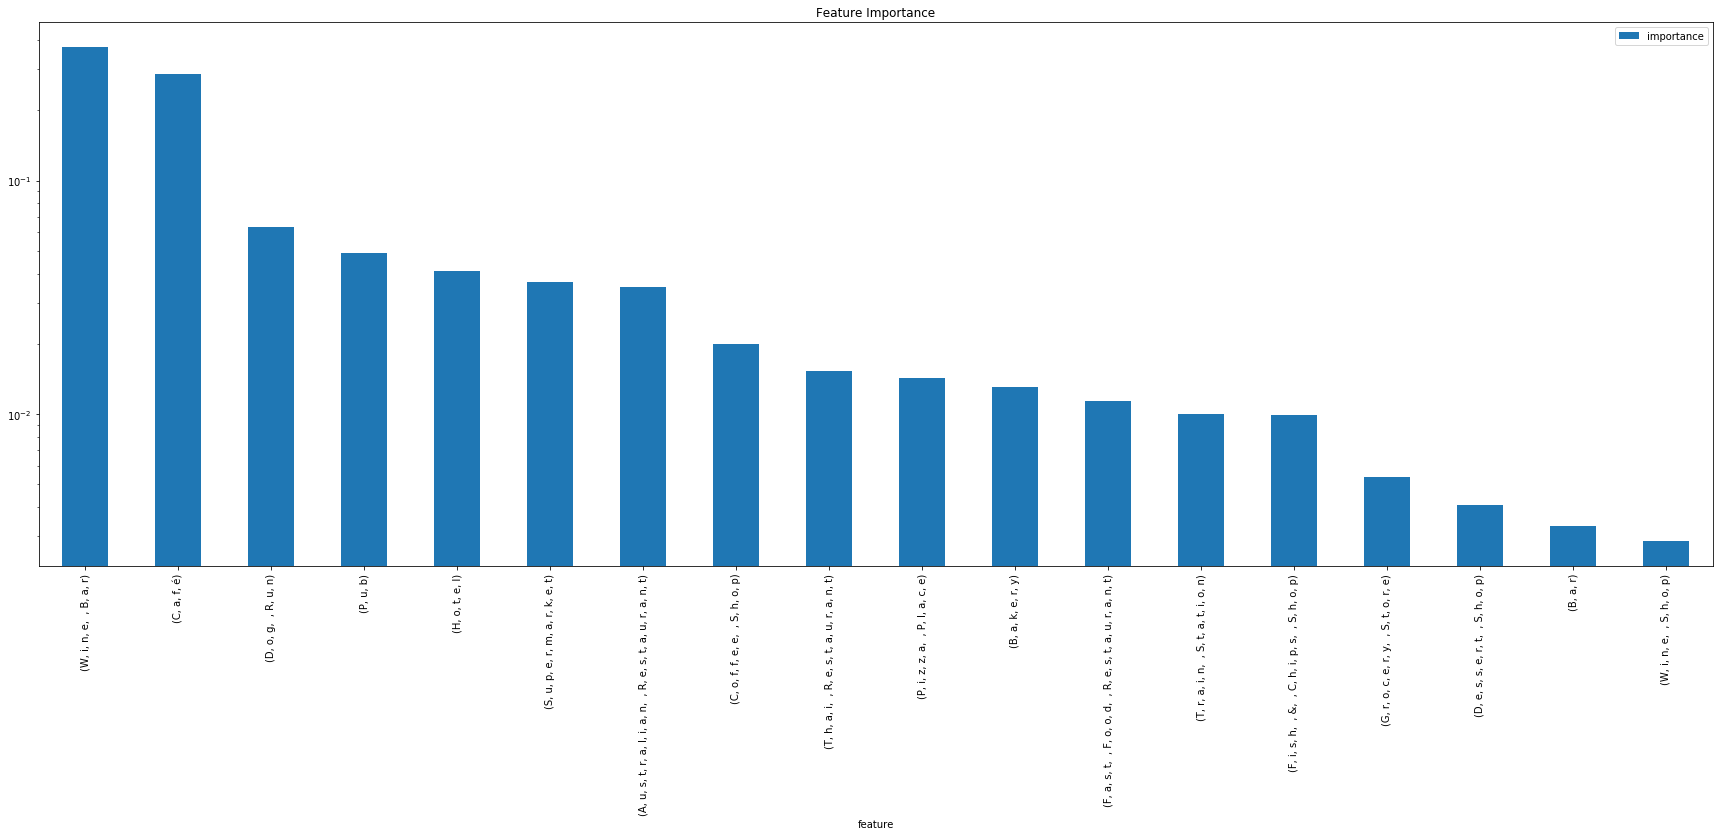

In [378]:
importance = pd.DataFrame({"feature": features, "importance": rf.feature_importances_})
importance.sort_values(by="importance", axis=0, ascending=False, inplace=True)
importance[:18].plot(
    x="feature",
    y="importance",
    kind="bar",
    figsize=(30, 10),
    title="Feature Importance",
    logy=True,
)

Above developed random forest regression feature importance shows venues with respect to their importance on average property prices of neighbourhoods, out of these the top three venues which plays a vital role in increasing the price of house in North Metropolitan are as follow;

Wine Bar  
Cafe  
Dog Run

In [185]:
# creating dataframe group by suburb for type = unit in North Metropolitan Region
df_N_M_u_suburb = df_N_M_u.groupby(('Suburb'),as_index=False).mean()
df_N_M_u_suburb['Price'].head(10)

0    642400.000000
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6    475833.333333
7              NaN
8              NaN
9              NaN
Name: Price, dtype: float64

In [186]:
df_N_M_u_suburb.dropna(subset=["Price"], axis=0, inplace=True)
df_N_M_u_suburb.shape

(43, 12)

In [187]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'APNMGCNGOXACHALHUQD11BAE4KSFWHVPRH5TM5G0QSHX4SXY' # your Foursquare ID
CLIENT_SECRET = 'H5XFJ4QODH0YAVHQPNYMO2TDIWGIBXT3KCW1HT0XMII4RL1Y' # your Foursquare Secret
VERSION = '20200908' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: APNMGCNGOXACHALHUQD11BAE4KSFWHVPRH5TM5G0QSHX4SXY
CLIENT_SECRET:H5XFJ4QODH0YAVHQPNYMO2TDIWGIBXT3KCW1HT0XMII4RL1Y


In [188]:
# Get the neighborhood's latitude and longitude values.
neighborhood_latitude_N_M_u = df_N_M_u_suburb.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude_N_M_u = df_N_M_u_suburb.loc[0, 'Longtitude'] # neighborhood longitude value

neighborhood_name_N_M_u = df_N_M_u_suburb.loc[0, 'Suburb'] # suburb name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name_N_M_u, 
                                                               neighborhood_latitude_N_M_u, 
                                                               neighborhood_longitude_N_M_u))

Latitude and longitude values of Abbotsford are -37.805143, 144.999349.


In [189]:
# let's get the top 100 venues that are in Abbotsford within a radius of 500 meters
# First, let's create the GET request URL. Name your URL url.
LIMIT = 100
radius = 500

# create url
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude_N_M_u, 
    neighborhood_longitude_N_M_u, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=APNMGCNGOXACHALHUQD11BAE4KSFWHVPRH5TM5G0QSHX4SXY&client_secret=H5XFJ4QODH0YAVHQPNYMO2TDIWGIBXT3KCW1HT0XMII4RL1Y&v=20200908&ll=-37.805143,144.999349&radius=500&limit=100'

In [190]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f58ca6455b7f95c9282aa28'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 11,
  'suggestedBounds': {'ne': {'lat': -37.8006429955, 'lng': 145.00503385320215},
   'sw': {'lat': -37.8096430045, 'lng': 144.99366414679784}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5ccacbf964a520424429e3',
       'name': 'Three Bags Full',
       'location': {'address': '60 Nicholson St',
        'lat': -37.8073178966101,
        'lng': 144.99660278995051,
        'labeledLatLngs': [{'label': 'display',
          'lat': -37.8073178966101,
          'lng': 144.99660278995051}],
        'distance': 341,
        'postalCode': '3067',
        

In [191]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [192]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

C:\Users\Lajpat Rai\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Three Bags Full,Café,-37.807318,144.996603
1,The Kitchen at Weylandts,Café,-37.805311,144.997345
2,Lentil As Anything,Vegetarian / Vegan Restaurant,-37.802724,145.003507
3,The Park Hotel,Pub,-37.802769,144.997029
4,Slow Food Market,Farmers Market,-37.802481,145.003597
5,Abbotsford Convent Gardens,Garden,-37.802454,145.003510
6,Retreat Hotel,Pub,-37.801126,144.997548
7,Mavis the Grocer,Convenience Store,-37.803110,144.997020
8,Salvos Store,Thrift / Vintage Store,-37.805980,144.998260
9,Kappaya Japanese Soul Food,Japanese Restaurant,-37.802590,145.003582


In [193]:
# how many vanues were returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

11 venues were returned by Foursquare.


In [194]:
# Let's create a function to repeat the same process to all the neighborhoods in Northern Metropolitan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [195]:
# write the code to run the above function on each neighborhood and create a new dataframe called north_metropolitan_venues.
north_metropolitan_venues = getNearbyVenues(names=df_N_M_u_suburb['Suburb'],
                                   latitudes=df_N_M_u_suburb['Latitude'],
                                   longitudes=df_N_M_u_suburb['Longtitude']
                                  )

Abbotsford
Alphington
Broadmeadows
Brunswick
Brunswick East
Brunswick West
Burnley
Carlton
Carlton North
Clifton Hill
Coburg
Coburg North
Collingwood
Cremorne
East Melbourne
Epping
Fairfield
Fawkner
Fitzroy
Fitzroy North
Flemington
Glenroy
Greensborough
Hadfield
Kensington
Kingsbury
Lalor
Meadow Heights
Melbourne
Mill Park
North Melbourne
Northcote
Oak Park
Parkville
Pascoe Vale
Preston
Reservoir
Richmond
Thomastown
Thornbury
Watsonia
West Melbourne
Westmeadows


In [196]:
# size of dataframe
print(north_metropolitan_venues.shape)
north_metropolitan_venues.head()

(918, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsford,-37.805143,144.999349,Three Bags Full,-37.807318,144.996603,Café
1,Abbotsford,-37.805143,144.999349,The Kitchen at Weylandts,-37.805311,144.997345,Café
2,Abbotsford,-37.805143,144.999349,Lentil As Anything,-37.802724,145.003507,Vegetarian / Vegan Restaurant
3,Abbotsford,-37.805143,144.999349,The Park Hotel,-37.802769,144.997029,Pub
4,Abbotsford,-37.805143,144.999349,Slow Food Market,-37.802481,145.003597,Farmers Market


In [344]:
# how many venues were returned for each neighborhood
df_N_M_u_suburb_venues = north_metropolitan_venues.groupby('Neighborhood').count()
df_N_M_u_suburb_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbotsford,11,11,11,11,11,11
Alphington,8,8,8,8,8,8
Broadmeadows,1,1,1,1,1,1
Brunswick,54,54,54,54,54,54
Brunswick East,33,33,33,33,33,33
Brunswick West,8,8,8,8,8,8
Burnley,18,18,18,18,18,18
Carlton,53,53,53,53,53,53
Carlton North,26,26,26,26,26,26


In [198]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(north_metropolitan_venues['Venue Category'].unique())))

There are 178 uniques categories.


## Analyzing each neighbourhoud

In [351]:
# one hot encoding
north_metropolitan_u_onehot = pd.get_dummies(north_metropolitan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
north_metropolitan_u_onehot['Neighborhood'] = north_metropolitan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [north_metropolitan_u_onehot.columns[-1]] + list(north_metropolitan_u_onehot.columns[:-1])
north_metropolitanut_onehot = north_metropolitan_u_onehot[fixed_columns]

north_metropolitan_u_onehot.head()

,Adult Boutique,Afghan Restaurant,African Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yunnan Restaurant,Zoo,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abbotsford
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abbotsford
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Abbotsford
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abbotsford
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Abbotsford


In [352]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
north_metropolitan_u_grouped = north_metropolitan_u_onehot.groupby('Neighborhood').mean().reset_index()
north_metropolitan_u_grouped

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yunnan Restaurant,Zoo
0,Abbotsford,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.090909,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Alphington,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Broadmeadows,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,Brunswick,0.000000,0.018519,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.018519,0.000000,0.000000,0.018519,0.00,0.000000,0.000000,0.000000,0.000000
4,Brunswick East,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.030303,0.000000,0.000000
5,Brunswick West,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,Burnley,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.055556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,Carlton,0.000000,0.000000,0.000000,0.00,0.018868,0.000000,0.018868,0.000000,0.000000,...,0.000000,0.000000,0.018868,0.000000,0.000000,0.00,0.000000,0.000000,0.018868,0.000000
8,Carlton North,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.038462,0.000000,0.000000,0.000000,0.00,0.076923,0.000000,0.000000,0.000000
9,Clifton Hill,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


In [201]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in north_metropolitan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = north_metropolitan_grouped[north_metropolitan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 4})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Abbotsford----
                    venue    freq
0  Thrift / Vintage Store  0.1818
1                     Pub  0.1818
2                    Café  0.1818
3                  Garden  0.0909
4     Japanese Restaurant  0.0909


----Alphington----
                  venue   freq
0  Fast Food Restaurant  0.125
1       Thai Restaurant  0.125
2                  Café  0.125
3     Convenience Store  0.125
4        Farmers Market  0.125


----Broadmeadows----
                  venue  freq
0  Fast Food Restaurant   1.0
1        Adult Boutique   0.0
2      Ramen Restaurant   0.0
3         Movie Theater   0.0
4           Music Store   0.0


----Brunswick----
                venue    freq
0                Café  0.1852
1                 Bar  0.0926
2       Grocery Store  0.0556
3  Light Rail Station  0.0370
4         Pizza Place  0.0370


----Brunswick East----
                       venue    freq
0                       Café  0.1818
1                        Bar  0.1212
2         Light Rail Station  0

In [202]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [203]:
# let's create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = north_metropolitan_grouped['Neighborhood']

for ind in np.arange(north_metropolitan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(north_metropolitan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbotsford,Pub,Café,Thrift / Vintage Store,Convenience Store,Vegetarian / Vegan Restaurant,Japanese Restaurant,Garden,Farmers Market,Falafel Restaurant,Food
1,Alphington,Thai Restaurant,Convenience Store,Gym,Liquor Store,Café,Train Station,Fast Food Restaurant,Farmers Market,Zoo,Food
2,Broadmeadows,Fast Food Restaurant,Zoo,Cupcake Shop,Football Stadium,Food Truck,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop
3,Brunswick,Café,Bar,Grocery Store,Pizza Place,Supermarket,Thai Restaurant,Light Rail Station,Coffee Shop,Pool,Pharmacy
4,Brunswick East,Café,Bar,Light Rail Station,Middle Eastern Restaurant,Gym / Fitness Center,Latin American Restaurant,Pizza Place,Convenience Store,Pub,Sake Bar


In [345]:
df_N_M_u_suburb.rename(columns = {'Suburb':'Neighborhood'}, inplace = True)
inner_join_N_M_u_df= pd.merge(df_N_M_u_suburb, df_N_M_u_suburb_venues, on='Neighborhood', how='inner')
inner_join_N_M_u_df.shape

(42, 18)

The coefficient is:  [[1914.45719809]]
The intercept is:  [492031.79498643]
The R-square is 0.12
Mean Square Error is 15517318572.45
Mean absolute Error is 85585.45
Root Mean Squared Error is 124568.53


(0, 2169087.5166942603)

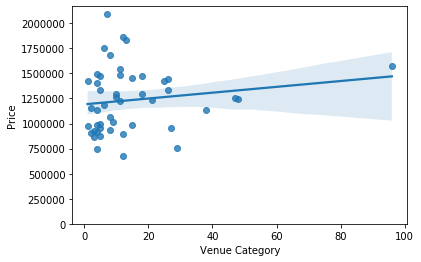

In [346]:
# linear regression between price & venue category count
a = inner_join_N_M_u_df[['Venue Category']]
b = inner_join_N_M_u_df[['Price']]
lm.fit(a,b) # fit the model using Year
bhat = lm.predict(a)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(a, b))
print("Mean Square Error is %.2f" % mean_squared_error(bhat, b))
print("Mean absolute Error is %.2f" % mean_absolute_error(bhat, b))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(bhat, b)))
sns.regplot(x="Venue Category", y="Price", data=inner_join_df)
plt.ylim(0,)

In [353]:
# let's group rows by neighborhood and by taking the sum of the frequency of occurrence of each category
north_metropolitan_u_df = north_metropolitan_u_onehot.groupby('Neighborhood').sum().reset_index()
north_metropolitan_u_df.reset_index(drop=True, inplace=True)
print(north_metropolitan_u_df.shape)
north_metropolitan_u_df.head()

(42, 179)


,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yunnan Restaurant,Zoo
0,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Alphington,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Broadmeadows,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brunswick,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,Brunswick East,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [354]:
joined_venues_price_N_M_u_df= pd.merge(df_N_M_u_suburb, north_metropolitan_u_df, on='Neighborhood', how='inner')
joined_venues_price_N_M_u_df.head()

,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yunnan Restaurant,Zoo
0,Abbotsford,1.900000,642400.000000,2.800000,1.400000,1.000000,455.128000,1998.400000,-37.805143,144.999349,...,0,0,1,0,0,0,0,0,0,0
1,Alphington,2.000000,475833.333333,6.400000,1.000000,1.000000,29.333333,1961.666667,-37.778967,145.029400,...,1,0,0,0,0,0,0,0,0,0
2,Broadmeadows,2.000000,355000.000000,14.000000,1.000000,1.000000,347.380000,2008.500000,-37.683500,144.924770,...,0,0,0,0,0,0,0,0,0,0
3,Brunswick,1.775000,525875.000000,5.200000,1.025000,1.075000,259.752000,1979.325000,-37.767137,144.961819,...,0,1,0,0,1,0,0,0,0,0
4,Brunswick East,1.722222,516472.222222,4.277778,1.055556,1.111111,303.126667,1990.666667,-37.772754,144.975199,...,0,0,0,0,0,0,0,1,0,0


In [355]:
x_data = joined_venues_price_N_M_u_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])
y_data = np.array(joined_venues_price_N_M_u_df['Price']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
lre=LinearRegression()
lre.fit(x_train, y_train)
Yhat=lre.predict(x_data)
YPred=lre.predict(x_test)
print('R2-score:', r2_score(y_test, YPred)) # r2 score
print('Mean Squared Error:', mean_squared_error(y_test, YPred)) # mse
print('Mean absolute Error is', mean_absolute_error(y_test, YPred))
print('Root Mean Squared Error is', sqrt(mean_squared_error(y_test, YPred)))

R2-score: -0.6752453607079889
Mean Squared Error: 10377912691.922396
Mean absolute Error is 79041.7666156149
Root Mean Squared Error is 101872.04077627185


# Random Forest Regression

In [356]:
scaler=StandardScaler()
y_data = joined_venues_price_N_M_u_df['Price']
x_data = joined_venues_price_N_M_u_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
x_train_scaled = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test1 = pd.DataFrame(x_test_scaled)

In [357]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# parameters to search over with cross-validation

grid_params = [
    {
        "n_estimators": [10, 50, 100],
        "max_depth": [3, 6, 8, 10, None],
        "min_samples_leaf": [1, 2, 5],
    }
]
clf = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, scoring="r2", n_jobs=2)
clf.fit(x_train1, y_train)

print("Best parameter values: %r\n" % clf.best_params_)

Best parameter values: {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 100}



In [358]:
def try_different_method(method):
    method.fit(x_train1, y_train)
    y_pred = method.predict(x_test1)

    y_test_temp = y_test.reset_index(drop=True)
    order = y_pred.argsort(axis=0)
    y_pred = y_pred[order]
    y_test_temp = y_test_temp[order]

    #     maer = np.mean(abs(y_pred - y_test_temp) / y_test_temp)
    mse = metrics.mean_squared_error(y_test_temp, y_pred)
    r2 = metrics.r2_score(y_test_temp, y_pred)

    plt.figure(figsize=(10, 6))
    plt.plot(
        np.arange(len(y_pred)),
        y_test_temp,
        "ro",
        markersize=4,
        label="list price",
        alpha=0.5,
    )
    plt.plot(
        np.arange(len(y_pred)),
        y_pred,
        "bo-",
        markersize=4,
        label="predict price",
        alpha=0.9,
    )

    plt.grid()
    plt.title("MSE: %f" % mse)
    print("mean_squared_error: %f" % mse)
    print("r2: %f" % r2)
    #     print('mean_abs_error_rate: %f' % maer)
    plt.legend()
    return (r2, mse)

In [359]:
scores = pd.DataFrame()

mean_squared_error: 4791486596.529052
r2: 0.226539


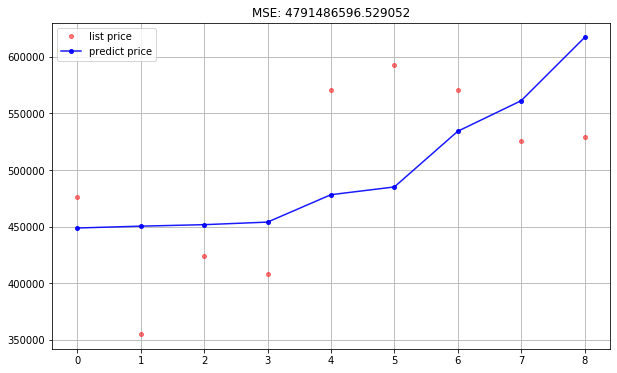

In [360]:
# RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=clf.best_params_["n_estimators"],
    criterion="mse",
    max_depth=clf.best_params_["max_depth"],
    min_samples_leaf=clf.best_params_["min_samples_leaf"],
    n_jobs=2,
    random_state=None,
)

performance_rf = try_different_method(rf)

scores.loc[0, "Random Forest"] = performance_rf[0]
scores.loc[1, "Random Forest"] = performance_rf[1]

In [361]:
features = joined_venues_price_N_M_u_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])


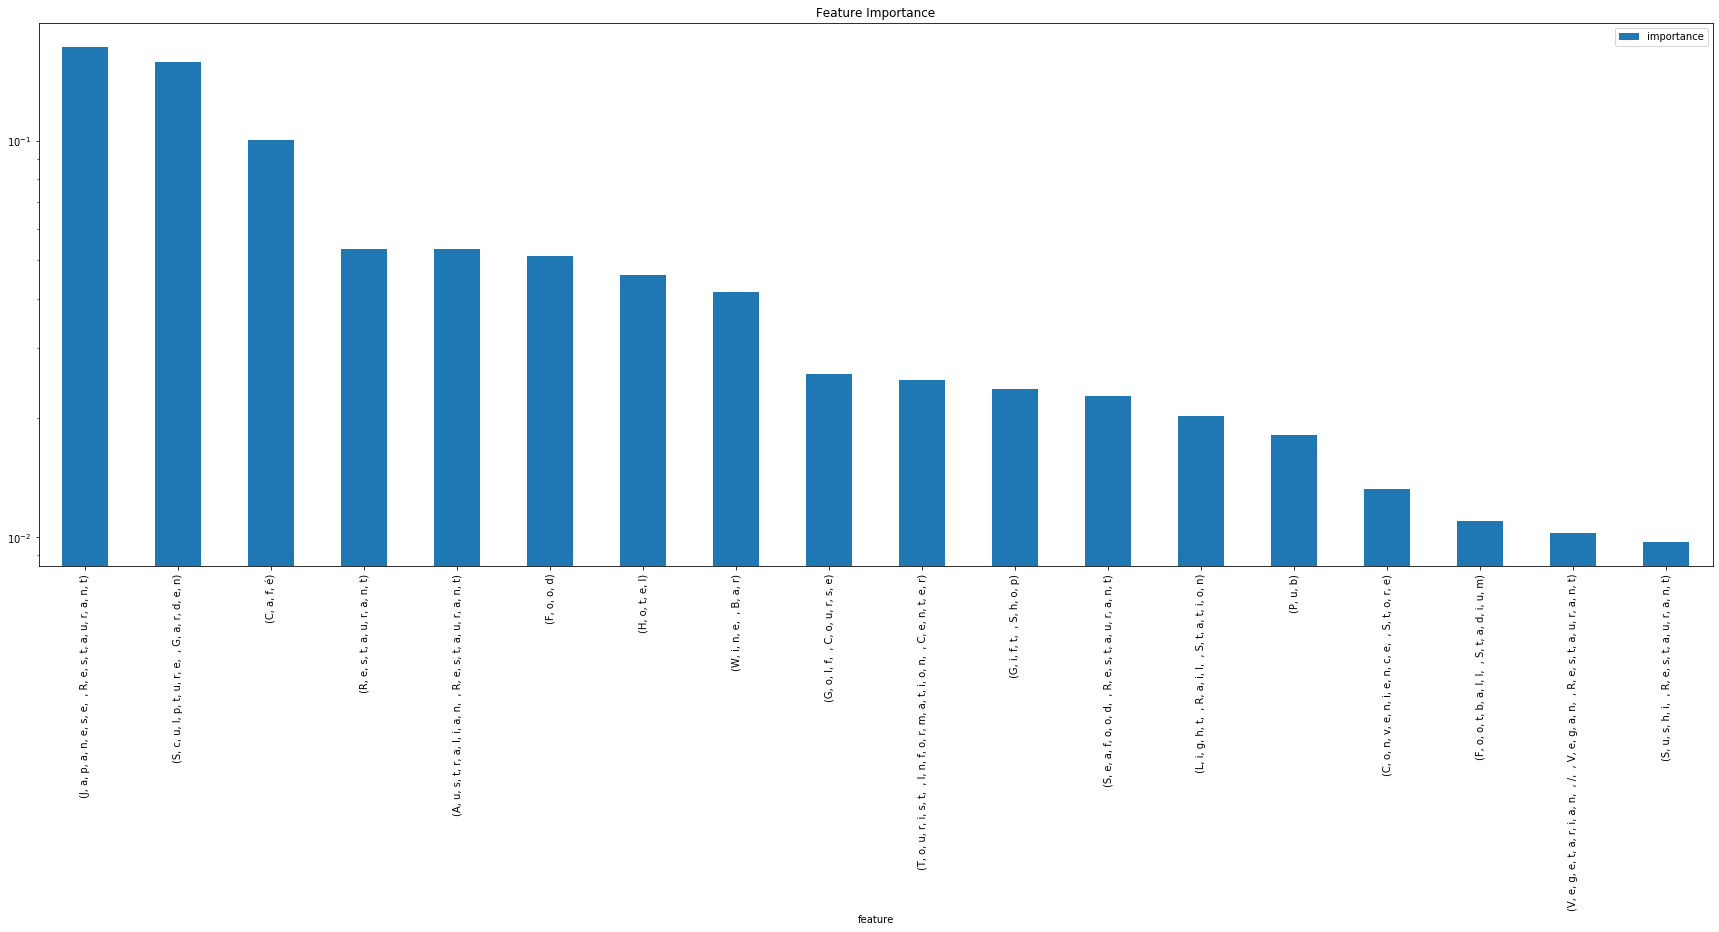

In [362]:
importance = pd.DataFrame({"feature": features, "importance": rf.feature_importances_})
importance.sort_values(by="importance", axis=0, ascending=False, inplace=True)
importance[:18].plot(
    x="feature",
    y="importance",
    kind="bar",
    figsize=(30, 10),
    title="Feature Importance",
    logy=True,
)

Above developed random forest regression feature importance shows venues with respect to their importance on average property prices of neighbourhoods, out of these the top three venues which plays a vital role in increasing the price of Unit in North Metropolitan are as follow;

Japanese retaurant   
Sculpture Garden   
Cafe

In [246]:
# creating dataframe group by suburb for type = townhouse in North Metropolitan Region
df_N_M_t_suburb = df_N_M_t.groupby(('Suburb'),as_index=False).mean()
df_N_M_t_suburb.dropna(subset=["Price"], axis=0, inplace=True) # drop the rows where price is missing
df_N_M_t_suburb.rename(columns = {'Suburb':'Neighborhood'}, inplace = True)
df_N_M_t_suburb.head()

,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Year
0,Abbotsford,3.000000,9.000000e+05,2.500000,2.000000,2.000000,0.000000,2010.000000,-37.809300,144.995900,4019.0,2017.000000
6,Alphington,2.500000,1.045000e+06,6.400000,2.000000,2.500000,341.500000,1985.500000,-37.781050,145.031350,2211.0,2016.500000
46,Broadmeadows,2.666667,4.786667e+05,14.000000,1.666667,2.000000,333.586667,2011.000000,-37.683160,144.928927,4294.0,2017.333333
49,Brunswick,2.444444,7.573889e+05,5.200000,1.722222,1.111111,401.917778,1985.111111,-37.767193,144.961547,11918.0,2016.444444
50,Brunswick East,2.909091,9.017727e+05,4.272727,1.909091,1.272727,161.501818,2002.818182,-37.768276,144.977147,5533.0,2016.545455


In [205]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'APNMGCNGOXACHALHUQD11BAE4KSFWHVPRH5TM5G0QSHX4SXY' # your Foursquare ID
CLIENT_SECRET = 'H5XFJ4QODH0YAVHQPNYMO2TDIWGIBXT3KCW1HT0XMII4RL1Y' # your Foursquare Secret
VERSION = '20200909' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: APNMGCNGOXACHALHUQD11BAE4KSFWHVPRH5TM5G0QSHX4SXY
CLIENT_SECRET:H5XFJ4QODH0YAVHQPNYMO2TDIWGIBXT3KCW1HT0XMII4RL1Y


In [206]:
# Let's create a function to extract nearby venues for type = townhouse all the neighborhoods in Northern Metropolitan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [209]:
print("number of NaN values for the column Latitude :", df_N_M_t_suburb['Latitude'].isnull().sum())
print("number of NaN values for the column Longitude :", df_N_M_t_suburb['Longtitude'].isnull().sum())

number of NaN values for the column Latitude : 2
number of NaN values for the column Longitude : 2


In [210]:
df_N_M_t_suburb.dropna(subset=["Latitude"], axis=0, inplace=True) # drop the rows where NaN
df_N_M_t_suburb.dropna(subset=["Longtitude"], axis=0, inplace=True) # drop the rows where NaN
df_N_M_t_suburb.shape

(41, 12)

In [211]:
# write the code to run the above function on each neighborhood and create a new dataframe called north_metropolitan_townhouse_venues.
north_metropolitan_townhouse_venues = getNearbyVenues(names=df_N_M_t_suburb['Suburb'],
                                   latitudes=df_N_M_t_suburb['Latitude'],
                                   longitudes=df_N_M_t_suburb['Longtitude']
                                  )

Abbotsford
Alphington
Broadmeadows
Brunswick
Brunswick East
Brunswick West
Bundoora
Carlton
Carlton North
Clifton Hill
Coburg
Coburg North
Collingwood
Craigieburn
Cremorne
East Melbourne
Fairfield
Fawkner
Fitzroy
Fitzroy North
Flemington
Glenroy
Hadfield
Jacana
Kensington
Meadow Heights
Mernda
North Melbourne
Northcote
Oak Park
Pascoe Vale
Preston
Reservoir
Richmond
Roxburgh Park
South Morang
Thomastown
Thornbury
West Melbourne
Westmeadows
Wollert


In [212]:
# size of dataframe
print(north_metropolitan_townhouse_venues.shape)
north_metropolitan_townhouse_venues.head()

(704, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsford,-37.8093,144.9959,Au79,-37.808806,144.996035,Café
1,Abbotsford,-37.8093,144.9959,Three Bags Full,-37.807318,144.996603,Café
2,Abbotsford,-37.8093,144.9959,Nhu Lan Bakery,-37.810375,144.996708,Bakery
3,Abbotsford,-37.8093,144.9959,Minh Phat Supermarket,-37.809652,144.996163,Grocery Store
4,Abbotsford,-37.8093,144.9959,Quan 88,-37.809941,144.994634,Vietnamese Restaurant


In [330]:
# how many venues were returned for each neighborhood
df_N_M_t_suburb_venues= north_metropolitan_townhouse_venues.groupby('Neighborhood').count()
df_N_M_t_suburb_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbotsford,54,54,54,54,54,54
Alphington,7,7,7,7,7,7
Broadmeadows,2,2,2,2,2,2
Brunswick,54,54,54,54,54,54
Brunswick East,20,20,20,20,20,20
Brunswick West,9,9,9,9,9,9
Bundoora,2,2,2,2,2,2
Carlton,37,37,37,37,37,37
Carlton North,21,21,21,21,21,21


In [214]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(north_metropolitan_townhouse_venues['Venue Category'].unique())))

There are 154 uniques categories.


In [215]:
# one hot encoding
north_metropolitan_t_onehot = pd.get_dummies(north_metropolitan_townhouse_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
north_metropolitan_t_onehot['Neighborhood'] = north_metropolitan_townhouse_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [north_metropolitan_t_onehot.columns[-1]] + list(north_metropolitan_t_onehot.columns[:-1])
north_metropolitan_t_onehot = north_metropolitan_t_onehot[fixed_columns]

north_metropolitan_t_onehot.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Tibetan Restaurant,Track,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop
0,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [216]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
north_metropolitan_t_grouped = north_metropolitan_t_onehot.groupby('Neighborhood').mean().reset_index()
north_metropolitan_t_grouped

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Tibetan Restaurant,Track,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop
0,Abbotsford,0.018519,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.037037,0.000000,0.314815,0.00,0.000000,0.000000
1,Alphington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.142857,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Broadmeadows,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Brunswick,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.018519,0.000000,0.000000,0.018519,0.00,0.000000,0.000000
4,Brunswick East,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Brunswick West,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Bundoora,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Carlton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.027027,0.000000,0.000000,0.00,0.027027,0.000000
8,Carlton North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.047619,0.000000
9,Clifton Hill,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [331]:
df_N_M_t_suburb.rename(columns = {'Suburb':'Neighborhood'}, inplace = True)
inner_join_N_M_t_df= pd.merge(df_N_M_t_suburb, df_N_M_t_suburb_venues, on='Neighborhood', how='inner')
inner_join_N_M_t_df.shape

(41, 18)

The coefficient is:  [[8940.17191845]]
The intercept is:  [602946.22298791]
The R-square is 0.37
Mean Square Error is 44744536698.53
Mean absolute Error is 174310.77
Root Mean Squared Error is 211529.04


(0, 2169087.5166942603)

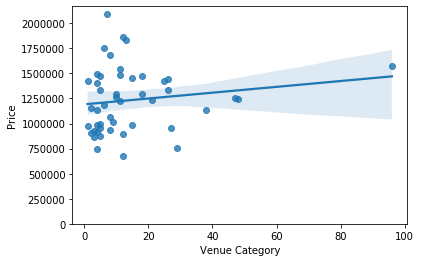

In [332]:
# linear regression between price & venue category count
a = inner_join_N_M_t_df[['Venue Category']]
b = inner_join_N_M_t_df[['Price']]
lm.fit(a,b) # fit the model using Year
bhat = lm.predict(a)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(a, b))
print("Mean Square Error is %.2f" % mean_squared_error(bhat, b))
print("Mean absolute Error is %.2f" % mean_absolute_error(bhat, b))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(bhat, b)))
sns.regplot(x="Venue Category", y="Price", data=inner_join_df)
plt.ylim(0,)

In [333]:
# let's group rows by neighborhood and by taking the sum of the frequency of occurrence of each category
north_metropolitan_t_df = north_metropolitan_t_onehot.groupby('Neighborhood').sum().reset_index()
north_metropolitan_t_df.reset_index(drop=True, inplace=True)
print(north_metropolitan_t_df.shape)
north_metropolitan_t_df.head()

(41, 155)


,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Tibetan Restaurant,Track,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop
0,Abbotsford,1,0,0,0,2,0,0,0,0,...,0,0,0,0,2,0,17,0,0,0
1,Alphington,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Broadmeadows,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brunswick,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,Brunswick East,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [334]:
joined_venues_price_N_M_t_df= pd.merge(df_N_M_t_suburb, north_metropolitan_t_df, on='Neighborhood', how='inner')
joined_venues_price_N_M_t_df.head()

,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,...,Tibetan Restaurant,Track,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop
0,Abbotsford,3.000000,9.000000e+05,2.500000,2.000000,2.000000,0.000000,2010.000000,-37.809300,144.995900,...,0,0,0,0,2,0,17,0,0,0
1,Alphington,2.500000,1.045000e+06,6.400000,2.000000,2.500000,341.500000,1985.500000,-37.781050,145.031350,...,0,0,1,0,0,0,0,0,0,0
2,Broadmeadows,2.666667,4.786667e+05,14.000000,1.666667,2.000000,333.586667,2011.000000,-37.683160,144.928927,...,0,0,0,0,0,0,0,0,0,0
3,Brunswick,2.444444,7.573889e+05,5.200000,1.722222,1.111111,401.917778,1985.111111,-37.767193,144.961547,...,0,0,0,1,0,0,1,0,0,0
4,Brunswick East,2.909091,9.017727e+05,4.272727,1.909091,1.272727,161.501818,2002.818182,-37.768276,144.977147,...,0,0,0,0,0,0,0,0,0,0


In [335]:
x_data = joined_venues_price_N_M_t_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])
y_data = np.array(joined_venues_price_N_M_t_df['Price']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
lre=LinearRegression()
lre.fit(x_train, y_train)
Yhat=lre.predict(x_data)
YPred=lre.predict(x_test)
print('R2-score:', r2_score(y_test, YPred)) # r2 score
print('Mean Squared Error:', mean_squared_error(y_test, YPred)) # mse
print('Mean absolute Error is', mean_absolute_error(y_test, YPred))
print('Root Mean Squared Error is', sqrt(mean_squared_error(y_test, YPred)))

R2-score: 0.23123986339666258
Mean Squared Error: 52362362047.8696
Mean absolute Error is 180036.4097299547
Root Mean Squared Error is 228828.23699856098


# Random Forest Regression

In [336]:
scaler=StandardScaler()
y_data = joined_venues_price_N_M_t_df['Price']
x_data = joined_venues_price_N_M_t_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
x_train_scaled = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test1 = pd.DataFrame(x_test_scaled)

In [337]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# parameters to search over with cross-validation

grid_params = [
    {
        "n_estimators": [10, 50, 100],
        "max_depth": [3, 6, 8, 10, None],
        "min_samples_leaf": [1, 2, 5],
    }
]
clf = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, scoring="r2", n_jobs=2)
clf.fit(x_train1, y_train)

print("Best parameter values: %r\n" % clf.best_params_)


Best parameter values: {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 50}



In [338]:
def try_different_method(method):
    method.fit(x_train1, y_train)
    y_pred = method.predict(x_test1)

    y_test_temp = y_test.reset_index(drop=True)
    order = y_pred.argsort(axis=0)
    y_pred = y_pred[order]
    y_test_temp = y_test_temp[order]

    #     maer = np.mean(abs(y_pred - y_test_temp) / y_test_temp)
    mse = metrics.mean_squared_error(y_test_temp, y_pred)
    r2 = metrics.r2_score(y_test_temp, y_pred)

    plt.figure(figsize=(10, 6))
    plt.plot(
        np.arange(len(y_pred)),
        y_test_temp,
        "ro",
        markersize=4,
        label="list price",
        alpha=0.5,
    )
    plt.plot(
        np.arange(len(y_pred)),
        y_pred,
        "bo-",
        markersize=4,
        label="predict price",
        alpha=0.9,
    )

    plt.grid()
    plt.title("MSE: %f" % mse)
    print("mean_squared_error: %f" % mse)
    print("r2: %f" % r2)
    #     print('mean_abs_error_rate: %f' % maer)
    plt.legend()
    return (r2, mse)

In [339]:
scores = pd.DataFrame()

mean_squared_error: 28353988659.194729
r2: 0.583720


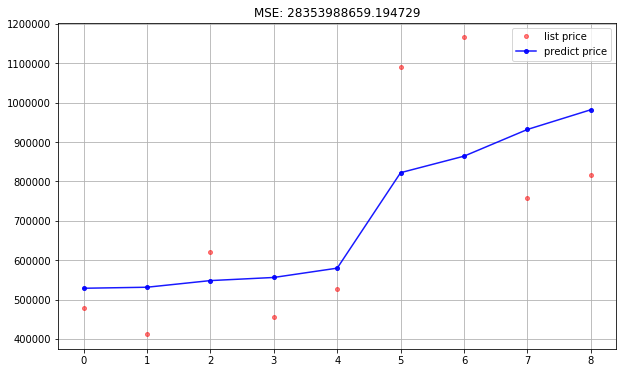

In [340]:
# RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=clf.best_params_["n_estimators"],
    criterion="mse",
    max_depth=clf.best_params_["max_depth"],
    min_samples_leaf=clf.best_params_["min_samples_leaf"],
    n_jobs=2,
    random_state=None,
)

performance_rf = try_different_method(rf)

scores.loc[0, "Random Forest"] = performance_rf[0]
scores.loc[1, "Random Forest"] = performance_rf[1]

In [341]:
features = joined_venues_price_N_M_t_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])


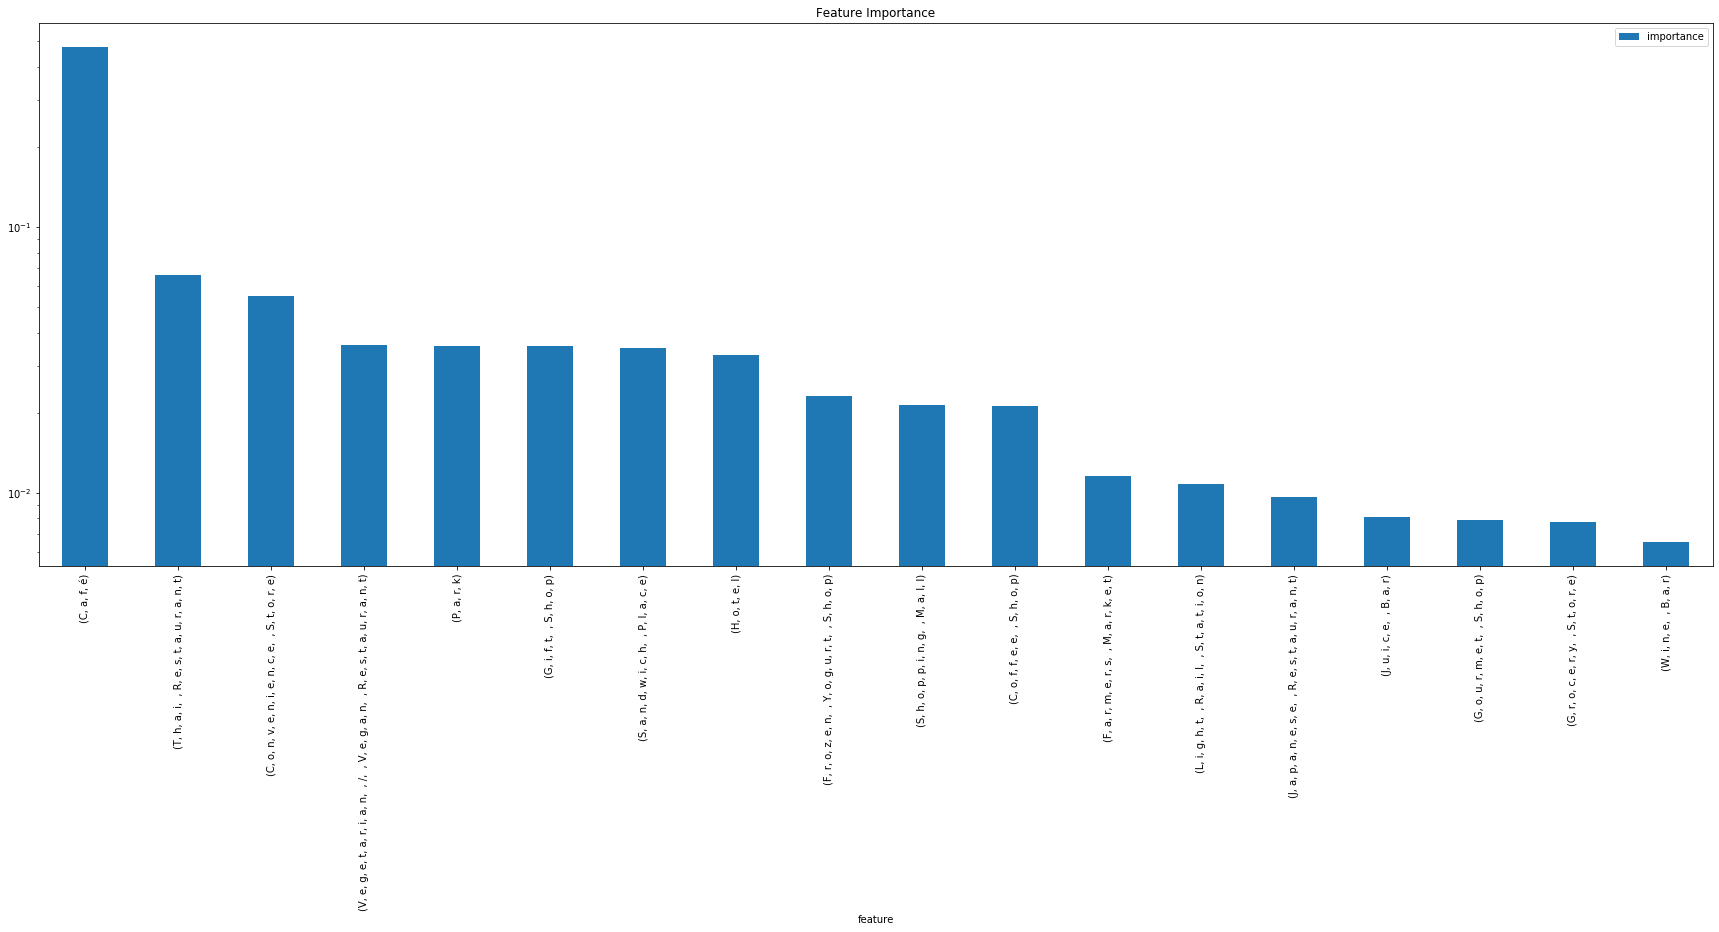

In [342]:
importance = pd.DataFrame({"feature": features, "importance": rf.feature_importances_})
importance.sort_values(by="importance", axis=0, ascending=False, inplace=True)
importance[:18].plot(
    x="feature",
    y="importance",
    kind="bar",
    figsize=(30, 10),
    title="Feature Importance",
    logy=True,
)

Above developed random forest regression feature importance shows venues with respect to their importance on average property prices of neighbourhoods, out of these the top three venues which plays a vital role in increasing the price of town in North Metropolitan are as follow;

Cafe    
Thai Restaurant  
Convenience Store

In [217]:
# creating dataframe group by suburb for type = house in South Metropolitan Region
df_S_M_h_suburb = df_S_M_h.groupby(('Suburb'),as_index=False).mean()
df_S_M_h_suburb.dropna(subset=["Price"], axis=0, inplace=True) # drop the rows where price is missing
df_S_M_h_suburb.shape

(60, 12)

In [218]:
# write the code to run the above function on each neighborhood and create a new dataframe called south_metropolitan_house_venues.
south_metropolitan_house_venues = getNearbyVenues(names=df_S_M_h_suburb['Suburb'],
                                   latitudes=df_S_M_h_suburb['Latitude'],
                                   longitudes=df_S_M_h_suburb['Longtitude']
                                  )

Albert Park
Armadale
Ashburton
Ashwood
Balaclava
Balwyn
Balwyn North
Beaumaris
Bentleigh
Bentleigh East
Black Rock
Brighton
Brighton East
Burwood
Camberwell
Canterbury
Carnegie
Caulfield
Caulfield East
Caulfield North
Caulfield South
Chadstone
Cheltenham
Deepdene
Elsternwick
Elwood
Gardenvale
Glen Huntly
Glen Iris
Hampton
Hampton East
Hawthorn
Hawthorn East
Highett
Hughesdale
Huntingdale
Kew
Kew East
Kooyong
Malvern
Malvern East
McKinnon
Middle Park
Moorabbin
Murrumbeena
Notting Hill
Oakleigh
Oakleigh East
Ormond
Port Melbourne
Prahran
Ripponlea
Sandringham
South Melbourne
South Yarra
Southbank
St Kilda
Surrey Hills
Toorak
Windsor


In [219]:
# size of dataframe
print(south_metropolitan_house_venues.shape)
south_metropolitan_house_venues.head()

(840, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albert Park,-37.844829,144.952361,Jock's,-37.844274,144.951104,Ice Cream Shop
1,Albert Park,-37.844829,144.952361,the guilty moose,-37.845938,144.949854,Breakfast Spot
2,Albert Park,-37.844829,144.952361,Kamel,-37.842094,144.952970,Middle Eastern Restaurant
3,Albert Park,-37.844829,144.952361,Misuzu's,-37.841760,144.953364,Japanese Restaurant
4,Albert Park,-37.844829,144.952361,Avenue Bookstore,-37.841299,144.954035,Bookstore


In [314]:
# how many venues were returned for each neighborhood
df_S_M_h_suburb_venues= south_metropolitan_house_venues.groupby('Neighborhood').count()
df_S_M_h_suburb_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albert Park,29,29,29,29,29,29
Armadale,14,14,14,14,14,14
Ashburton,2,2,2,2,2,2
Ashwood,4,4,4,4,4,4
Balaclava,50,50,50,50,50,50
Balwyn,10,10,10,10,10,10
Balwyn North,1,1,1,1,1,1
Beaumaris,5,5,5,5,5,5
Bentleigh,21,21,21,21,21,21


In [221]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(south_metropolitan_house_venues['Venue Category'].unique())))

There are 167 uniques categories.


In [222]:
# one hot encoding
south_metropolitan_h_onehot = pd.get_dummies(south_metropolitan_house_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
south_metropolitan_h_onehot['Neighborhood'] = south_metropolitan_house_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [south_metropolitan_h_onehot.columns[-1]] + list(south_metropolitan_h_onehot.columns[:-1])
south_metropolitan_h_onehot = south_metropolitan_h_onehot[fixed_columns]

south_metropolitan_h_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bagel Shop,Bakery,Bank,Bar,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
south_metropolitan_h_grouped = south_metropolitan_h_onehot.groupby('Neighborhood').mean().reset_index()
south_metropolitan_h_grouped

,Neighborhood,American Restaurant,Antique Shop,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bagel Shop,Bakery,Bank,Bar,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albert Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.0,0.000000,...,0.000000,0.000000,0.0,0.034483,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,Armadale,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Ashburton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,Ashwood,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,Balaclava,0.000000,0.000000,0.000000,0.000000,0.020000,0.020000,0.020000,0.0,0.040000,...,0.020000,0.020000,0.0,0.040000,0.000000,0.020000,0.000000,0.0,0.000000,0.000000
5,Balwyn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,Balwyn North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,Beaumaris,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,Bentleigh,0.047619,0.000000,0.047619,0.000000,0.000000,0.047619,0.047619,0.0,0.000000,...,0.000000,0.000000,0.0,0.047619,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,Black Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [311]:
df_S_M_h_suburb.rename(columns = {'Suburb':'Neighborhood'}, inplace = True)
df_S_M_h_suburb.head()

,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Year
4,Albert Park,2.975610,2.033585e+06,3.197561,1.634146,0.902439,193.635122,1906.390244,-37.844829,144.952361,3280.0,2016.585366
11,Armadale,3.181818,2.404530e+06,6.300000,1.757576,1.696970,471.796364,1919.545455,-37.857142,145.018721,4836.0,2016.666667
13,Ashburton,3.666667,1.916256e+06,10.733333,2.153846,2.282051,679.512821,1960.794872,-37.868317,145.077331,3052.0,2016.487179
14,Ashwood,3.296296,1.299463e+06,11.459259,1.777778,1.962963,652.333333,1962.296296,-37.864945,145.103705,2894.0,2016.629630
21,Balaclava,2.923077,1.396577e+06,6.476923,1.307692,1.461538,271.578462,1909.461538,-37.869939,144.993969,2952.0,2017.076923


In [315]:
inner_join_S_M_h_df= pd.merge(df_S_M_h_suburb, df_S_M_h_suburb_venues, on='Neighborhood', how='inner')
inner_join_S_M_h_df.shape

(59, 18)

In [224]:
# creating dataframe group by suburb for type =unit in South Metropolitan Region
df_S_M_u_suburb = df_S_M_u.groupby(('Suburb'),as_index=False).mean()
df_S_M_u_suburb.dropna(subset=["Price"], axis=0, inplace=True) # drop the rows where price is missing
df_S_M_u_suburb.shape

(55, 12)

The coefficient is:  [[861.57980096]]
The intercept is:  [1774480.13343581]
The R-square is 0.00
Mean Square Error is 344094991013.26
Mean absolute Error is 460139.32
Root Mean Squared Error is 586596.11


(0, 2169087.5166942603)

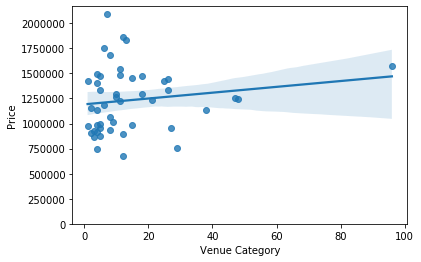

In [316]:
# linear regression between price & Year
a = inner_join_S_M_h_df[['Venue Category']]
b = inner_join_S_M_h_df[['Price']]
lm.fit(a,b) # fit the model using Year
bhat = lm.predict(a)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(a, b))
print("Mean Square Error is %.2f" % mean_squared_error(bhat, b))
print("Mean absolute Error is %.2f" % mean_absolute_error(bhat, b))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(bhat, b)))
sns.regplot(x="Venue Category", y="Price", data=inner_join_df)
plt.ylim(0,)

In [317]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
south_metropolitan_h_df = south_metropolitan_h_onehot.groupby('Neighborhood').sum().reset_index()
south_metropolitan_h_df.reset_index(drop=True, inplace=True)
print(south_metropolitan_h_df.shape)
south_metropolitan_h_df.head()

(59, 168)


,Neighborhood,American Restaurant,Antique Shop,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bagel Shop,Bakery,Bank,Bar,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albert Park,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Armadale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ashburton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ashwood,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Balaclava,0,0,0,0,1,1,1,0,2,...,1,1,0,2,0,1,0,0,0,0


In [319]:
joined_venues_price_S_M_h_df= pd.merge(df_S_M_h_suburb, south_metropolitan_h_df, on='Neighborhood', how='inner')
joined_venues_price_S_M_h_df.head()

,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albert Park,2.975610,2.033585e+06,3.197561,1.634146,0.902439,193.635122,1906.390244,-37.844829,144.952361,...,0,0,0,1,0,0,0,0,0,0
1,Armadale,3.181818,2.404530e+06,6.300000,1.757576,1.696970,471.796364,1919.545455,-37.857142,145.018721,...,0,0,0,0,0,0,0,0,0,0
2,Ashburton,3.666667,1.916256e+06,10.733333,2.153846,2.282051,679.512821,1960.794872,-37.868317,145.077331,...,0,0,0,0,0,0,0,0,0,0
3,Ashwood,3.296296,1.299463e+06,11.459259,1.777778,1.962963,652.333333,1962.296296,-37.864945,145.103705,...,0,0,0,0,0,0,0,0,0,0
4,Balaclava,2.923077,1.396577e+06,6.476923,1.307692,1.461538,271.578462,1909.461538,-37.869939,144.993969,...,1,1,0,2,0,1,0,0,0,0


In [320]:
x_data = joined_venues_price_S_M_h_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])
y_data = np.array(joined_venues_price_S_M_h_df['Price']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
lre=LinearRegression()
lre.fit(x_train, y_train)
Yhat=lre.predict(x_data)
YPred=lre.predict(x_test)
print('R2-score:', r2_score(y_test, YPred)) # r2 score
print('Mean Squared Error:', mean_squared_error(y_test, YPred)) # mse
print('Mean absolute Error is', mean_absolute_error(y_test, YPred))
print('Root Mean Squared Error is', sqrt(mean_squared_error(y_test, YPred)))

R2-score: -2.3104691446445447
Mean Squared Error: 815803374125.9122
Mean absolute Error is 777403.3926127573
Root Mean Squared Error is 903218.3424432391


# Random Forest Regression

In [321]:
scaler=StandardScaler()
y_data = joined_venues_price_S_M_h_df['Price']
x_data = joined_venues_price_S_M_h_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
x_train_scaled = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test1 = pd.DataFrame(x_test_scaled)

In [322]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# parameters to search over with cross-validation

grid_params = [
    {
        "n_estimators": [10, 50, 100],
        "max_depth": [3, 6, 8, 10, None],
        "min_samples_leaf": [1, 2, 5],
    }
]
clf = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, scoring="r2", n_jobs=2)
clf.fit(x_train1, y_train)
print("Best parameter values: %r\n" % clf.best_params_)

Best parameter values: {'max_depth': 8, 'min_samples_leaf': 2, 'n_estimators': 10}



In [323]:
def try_different_method(method):
    method.fit(x_train1, y_train)
    y_pred = method.predict(x_test1)

    y_test_temp = y_test.reset_index(drop=True)
    order = y_pred.argsort(axis=0)
    y_pred = y_pred[order]
    y_test_temp = y_test_temp[order]

    #     maer = np.mean(abs(y_pred - y_test_temp) / y_test_temp)
    mse = metrics.mean_squared_error(y_test_temp, y_pred)
    r2 = metrics.r2_score(y_test_temp, y_pred)

    plt.figure(figsize=(10, 6))
    plt.plot(
        np.arange(len(y_pred)),
        y_test_temp,
        "ro",
        markersize=4,
        label="list price",
        alpha=0.5,
    )
    plt.plot(
        np.arange(len(y_pred)),
        y_pred,
        "bo-",
        markersize=4,
        label="predict price",
        alpha=0.9,
    )

    plt.grid()
    plt.title("MSE: %f" % mse)
    print("mean_squared_error: %f" % mse)
    print("r2: %f" % r2)
    #     print('mean_abs_error_rate: %f' % maer)
    plt.legend()
    return (r2, mse)

In [325]:
scores = pd.DataFrame()

mean_squared_error: 293345544593.513367
r2: -0.190374


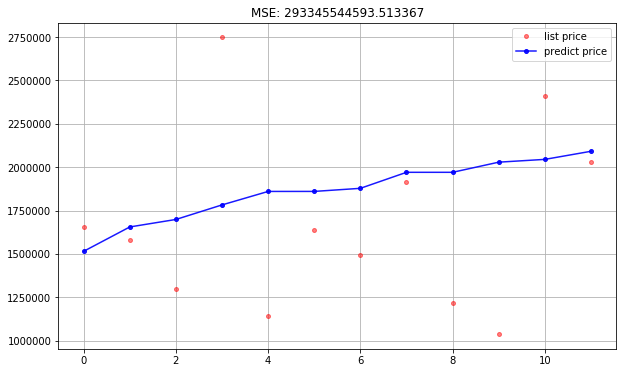

In [326]:
# RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=clf.best_params_["n_estimators"],
    criterion="mse",
    max_depth=clf.best_params_["max_depth"],
    min_samples_leaf=clf.best_params_["min_samples_leaf"],
    n_jobs=2,
    random_state=None,
)

performance_rf = try_different_method(rf)

scores.loc[0, "Random Forest"] = performance_rf[0]
scores.loc[1, "Random Forest"] = performance_rf[1]

In [327]:
features = joined_venues_price_S_M_h_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

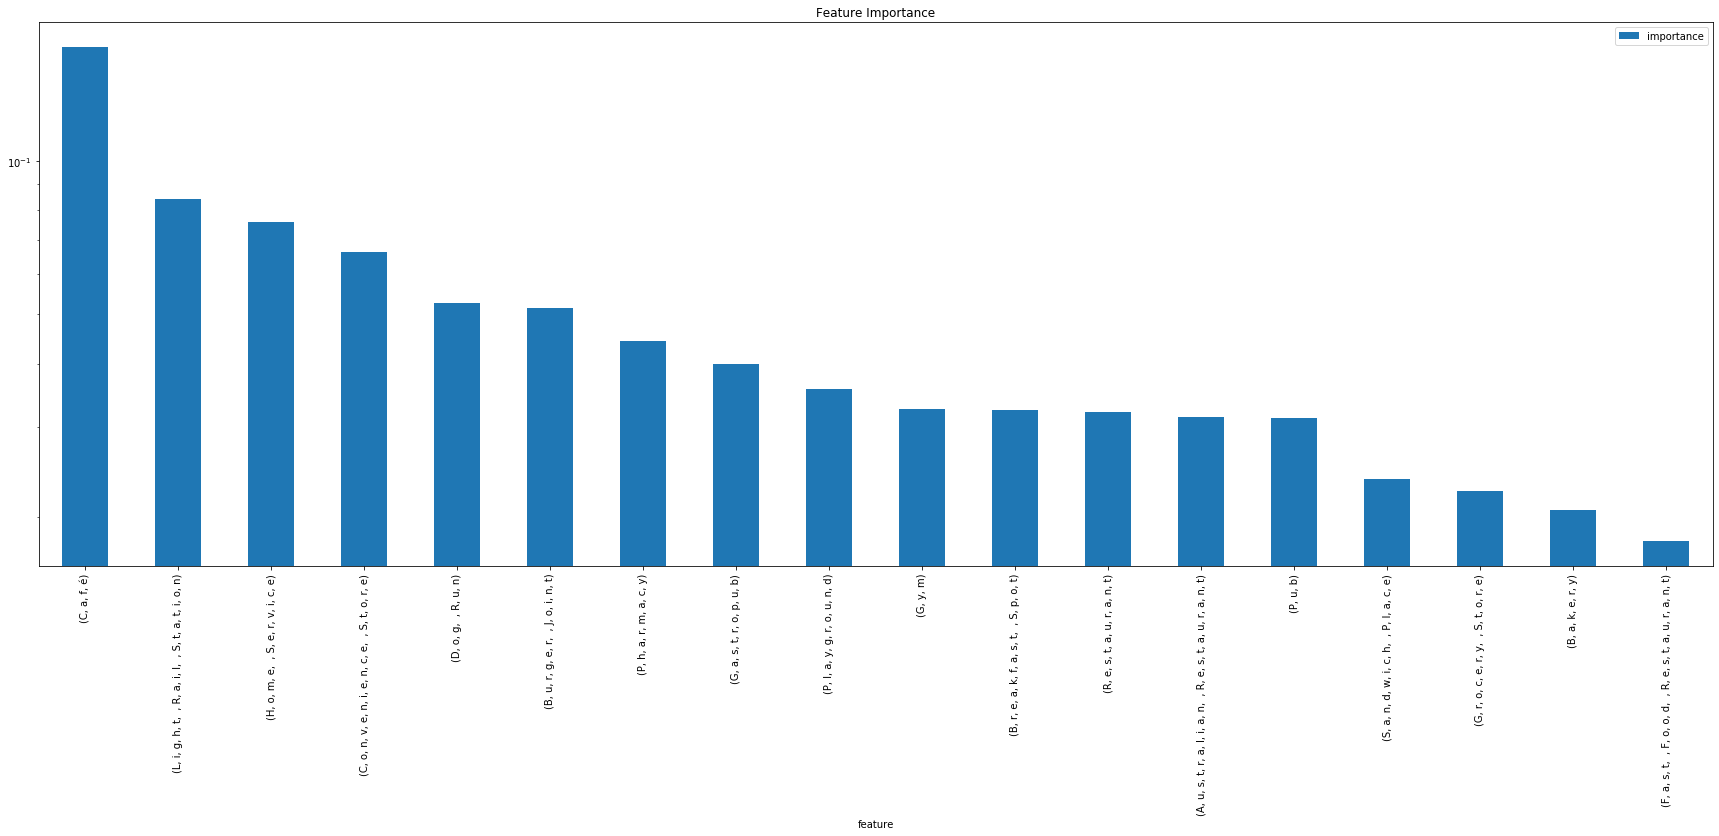

In [328]:
importance = pd.DataFrame({"feature": features, "importance": rf.feature_importances_})
importance.sort_values(by="importance", axis=0, ascending=False, inplace=True)
importance[:18].plot(
    x="feature",
    y="importance",
    kind="bar",
    figsize=(30, 10),
    title="Feature Importance",
    logy=True,
)

Above developed random forest regression feature importance shows venues with respect to their importance on average property prices of neighbourhoods, out of these the top three venues which plays a vital role in increasing the price of house in South Metropolitan are as follow;

Cafe
Light Rail Station
home service

In [225]:
# write the code to run the above function on each neighborhood and create a new dataframe called south_metropolitan_unit_venues.
south_metropolitan_unit_venues = getNearbyVenues(names=df_S_M_u_suburb['Suburb'],
                                   latitudes=df_S_M_u_suburb['Latitude'],
                                   longitudes=df_S_M_u_suburb['Longtitude']
                                  )

Albert Park
Armadale
Ashburton
Ashwood
Balaclava
Balwyn
Balwyn North
Bentleigh
Bentleigh East
Black Rock
Brighton
Brighton East
Burwood
Camberwell
Canterbury
Carnegie
Caulfield
Caulfield East
Caulfield North
Caulfield South
Chadstone
Cheltenham
Elsternwick
Elwood
Gardenvale
Glen Huntly
Glen Iris
Hampton
Hampton East
Hawthorn
Hawthorn East
Highett
Hughesdale
Kew
Kew East
Malvern
Malvern East
Middle Park
Moorabbin
Murrumbeena
Notting Hill
Oakleigh
Oakleigh East
Ormond
Port Melbourne
Prahran
Ripponlea
Sandringham
South Melbourne
South Yarra
Southbank
St Kilda
Surrey Hills
Toorak
Windsor


In [226]:
# size of dataframe
print(south_metropolitan_unit_venues.shape)
south_metropolitan_unit_venues.head()

(872, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albert Park,-37.845163,144.95286,Jock's,-37.844274,144.951104,Ice Cream Shop
1,Albert Park,-37.845163,144.95286,the guilty moose,-37.845938,144.949854,Breakfast Spot
2,Albert Park,-37.845163,144.95286,Kamel,-37.842094,144.952970,Middle Eastern Restaurant
3,Albert Park,-37.845163,144.95286,Misuzu's,-37.841760,144.953364,Japanese Restaurant
4,Albert Park,-37.845163,144.95286,Avenue Bookstore,-37.841299,144.954035,Bookstore


In [296]:
# how many venues were returned for each neighborhood
df_S_M_u_suburb_venues = south_metropolitan_unit_venues.groupby('Neighborhood').count()
df_S_M_u_suburb_venues


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albert Park,29,29,29,29,29,29
Armadale,13,13,13,13,13,13
Ashburton,10,10,10,10,10,10
Ashwood,5,5,5,5,5,5
Balaclava,34,34,34,34,34,34
Balwyn,19,19,19,19,19,19
Balwyn North,4,4,4,4,4,4
Bentleigh,5,5,5,5,5,5
Bentleigh East,5,5,5,5,5,5


In [228]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(south_metropolitan_unit_venues['Venue Category'].unique())))

There are 155 uniques categories.


In [229]:
# one hot encoding
south_metropolitan_u_onehot = pd.get_dummies(south_metropolitan_unit_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
south_metropolitan_u_onehot['Neighborhood'] = south_metropolitan_unit_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [south_metropolitan_u_onehot.columns[-1]] + list(south_metropolitan_u_onehot.columns[:-1])
south_metropolitan_u_onehot = south_metropolitan_u_onehot[fixed_columns]

south_metropolitan_u_onehot.head()

,Neighborhood,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,...,Thrift / Vintage Store,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
south_metropolitan_u_grouped = south_metropolitan_u_onehot.groupby('Neighborhood').mean().reset_index()
south_metropolitan_u_grouped

,Neighborhood,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,...,Thrift / Vintage Store,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Albert Park,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.034483,0.000000,0.000000,0.000000
1,Armadale,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.076923,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Ashburton,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.100000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Ashwood,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.200000,0.000000
4,Balaclava,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.029412,0.00000,0.029412,...,0.000000,0.00,0.029412,0.00,0.00,0.000000,0.029412,0.000000,0.000000,0.029412
5,Balwyn,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Balwyn North,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,Bentleigh,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.200000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,Bentleigh East,0.000000,0.000000,0.00,0.00,0.200000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Black Rock,0.000000,0.045455,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.045455,0.045455,0.000000


In [294]:
df_S_M_u_suburb.rename(columns = {'Suburb':'Neighborhood'}, inplace = True)
df_S_M_u_suburb.head()

,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Year
4,Albert Park,1.333333,742500.000000,3.200000,1.000000,0.333333,108.000000,1929.333333,-37.845163,144.952860,3280.0,2017.000000
11,Armadale,1.964286,750071.428571,6.300000,1.178571,1.107143,488.840000,1973.714286,-37.857602,145.019296,4836.0,2016.500000
13,Ashburton,2.000000,500000.000000,11.000000,1.000000,1.000000,710.000000,2010.000000,-37.863600,145.079400,3052.0,2017.000000
14,Ashwood,2.200000,740400.000000,12.200000,1.200000,1.400000,174.800000,1991.200000,-37.868360,145.101260,2894.0,2016.600000
21,Balaclava,1.909091,487909.090909,6.563636,1.000000,0.909091,299.069091,1964.000000,-37.870554,144.995911,2952.0,2016.363636


In [297]:
inner_join_S_M_u_df= pd.merge(df_S_M_u_suburb, df_S_M_u_suburb_venues, on='Neighborhood', how='inner')
inner_join_S_M_u_df.shape

(55, 18)

The coefficient is:  [[-123.50416577]]
The intercept is:  [660599.91713659]
The R-square is 0.00
Mean Square Error is 12740449529.62
Mean absolute Error is 94102.40
Root Mean Squared Error is 112873.60


(0, 2169087.5166942603)

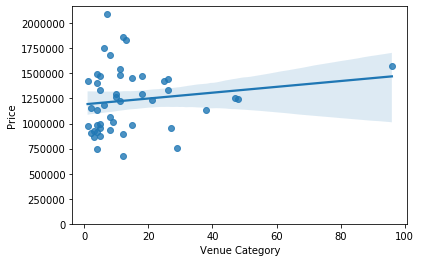

In [298]:
# linear regression between price & Year
a = inner_join_S_M_u_df[['Venue Category']]
b = inner_join_S_M_u_df[['Price']]
lm.fit(a,b) # fit the model using Year
bhat = lm.predict(a)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(a, b))
print("Mean Square Error is %.2f" % mean_squared_error(bhat, b))
print("Mean absolute Error is %.2f" % mean_absolute_error(bhat, b))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(bhat, b)))
sns.regplot(x="Venue Category", y="Price", data=inner_join_df)
plt.ylim(0,)

In [301]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
south_metropolitan_u_df = south_metropolitan_u_onehot.groupby('Neighborhood').sum().reset_index()
print(south_metropolitan_u_df.shape)
south_metropolitan_u_df.head()
south_metropolitan_u_df.reset_index(drop=True, inplace=True)

(55, 156)


In [302]:
joined_venues_price_S_M_u_df= pd.merge(df_S_M_u_suburb, south_metropolitan_u_df, on='Neighborhood', how='inner')
joined_venues_price_S_M_u_df.head()

,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,...,Thrift / Vintage Store,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Albert Park,1.333333,742500.000000,3.200000,1.000000,0.333333,108.000000,1929.333333,-37.845163,144.952860,...,0,0,0,0,0,0,1,0,0,0
1,Armadale,1.964286,750071.428571,6.300000,1.178571,1.107143,488.840000,1973.714286,-37.857602,145.019296,...,0,0,1,0,0,0,0,0,0,0
2,Ashburton,2.000000,500000.000000,11.000000,1.000000,1.000000,710.000000,2010.000000,-37.863600,145.079400,...,0,0,1,0,0,0,0,0,0,0
3,Ashwood,2.200000,740400.000000,12.200000,1.200000,1.400000,174.800000,1991.200000,-37.868360,145.101260,...,0,0,0,0,0,0,0,0,1,0
4,Balaclava,1.909091,487909.090909,6.563636,1.000000,0.909091,299.069091,1964.000000,-37.870554,144.995911,...,0,0,1,0,0,0,1,0,0,1


In [303]:
x_data = joined_venues_price_S_M_u_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])
y_data = np.array(joined_venues_price_S_M_u_df['Price']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
lre=LinearRegression()
lre.fit(x_train, y_train)
Yhat=lre.predict(x_data)
YPred=lre.predict(x_test)
print('R2-score:', r2_score(y_test, YPred)) # r2 score
print('Mean Squared Error:', mean_squared_error(y_test, YPred)) # mse
print('Mean absolute Error is', mean_absolute_error(y_test, YPred))
print('Root Mean Squared Error is', sqrt(mean_squared_error(y_test, YPred)))

R2-score: -3.5228832819927565
Mean Squared Error: 32358065534.02727
Mean absolute Error is 152409.52269316686
Root Mean Squared Error is 179883.47765714134


In [304]:
# Random Forest Regression
scaler=StandardScaler()
y_data = joined_venues_price_S_M_u_df['Price']
x_data = joined_venues_price_S_M_u_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
x_train_scaled = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test1 = pd.DataFrame(x_test_scaled)

In [305]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# parameters to search over with cross-validation

grid_params = [
    {
        "n_estimators": [10, 50, 100],
        "max_depth": [3, 6, 8, 10, None],
        "min_samples_leaf": [1, 2, 5],
    }
]

clf = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, scoring="r2", n_jobs=2)
clf.fit(x_train1, y_train)
print("Best parameter values: %r\n" % clf.best_params_)

Best parameter values: {'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 10}



In [306]:
def try_different_method(method):
    method.fit(x_train1, y_train)
    y_pred = method.predict(x_test1)

    y_test_temp = y_test.reset_index(drop=True)
    order = y_pred.argsort(axis=0)
    y_pred = y_pred[order]
    y_test_temp = y_test_temp[order]

    #     maer = np.mean(abs(y_pred - y_test_temp) / y_test_temp)
    mse = metrics.mean_squared_error(y_test_temp, y_pred)
    r2 = metrics.r2_score(y_test_temp, y_pred)

    plt.figure(figsize=(10, 6))
    plt.plot(
        np.arange(len(y_pred)),
        y_test_temp,
        "ro",
        markersize=4,
        label="list price",
        alpha=0.5,
    )
    plt.plot(
        np.arange(len(y_pred)),
        y_pred,
        "bo-",
        markersize=4,
        label="predict price",
        alpha=0.9,
    )

    plt.grid()
    plt.title("MSE: %f" % mse)
    print("mean_squared_error: %f" % mse)
    print("r2: %f" % r2)
    #     print('mean_abs_error_rate: %f' % maer)
    plt.legend()
    return (r2, mse)

In [307]:
scores = pd.DataFrame()

mean_squared_error: 12549670401.600746
r2: -0.754144


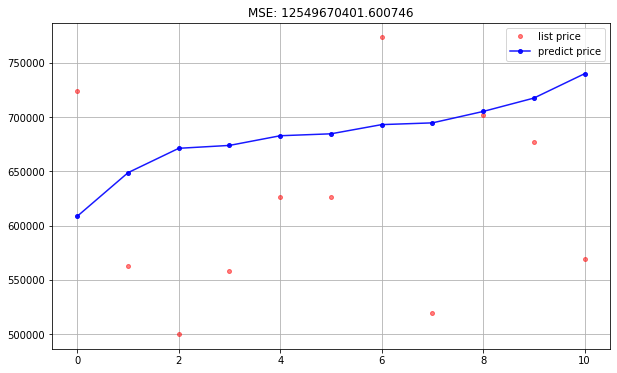

In [308]:
# RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=clf.best_params_["n_estimators"],
    criterion="mse",
    max_depth=clf.best_params_["max_depth"],
    min_samples_leaf=clf.best_params_["min_samples_leaf"],
    n_jobs=2,
    random_state=None,
)

performance_rf = try_different_method(rf)

scores.loc[0, "Random Forest"] = performance_rf[0]
scores.loc[1, "Random Forest"] = performance_rf[1]

In [309]:
features = joined_venues_price_S_M_u_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

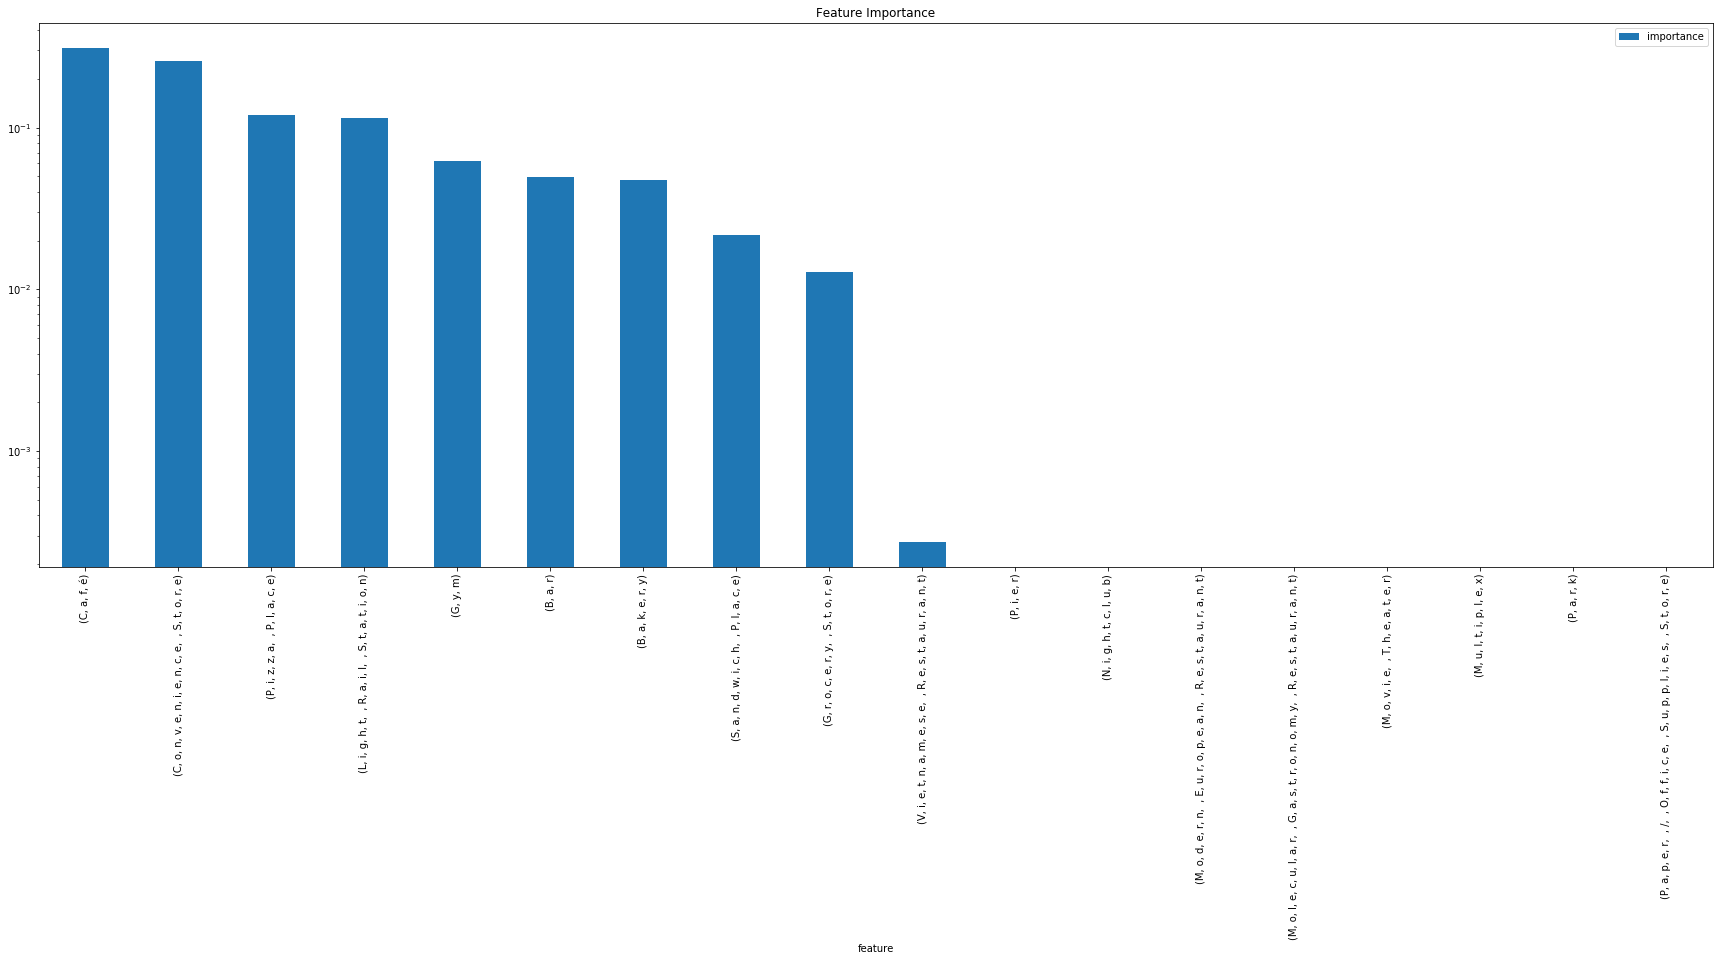

In [310]:
importance = pd.DataFrame({"feature": features, "importance": rf.feature_importances_})
importance.sort_values(by="importance", axis=0, ascending=False, inplace=True)
importance[:18].plot(
    x="feature",
    y="importance",
    kind="bar",
    figsize=(30, 10),
    title="Feature Importance",
    logy=True,
)

Above developed random forest regression feature importance shows venues with respect to their importance on average property prices of neighbourhoods, out of these the top three venues which plays a vital role in increasing the price of unit in South Metropolitan are as follow;

Cafe  
Convenience Store  
Pizza Place

In [269]:
# creating dataframe group by suburb for type = townhouse in South Metropolitan Region
df_S_M_t_suburb = df_S_M_t.groupby(('Suburb'),as_index=False).mean()
df_S_M_t_suburb.dropna(subset=["Price"], axis=0, inplace=True) # drop the rows where price is missing
df_S_M_t_suburb.rename(columns = {'Suburb':'Neighborhood'}, inplace = True)
df_S_M_t_suburb.head()

,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Year
4,Albert Park,2.000000,1.440000e+06,3.000000,1.000000,1.000000,523.760000,1980.000000,-37.842500,144.956240,3280.0,2017.0
11,Armadale,3.000000,1.484750e+06,6.300000,2.000000,1.750000,523.250000,1978.750000,-37.855748,145.018410,4836.0,2016.5
13,Ashburton,3.500000,1.491875e+06,10.600000,2.375000,2.125000,339.720000,2004.750000,-37.867890,145.080247,3052.0,2016.5
14,Ashwood,2.833333,9.175833e+05,11.533333,1.666667,1.833333,310.626667,1992.333333,-37.867308,145.106557,2894.0,2016.5
21,Balaclava,2.500000,1.132500e+06,6.500000,2.000000,2.000000,318.880000,2004.500000,-37.869930,144.996010,2952.0,2016.5


In [232]:
# write the code to run the above function on each neighborhood and create a new dataframe called south_metropolitan_townhouse_venues.
south_metropolitan_townhouse_venues = getNearbyVenues(names=df_S_M_t_suburb['Suburb'],
                                   latitudes=df_S_M_t_suburb['Latitude'],
                                   longitudes=df_S_M_t_suburb['Longtitude']
                                  )

Albert Park
Armadale
Ashburton
Ashwood
Balaclava
Balwyn
Balwyn North
Beaumaris
Bentleigh
Bentleigh East
Brighton
Brighton East
Burwood
Camberwell
Carnegie
Caulfield East
Caulfield South
Chadstone
Cheltenham
Deepdene
Elsternwick
Elwood
Glen Huntly
Glen Iris
Hampton
Hampton East
Hawthorn
Hawthorn East
Highett
Hughesdale
Kew
Kew East
Malvern
Malvern East
McKinnon
Moorabbin
Murrumbeena
Notting Hill
Oakleigh East
Ormond
Port Melbourne
Prahran
Ripponlea
Sandringham
South Melbourne
South Yarra
St Kilda
Surrey Hills
Toorak


In [233]:
# size of dataframe
print(south_metropolitan_townhouse_venues.shape)
south_metropolitan_townhouse_venues.head()

(664, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albert Park,-37.8425,144.95624,Andrew's Hamburgers,-37.840860,144.955358,Burger Joint
1,Albert Park,-37.8425,144.95624,Ricardo's Trattoria,-37.841270,144.955200,Italian Restaurant
2,Albert Park,-37.8425,144.95624,Urban ProJuice,-37.840251,144.955628,Vegetarian / Vegan Restaurant
3,Albert Park,-37.8425,144.95624,Avenue Bookstore,-37.841299,144.954035,Bookstore
4,Albert Park,-37.8425,144.95624,Dundas & Faussett,-37.841125,144.954594,Café


In [257]:
# how many venues were returned for each neighborhood
df_S_M_t_suburb_venues = south_metropolitan_townhouse_venues.groupby('Neighborhood').count()
df_S_M_t_suburb_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albert Park,26,26,26,26,26,26
Armadale,11,11,11,11,11,11
Ashburton,4,4,4,4,4,4
Ashwood,4,4,4,4,4,4
Balaclava,38,38,38,38,38,38
Balwyn,10,10,10,10,10,10
Balwyn North,1,1,1,1,1,1
Beaumaris,13,13,13,13,13,13
Bentleigh,2,2,2,2,2,2


In [255]:
inner_join_df= pd.merge(df_S_M_t_suburb, df_S_M_t_suburb_venues, on='Neighborhood', how='inner')
inner_join_df.shape

(47, 18)

The coefficient is:  [[2905.53625804]]
The intercept is:  [1191811.83929904]
The R-square is 0.02
Mean Square Error is 97643334377.77
Mean absolute Error is 253175.18
Root Mean Squared Error is 312479.33


(0, 2169087.5166942603)

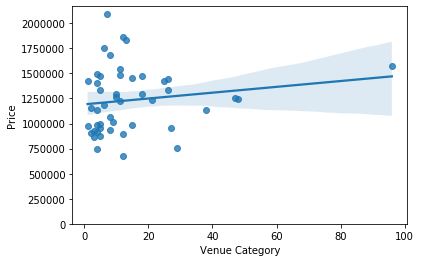

In [293]:
# linear regression between price & Year
a = inner_join_df[['Venue Category']]
b = inner_join_df[['Price']]
lm.fit(a,b) # fit the model using Year
bhat = lm.predict(a)
print('The coefficient is: ', lm.coef_)
print('The intercept is: ', lm.intercept_)
print("The R-square is %.2f" % lm.score(a, b))
print("Mean Square Error is %.2f" % mean_squared_error(bhat, b))
print("Mean absolute Error is %.2f" % mean_absolute_error(bhat, b))
print("Root Mean Squared Error is %.2f" % sqrt(mean_squared_error(bhat, b)))
sns.regplot(x="Venue Category", y="Price", data=inner_join_df)
plt.ylim(0,)

In [242]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(south_metropolitan_townhouse_venues['Venue Category'].unique())))

There are 132 uniques categories.


In [236]:
# one hot encoding
south_metropolitan_t_onehot = pd.get_dummies(south_metropolitan_townhouse_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
south_metropolitan_t_onehot['Neighborhood'] = south_metropolitan_townhouse_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [south_metropolitan_t_onehot.columns[-1]] + list(south_metropolitan_t_onehot.columns[:-1])
south_metropolitan_t_onehot = south_metropolitan_t_onehot[fixed_columns]

south_metropolitan_t_onehot.head()

,Neighborhood,Afghan Restaurant,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Bagel Shop,Bakery,Bar,Basketball Court,Beer Bar,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albert Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
south_metropolitan_t_grouped = south_metropolitan_t_onehot.groupby('Neighborhood').mean().reset_index()
south_metropolitan_t_grouped

,Neighborhood,Afghan Restaurant,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Bagel Shop,Bakery,Bar,Basketball Court,Beer Bar,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Albert Park,0.00,0.00,0.038462,0.000000,0.000000,0.038462,0.000000,0.038462,0.000000,...,0.000000,0.000000,0.000000,0.038462,0.0,0.000000,0.038462,0.000000,0.000000,0.000000
1,Armadale,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,Ashburton,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,Ashwood,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,Balaclava,0.00,0.00,0.000000,0.026316,0.026316,0.026316,0.052632,0.000000,0.000000,...,0.000000,0.026316,0.000000,0.026316,0.0,0.026316,0.000000,0.000000,0.000000,0.000000
5,Balwyn,0.00,0.00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,Balwyn North,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,Beaumaris,0.00,0.00,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,Bentleigh,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,Brighton,0.00,0.00,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,0.083333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [272]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
south_metropolitan_t_df = south_metropolitan_t_onehot.groupby('Neighborhood').sum().reset_index()
print(south_metropolitan_t_df.shape)
south_metropolitan_t_df.head()

(47, 133)


,Neighborhood,Afghan Restaurant,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Bagel Shop,Bakery,Bar,Basketball Court,Beer Bar,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Albert Park,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,Armadale,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Ashburton,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ashwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Balaclava,0,0,0,1,1,1,2,0,0,...,0,1,0,1,0,1,0,0,0,0


In [275]:
south_metropolitan_t_df.reset_index(drop=True, inplace=True)
south_metropolitan_t_df['Neighborhood']

0         Albert Park
1            Armadale
2           Ashburton
3             Ashwood
4           Balaclava
5              Balwyn
6        Balwyn North
7           Beaumaris
8           Bentleigh
9            Brighton
10      Brighton East
11            Burwood
12         Camberwell
13           Carnegie
14     Caulfield East
15    Caulfield South
16          Chadstone
17         Cheltenham
18           Deepdene
19        Elsternwick
20             Elwood
21        Glen Huntly
22          Glen Iris
23            Hampton
24       Hampton East
25           Hawthorn
26      Hawthorn East
27            Highett
28         Hughesdale
29                Kew
30           Kew East
31            Malvern
32       Malvern East
33          Moorabbin
34        Murrumbeena
35       Notting Hill
36      Oakleigh East
37             Ormond
38     Port Melbourne
39            Prahran
40          Ripponlea
41        Sandringham
42    South Melbourne
43        South Yarra
44           St Kilda
45       S

In [279]:
joined_venues_price_S_M_t_df= pd.merge(df_S_M_t_suburb, south_metropolitan_t_df, on='Neighborhood', how='inner')
joined_venues_price_S_M_t_df.head()


,Neighborhood,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Albert Park,2.000000,1.440000e+06,3.000000,1.000000,1.000000,523.760000,1980.000000,-37.842500,144.956240,...,0,0,0,1,0,0,1,0,0,0
1,Armadale,3.000000,1.484750e+06,6.300000,2.000000,1.750000,523.250000,1978.750000,-37.855748,145.018410,...,0,1,0,0,0,0,0,0,0,0
2,Ashburton,3.500000,1.491875e+06,10.600000,2.375000,2.125000,339.720000,2004.750000,-37.867890,145.080247,...,0,0,0,0,0,0,0,0,0,0
3,Ashwood,2.833333,9.175833e+05,11.533333,1.666667,1.833333,310.626667,1992.333333,-37.867308,145.106557,...,0,0,0,0,0,0,0,0,0,0
4,Balaclava,2.500000,1.132500e+06,6.500000,2.000000,2.000000,318.880000,2004.500000,-37.869930,144.996010,...,0,1,0,1,0,1,0,0,0,0


In [282]:
x_data = joined_venues_price_S_M_t_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])
y_data = np.array(joined_venues_price_S_M_t_df['Price']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
lre=LinearRegression()
lre.fit(x_train, y_train)
Yhat=lre.predict(x_data)
YPred=lre.predict(x_test)
print('R2-score:', r2_score(y_test, YPred)) # r2 score
print('Mean Squared Error:', mean_squared_error(y_test, YPred)) # mse
print('Mean absolute Error is', mean_absolute_error(y_test, YPred))
print('Root Mean Squared Error is', sqrt(mean_squared_error(y_test, YPred)))

R2-score: -0.6777636420058724
Mean Squared Error: 89639859164.6582
Mean absolute Error is 268763.1015855722
Root Mean Squared Error is 299399.16360046534


# Random Forest Regression

In [283]:
scaler=StandardScaler()
y_data = joined_venues_price_S_M_t_df['Price']
x_data = joined_venues_price_S_M_t_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
x_train_scaled = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test1 = pd.DataFrame(x_test_scaled)

In [286]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# parameters to search over with cross-validation

grid_params = [
    {
        "n_estimators": [10, 50, 100],
        "max_depth": [3, 6, 8, 10, None],
        "min_samples_leaf": [1, 2, 5],
    }
]

clf = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, scoring="r2", n_jobs=2)
clf.fit(x_train1, y_train)
print("Best parameter values: %r\n" % clf.best_params_)

Best parameter values: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 10}



In [287]:
def try_different_method(method):
    method.fit(x_train1, y_train)
    y_pred = method.predict(x_test1)

    y_test_temp = y_test.reset_index(drop=True)
    order = y_pred.argsort(axis=0)
    y_pred = y_pred[order]
    y_test_temp = y_test_temp[order]

    #     maer = np.mean(abs(y_pred - y_test_temp) / y_test_temp)
    mse = metrics.mean_squared_error(y_test_temp, y_pred)
    r2 = metrics.r2_score(y_test_temp, y_pred)

    plt.figure(figsize=(10, 6))
    plt.plot(
        np.arange(len(y_pred)),
        y_test_temp,
        "ro",
        markersize=4,
        label="list price",
        alpha=0.5,
    )
    plt.plot(
        np.arange(len(y_pred)),
        y_pred,
        "bo-",
        markersize=4,
        label="predict price",
        alpha=0.9,
    )

    plt.grid()
    plt.title("MSE: %f" % mse)
    print("mean_squared_error: %f" % mse)
    print("r2: %f" % r2)
    #     print('mean_abs_error_rate: %f' % maer)
    plt.legend()
    return (r2, mse)

In [288]:
scores = pd.DataFrame()

mean_squared_error: 58263872499.481140
r2: -0.090508


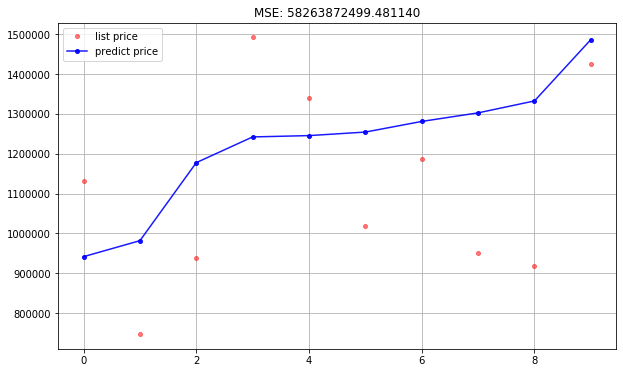

In [289]:
# RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=clf.best_params_["n_estimators"],
    criterion="mse",
    max_depth=clf.best_params_["max_depth"],
    min_samples_leaf=clf.best_params_["min_samples_leaf"],
    n_jobs=2,
    random_state=None,
)

performance_rf = try_different_method(rf)

scores.loc[0, "Random Forest"] = performance_rf[0]
scores.loc[1, "Random Forest"] = performance_rf[1]

In [290]:
features = joined_venues_price_S_M_t_df.drop(columns=['Neighborhood','Price','Rooms','Distance','Bathroom','Car','Landsize','YearBuilt','Latitude','Longtitude','Propertycount','Year'])

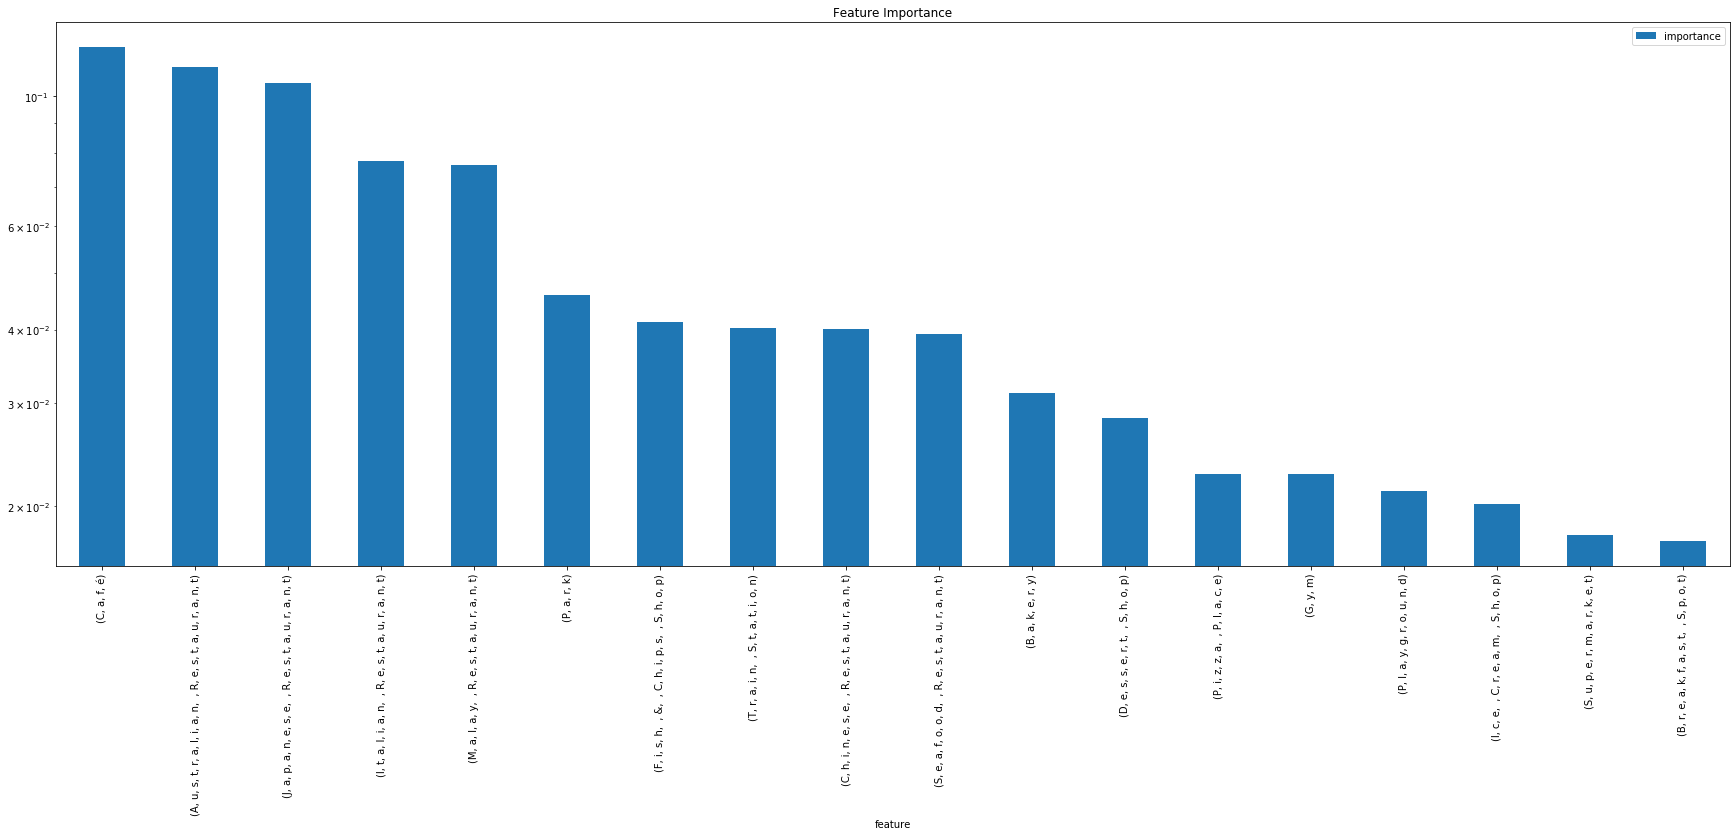

In [291]:
importance = pd.DataFrame({"feature": features, "importance": rf.feature_importances_})
importance.sort_values(by="importance", axis=0, ascending=False, inplace=True)
importance[:18].plot(
    x="feature",
    y="importance",
    kind="bar",
    figsize=(30, 10),
    title="Feature Importance",
    logy=True,
)

Above developed random forest regression feature importance shows venues with respect to their importance on average property prices of neighbourhoods, out of these the top three venues which plays a vital role in increasing the price of town in South Metropolitan are as follow;

Cafe  
Australian Restaurant  
Japanese Restaurant